___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***. 

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com)in 2019, contains many features of 9 different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project). You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression 
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression 
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns',135)

In [2]:
df = pd.read_csv('autoscout_not_dummy.csv')

In [3]:
df2 = df.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14815 entries, 0 to 14814
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    14815 non-null  float64
 1   body_type              14815 non-null  object 
 2   price                  14815 non-null  int64  
 3   km                     14815 non-null  float64
 4   hp_kw                  14815 non-null  float64
 5   fuel                   14815 non-null  object 
 6   type                   14815 non-null  object 
 7   previous_owners        14815 non-null  float64
 8   gearing_type           14815 non-null  object 
 9   displacement_in_cc     14815 non-null  float64
 10  cylinders              14815 non-null  float64
 11  weight                 14815 non-null  float64
 12  emission_class         14815 non-null  object 
 13  body_color             14815 non-null  object 
 14  paint_type             14815 non-null  object 
 15  nr

In [5]:
df.head()

age body_type  price        km   hp_kw     fuel  type  previous_owners  \
0 4.000    Sedans  15770 56013.000  66.000   Diesel  Used            2.000   
1 3.000    Sedans  14500 80000.000 141.000  Benzine  Used            1.000   
2 4.000    Sedans  14640 83450.000  85.000   Diesel  Used            1.000   
3 4.000    Sedans  14500 73000.000  66.000   Diesel  Used            1.000   
4 4.000    Sedans  16790 16200.000  66.000   Diesel  Used            1.000   

  gearing_type  displacement_in_cc  cylinders   weight emission_class  \
0    Automatic            1422.000      3.000 1220.000         Euro 6   
1    Automatic            1798.000      4.000 1255.000         Euro 6   
2    Automatic            1598.000      3.000 1135.000         Euro 6   
3    Automatic            1422.000      3.000 1195.000         Euro 6   
4    Automatic            1422.000      3.000 1135.000         Euro 6   

  body_color paint_type  nr_of_doors  nr_of_seats drive_chain  \
0    popular   Metallic        5.000        5.000       front   
1  unpopular   Metallic        3.000        4.000       front   
2    popular   Metallic        4.000        4.000       front   
3  unpopular   Metallic        3.000        4.000       front   
4    popular   Metallic        5.000        5.000       front   

                               comfort_&_convenience  \
0  Air conditioning,Armrest,Automatic climate con...   
1  Air conditioning,Automatic climate control,Hil...   
2  Air conditioning,Cruise control,Electrical sid...   
3  Air suspension,Armrest,Auxiliary heating,Elect...   
4  Air conditioning,Armrest,Automatic climate con...   

                               entertainment_&_media  \
0  Bluetooth,Hands-free equipment,On-board comput...   
1  Bluetooth,Hands-free equipment,On-board comput...   
2                              MP3,On-board computer   
3  Bluetooth,CD player,Hands-free equipment,MP3,O...   
4  Bluetooth,CD player,Hands-free equipment,MP3,O...   

                                              extras  \
0     Alloy wheels,Catalytic Converter,Voice Control   
1  Alloy wheels,Sport seats,Sport suspension,Voic...   
2                         Alloy wheels,Voice Control   
3             Alloy wheels,Sport seats,Voice Control   
4  Alloy wheels,Sport package,Sport suspension,Vo...   

                                   safety_&_security  gears seat_cover  \
0  ABS,Central door lock,Daytime running lights,D...  7.000      Cloth   
1  ABS,Central door lock,Central door lock with r...  7.000      Cloth   
2  ABS,Central door lock,Daytime running lights,D...  7.000      Cloth   
3  ABS,Alarm system,Central door lock with remote...  6.000      Cloth   
4  ABS,Central door lock,Driver-side airbag,Elect...  7.000      Cloth   

                vat  consumption_avg make_model  
0    VAT deductible            3.867    Audi_A1  
1  Price negotiable            5.767    Audi_A1  
2    VAT deductible            3.867    Audi_A1  
3    VAT deductible            3.867    Audi_A1  
4    VAT deductible            4.133    Audi_A1

In [6]:
total_outliers = []

for model in df.make_model.unique():
    
    car_prices = df[df["make_model"]== model]["price"]
    
    Q1 = car_prices.quantile(0.25)
    Q3 = car_prices.quantile(0.75)
    IQR = Q3-Q1
    lower_lim = Q1-1.5*IQR
    upper_lim = Q3+1.5*IQR
    
    count_of_outliers = (car_prices[(car_prices < lower_lim) | (car_prices > upper_lim)]).count()
    
    total_outliers.append(count_of_outliers)
    
    print(f" The count of outlier for {model:<15} : {count_of_outliers:<5}, \
          The rate of outliers : {(count_of_outliers/len(df[df['make_model']== model])).round(3)}")
print()    
print("Total_outliers : ",sum(total_outliers), "The rate of total outliers :", (sum(total_outliers)/len(df)).round(3))

 The count of outlier for Audi_A1         : 5    ,           The rate of outliers : 0.002
 The count of outlier for Audi_A3         : 54   ,           The rate of outliers : 0.018
 The count of outlier for Opel_Astra      : 131  ,           The rate of outliers : 0.056
 The count of outlier for Opel_Corsa      : 0    ,           The rate of outliers : 0.0
 The count of outlier for Opel_Insignia   : 117  ,           The rate of outliers : 0.048
 The count of outlier for Renault_Clio    : 74   ,           The rate of outliers : 0.046
 The count of outlier for Renault_Duster  : 0    ,           The rate of outliers : 0.0
 The count of outlier for Renault_Espace  : 21   ,           The rate of outliers : 0.023

Total_outliers :  402 The rate of total outliers : 0.027


In [7]:
df = df.join(df["comfort_&_convenience"].str.get_dummies(sep = ",").add_prefix("cc_"))
df = df.join(df["entertainment_&_media"].str.get_dummies(sep = ",").add_prefix("em_"))
df = df.join(df["extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
df = df.join(df["safety_&_security"].str.get_dummies(sep = ",").add_prefix("ss_"))

In [8]:
df.drop(["comfort_&_convenience","entertainment_&_media","extras","safety_&_security"], axis=1, inplace=True)

In [9]:
df = pd.get_dummies(df, drop_first =False)

In [10]:
df.head()

age  price        km   hp_kw  previous_owners  displacement_in_cc  \
0 4.000  15770 56013.000  66.000            2.000            1422.000   
1 3.000  14500 80000.000 141.000            1.000            1798.000   
2 4.000  14640 83450.000  85.000            1.000            1598.000   
3 4.000  14500 73000.000  66.000            1.000            1422.000   
4 4.000  16790 16200.000  66.000            1.000            1422.000   

   cylinders   weight  nr_of_doors  nr_of_seats  gears  consumption_avg  \
0      3.000 1220.000        5.000        5.000  7.000            3.867   
1      4.000 1255.000        3.000        4.000  7.000            5.767   
2      3.000 1135.000        4.000        4.000  7.000            3.867   
3      3.000 1195.000        3.000        4.000  6.000            3.867   
4      3.000 1135.000        5.000        5.000  7.000            4.133   

   cc_Air conditioning  cc_Air suspension  cc_Armrest  \
0                    1                  0           1   
1                    1                  0           0   
2                    1                  0           0   
3                    0                  1           1   
4                    1                  0           1   

   cc_Automatic climate control  cc_Auxiliary heating  cc_Cruise control  \
0                             1                     0                  1   
1                             1                     0                  0   
2                             0                     0                  1   
3                             0                     1                  0   
4                             1                     0                  0   

   cc_Electric Starter  cc_Electric tailgate  cc_Electrical side mirrors  \
0                    0                     0                           1   
1                    0                     0                           0   
2                    0                     0                           1   
3                    0                     0                           1   
4                    0                     0                           1   

   cc_Electrically adjustable seats  cc_Electrically heated windshield  \
0                                 0                                  0   
1                                 0                                  0   
2                                 0                                  0   
3                                 0                                  0   
4                                 0                                  0   

   cc_Heads-up display  cc_Heated steering wheel  cc_Hill Holder  \
0                    0                         0               1   
1                    0                         0               1   
2                    0                         0               1   
3                    1                         0               1   
4                    0                         0               1   

   cc_Keyless central door lock  cc_Leather seats  cc_Leather steering wheel  \
0                             0                 0                          1   
1                             0                 0                          1   
2                             0                 0                          1   
3                             0                 0                          1   
4                             0                 0                          1   

   cc_Light sensor  cc_Lumbar support  cc_Massage seats  \
0                1                  0                 0   
1                0                  1                 0   
2                0                  0                 0   
3                1                  1                 0   
4                1                  0                 0   

   cc_Multi-function steering wheel  cc_Navigation system  cc_Panorama roof  \
0                                 1                     1                 0   
1        

In [11]:
df.isnull().sum().sum()

0

In [12]:
df.describe()

age     price         km     hp_kw  previous_owners  \
count 14815.000 14815.000  14815.000 14815.000        14815.000   
mean      2.385 18112.911  32022.129    88.423            0.986   
std       1.116  7422.750  36843.507    26.511            0.332   
min       1.000  4950.000      0.000    40.000            0.000   
25%       1.000 12900.000   2637.000    66.000            1.000   
50%       2.000 16950.000  20416.000    85.000            1.000   
75%       3.000 21900.000  45921.000   101.000            1.000   
max       4.000 74600.000 317000.000   294.000            4.000   

       displacement_in_cc  cylinders    weight  nr_of_doors  nr_of_seats  \
count           14815.000  14815.000 14815.000    14815.000    14815.000   
mean             1423.793      3.802  1333.529        4.663        4.950   
std               289.652      0.408   186.087        0.639        0.465   
min                54.000      1.000   840.000        1.000        2.000   
25%              1229.000      4.000  1163.000        4.000        5.000   
50%              1461.000      4.000  1308.000        5.000        5.000   
75%              1598.000      4.000  1441.000        5.000        5.000   
max              2967.000      8.000  1800.000        7.000        7.000   

          gears  consumption_avg  cc_Air conditioning  cc_Air suspension  \
count 14815.000        14815.000            14815.000          14815.000   
mean      5.939            4.920                0.908              0.004   
std       0.718            0.931                0.289              0.065   
min       5.000            3.000                0.000              0.000   
25%       5.000            4.100                1.000              0.000   
50%       6.000            4.833                1.000              0.000   
75%       6.000            5.567                1.000              0.000   
max       8.000            9.067                1.000              1.000   

       cc_Armrest  cc_Automatic climate control  cc_Auxiliary heating  \
count   14815.000                     14815.000             14815.000   
mean        0.462                         0.560                 0.016   
std         0.499                         0.496                 0.125   
min         0.000                         0.000                 0.000   
25%         0.000                         0.000                 0.000   
50%         0.000                         1.000                 0.000   
75%         1.000                         1.000                 0.000   
max         1.000                         1.000                 1.000   

       cc_Cruise control  cc_Electric Starter  cc_Electric tailgate  \
count          14815.000            14815.000             14815.000   
mean               0.691                0.000                 0.066   
std                0.462                0.008                 0.248   
min                0.000                0.000                 0.000   
25%                0.000                0.000                 0.000   
50%                1.000                0.000                 0.000   
75%                1.000                0.000                 0.000   
max                1.000                1.000                 1.000   

       cc_Electrical side mirrors  cc_Electrically adjustable seats  \
count                   14815.000                         14815.000   
mean                        0.760                             0.121   
std                         0.427                             0.326   
min                         0.000                             0.000   
25%                         1.000                             0.000   
50%                         1.000                             0.000   
75%                         1.000                             0.000   
max                         1.000                             1.000   

       cc_Electrically heated windshield  cc_Heads-up display  \
count                          1481

In [13]:
corr_by_price = df.corr()["price"].sort_values()[:-1]
corr_by_price

age                         -0.470
seat_cover_Cloth            -0.426
gearing_type_Manual         -0.426
km                          -0.394
make_model_Opel_Corsa       -0.383
                             ...  
make_model_Renault_Espace    0.424
ss_LED Headlights            0.435
weight                       0.471
gears                        0.554
hp_kw                        0.701
Name: price, Length: 146, dtype: float64

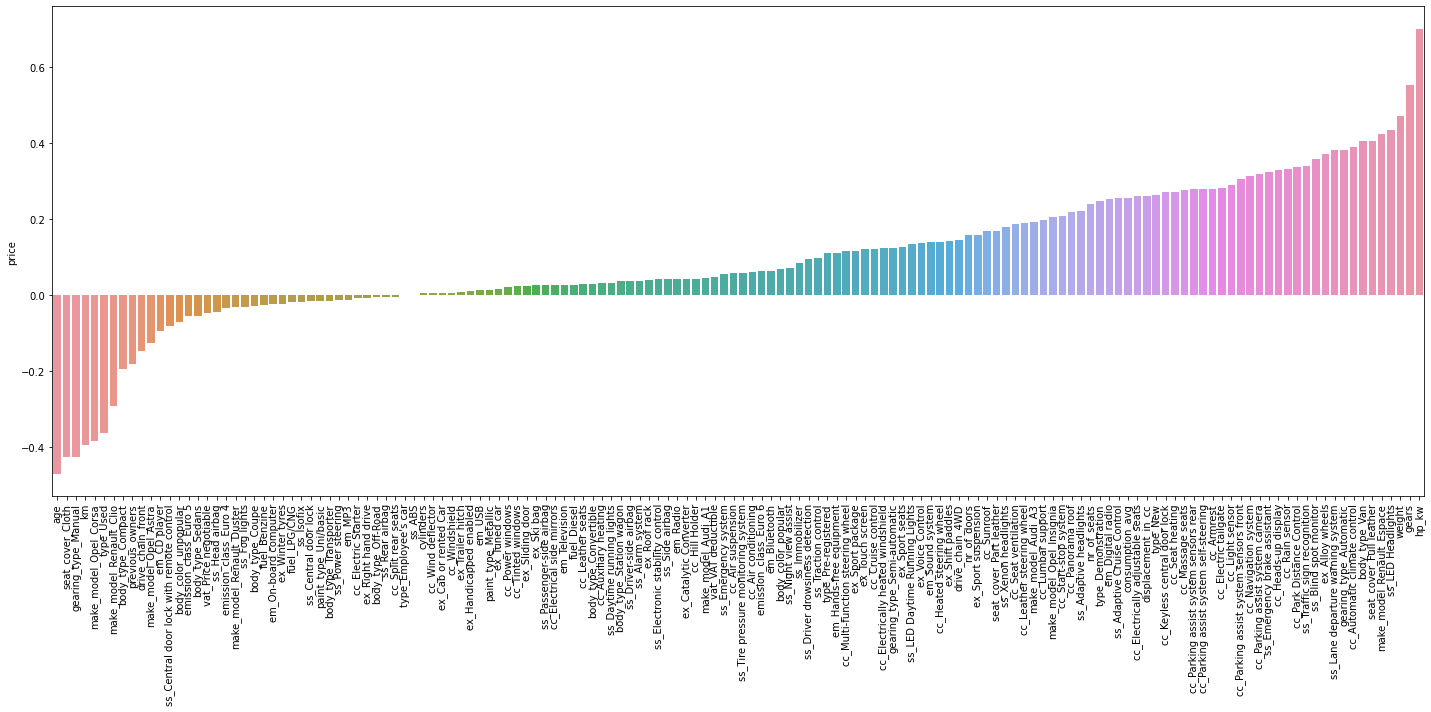

In [14]:
plt.figure(figsize = (20,10))
sns.barplot(x = corr_by_price.index, y = corr_by_price)
plt.xticks(rotation=90)
plt.tight_layout();

In [15]:
def check_dist(df, var):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    sns.histplot(x=var, data=df)
    plt.subplot(1, 2, 2)
    stats.probplot(df[var], dist="norm", plot=plt)
    plt.show()

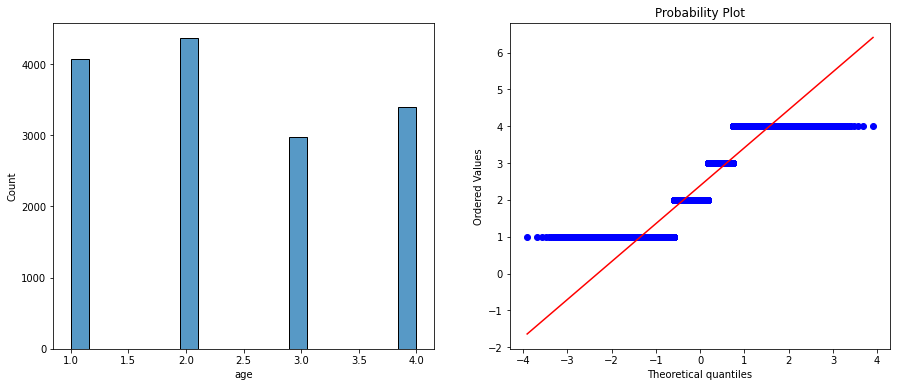

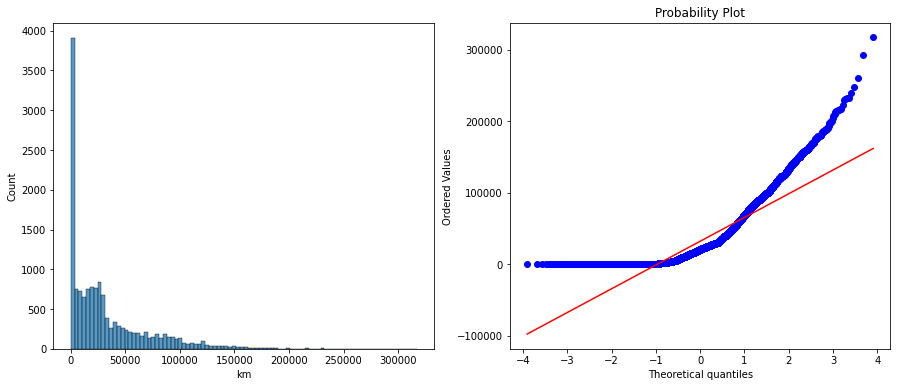

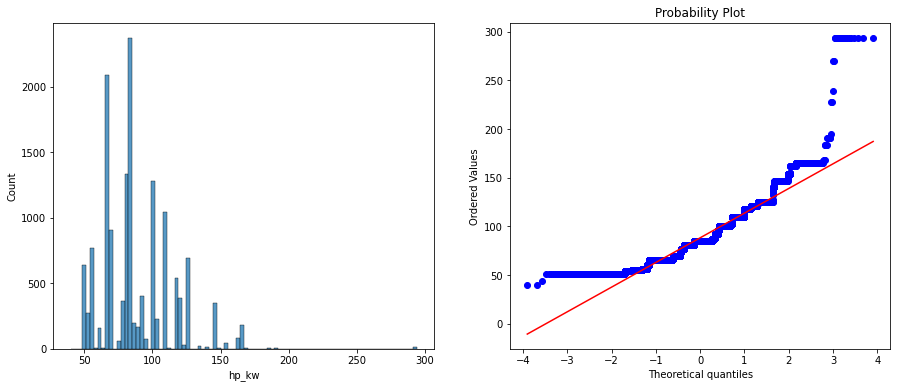

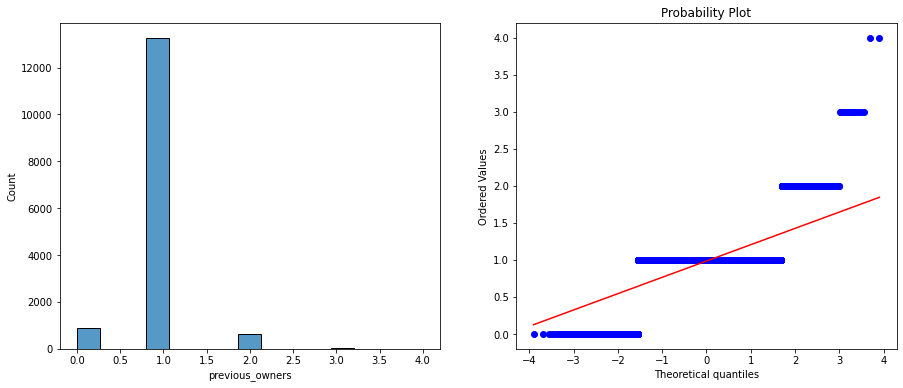

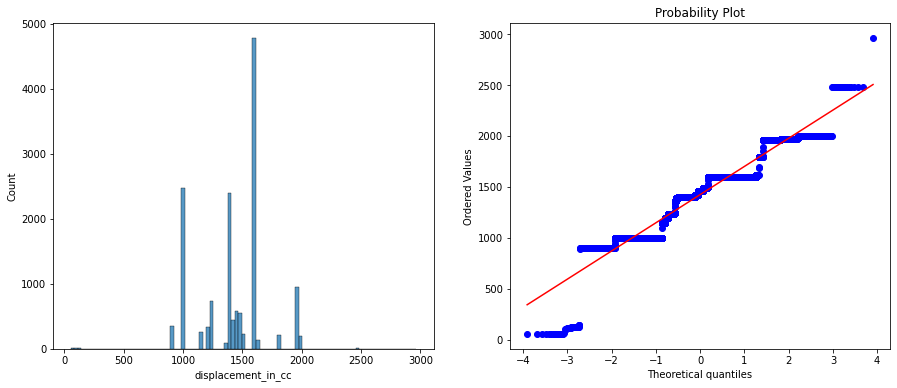

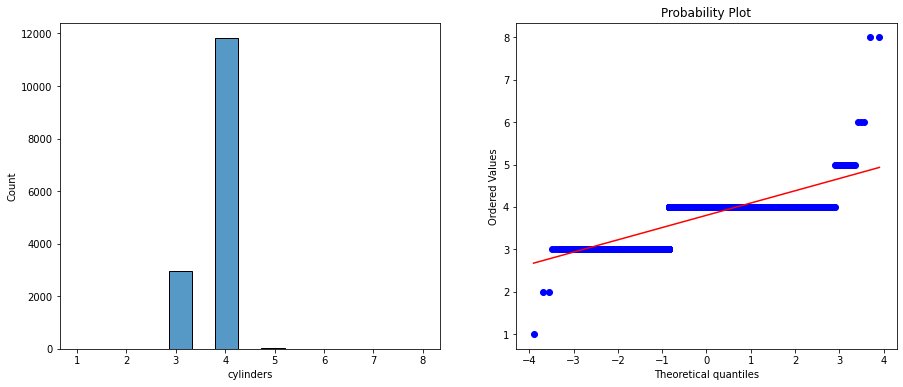

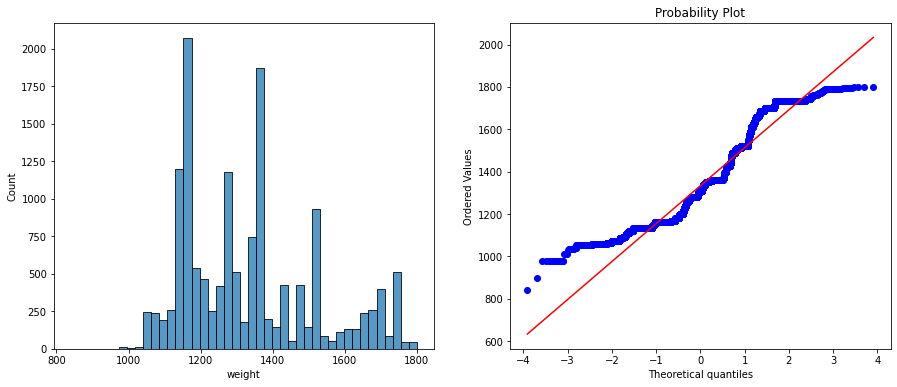

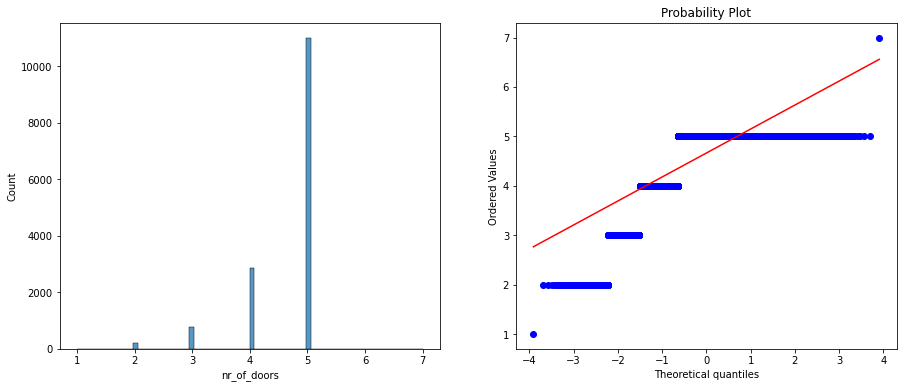

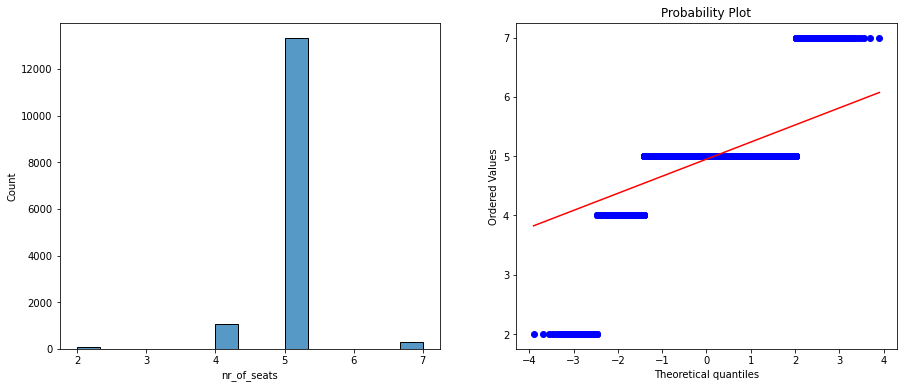

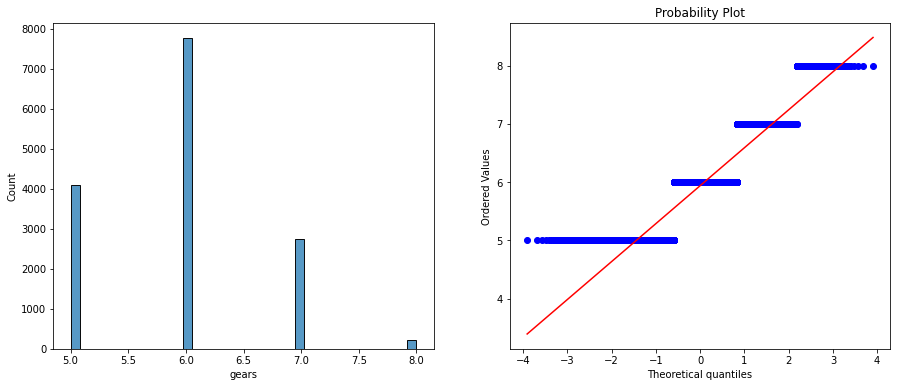

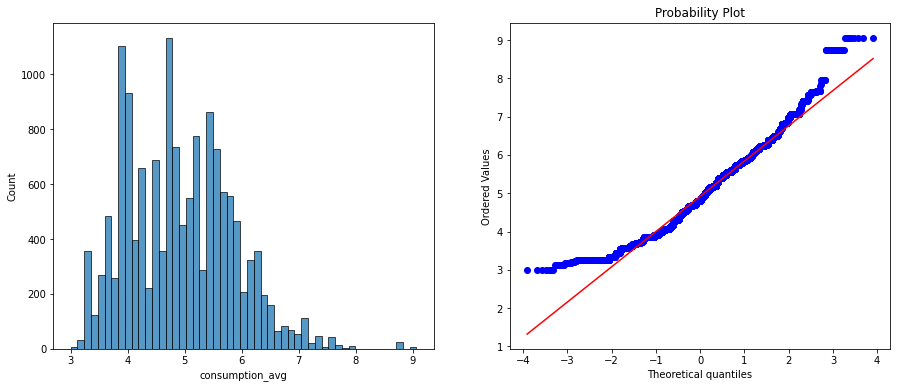

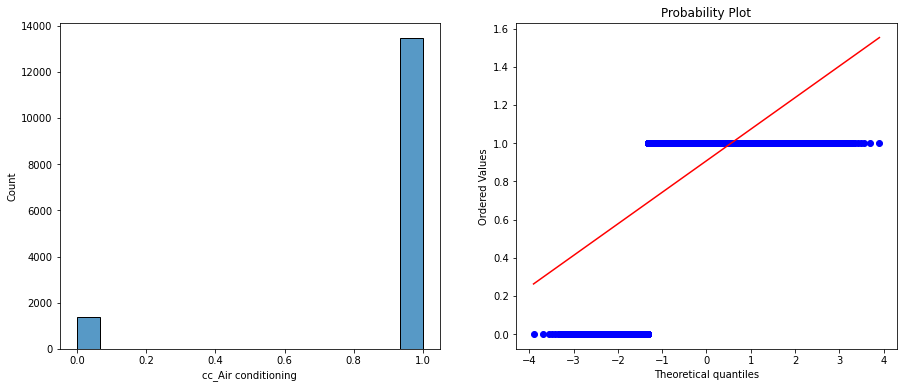

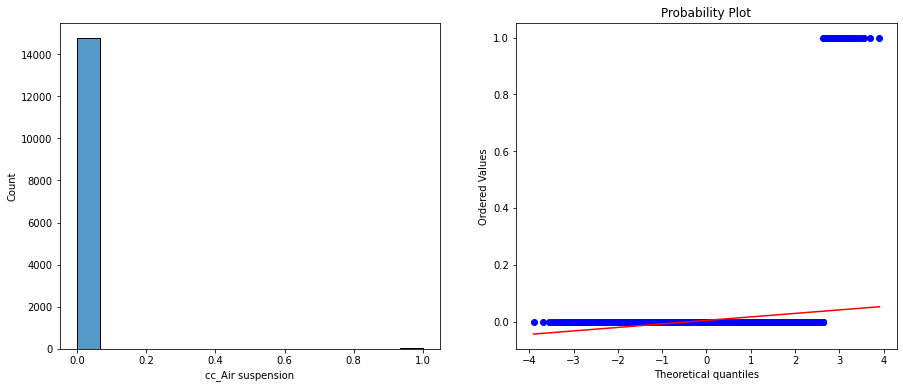

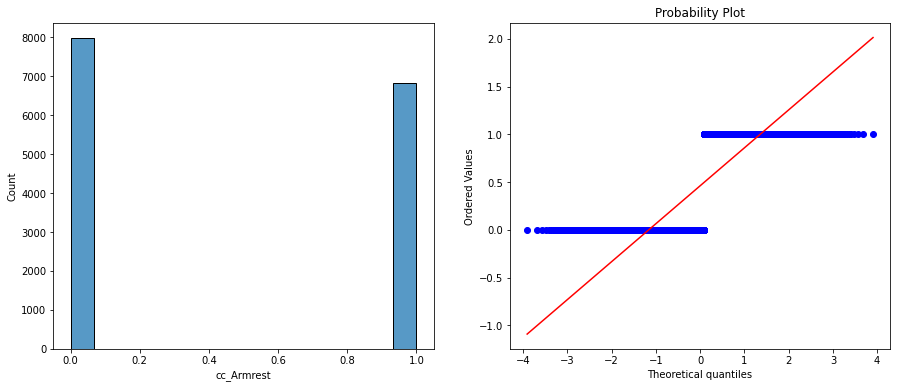

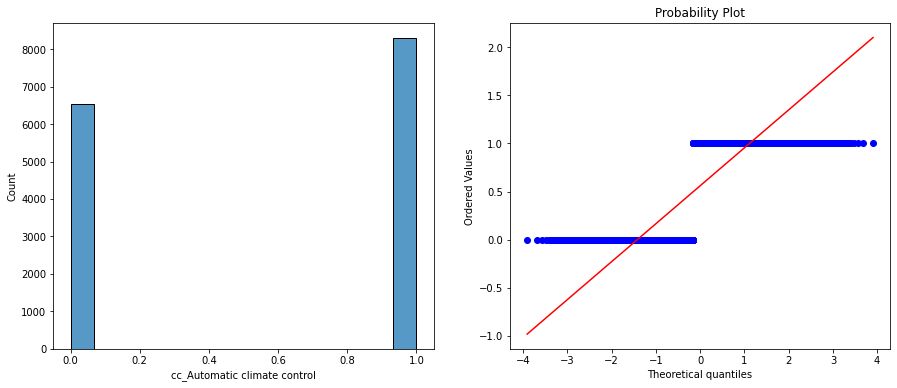

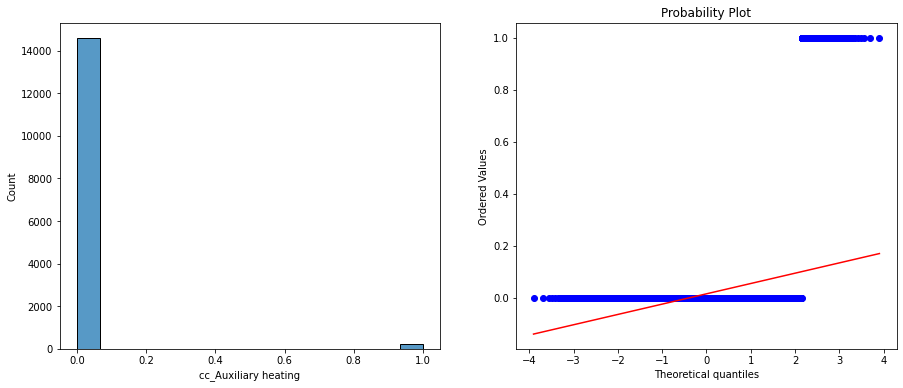

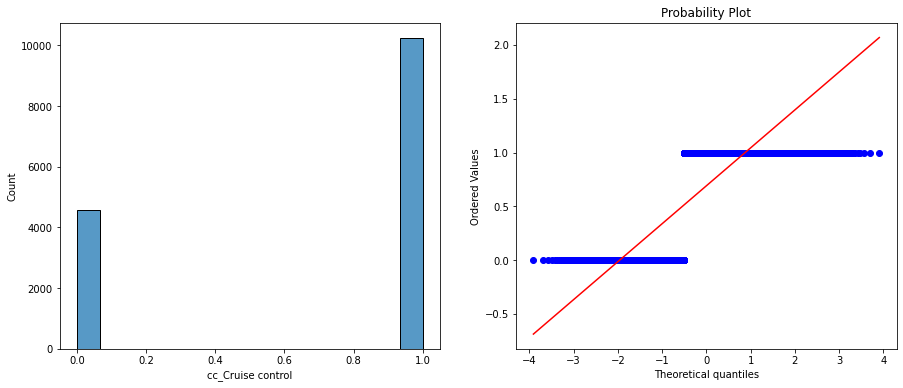

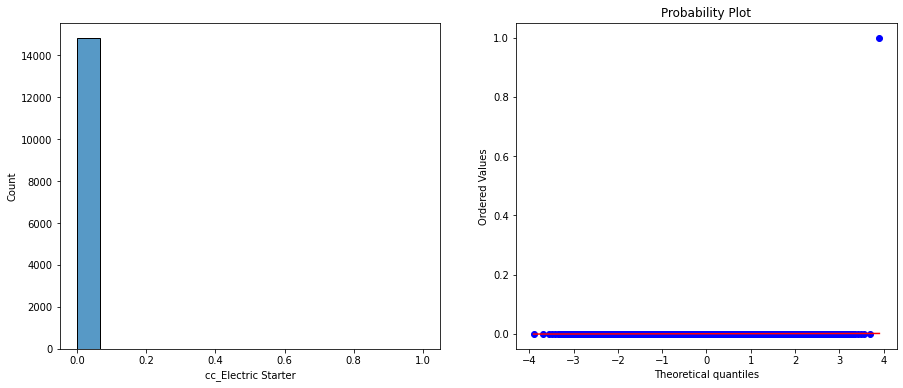

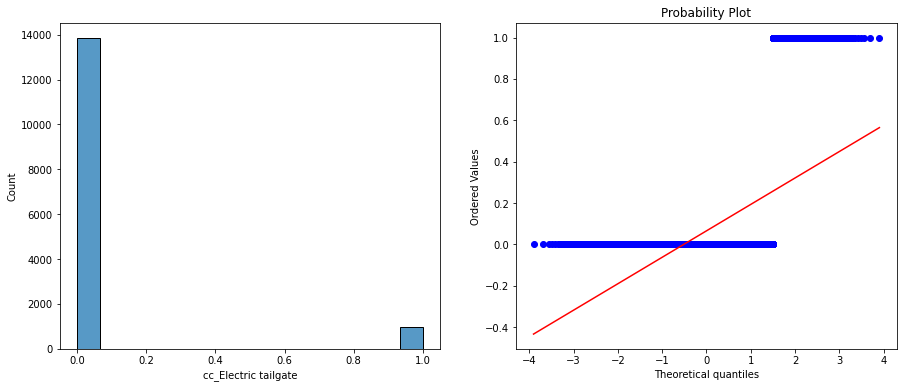

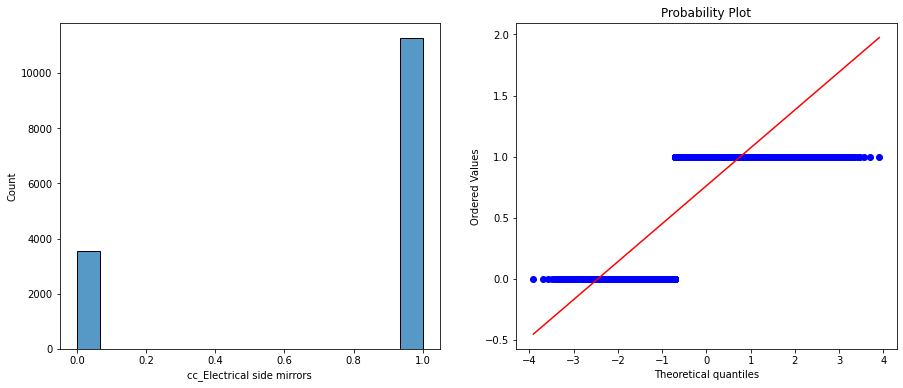

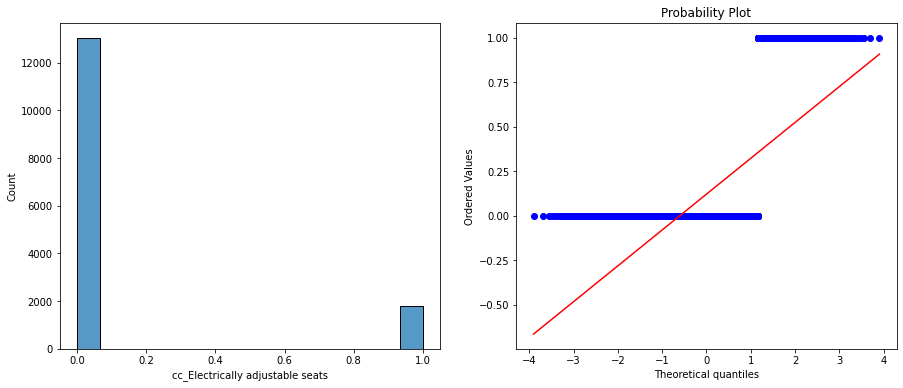

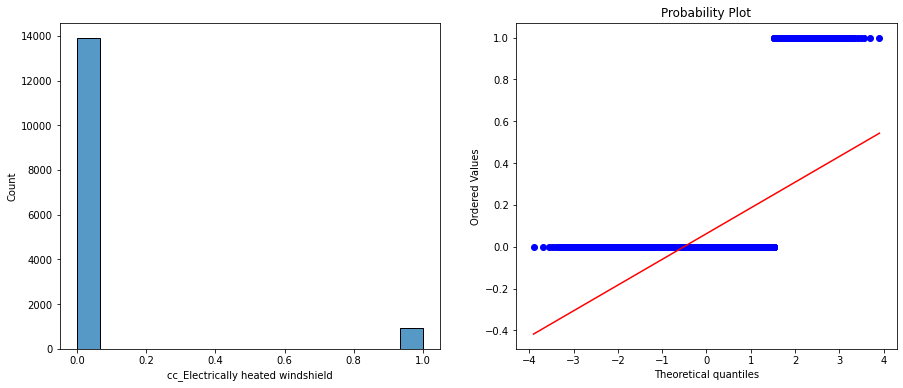

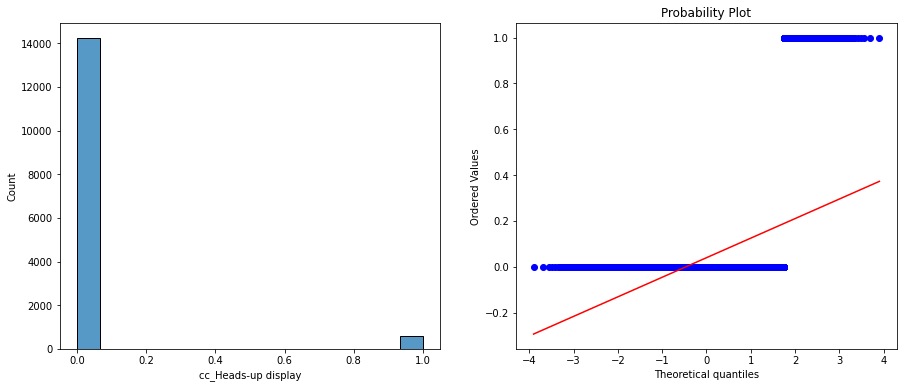

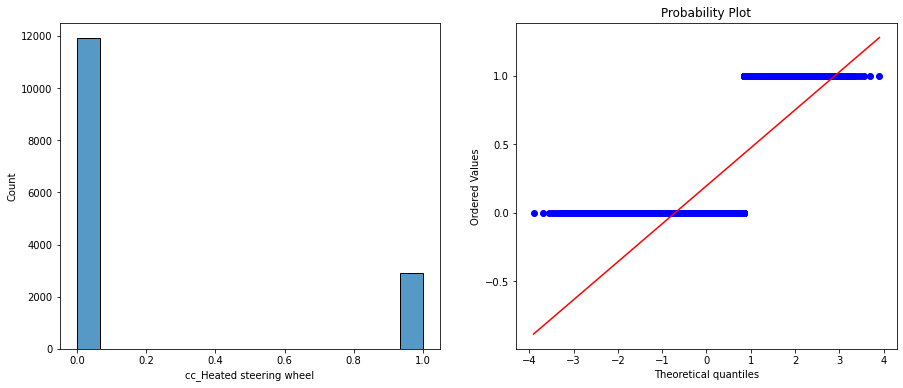

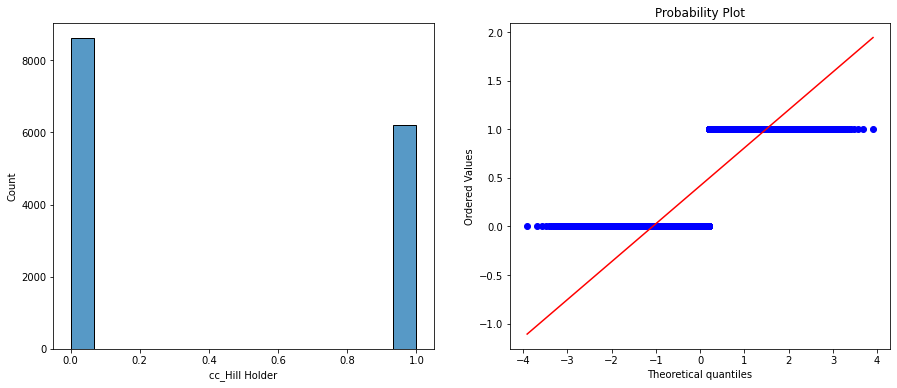

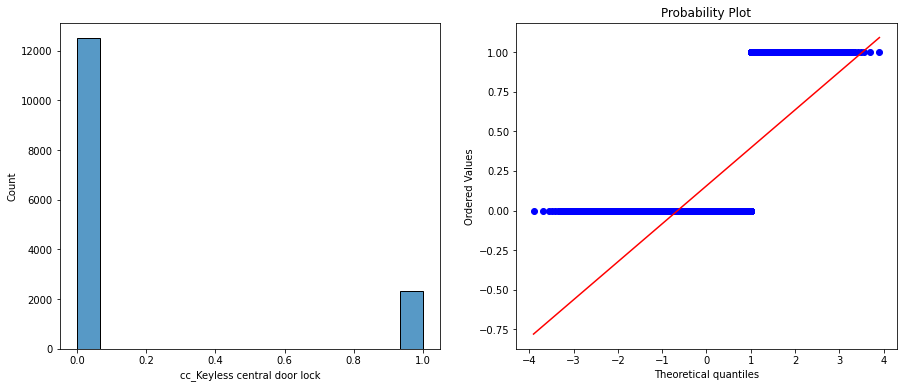

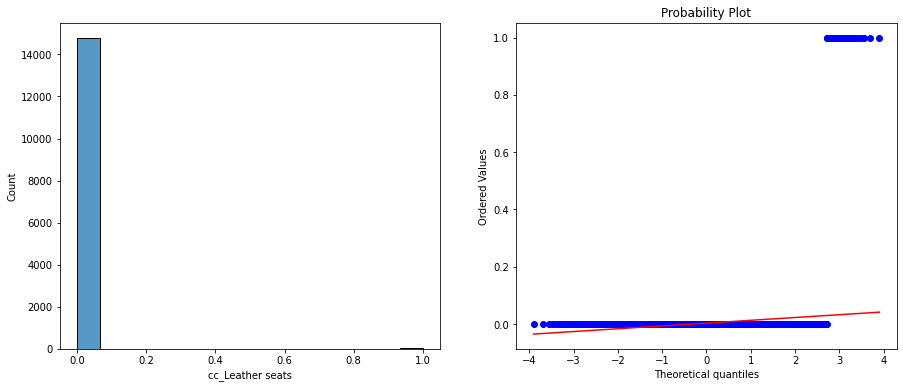

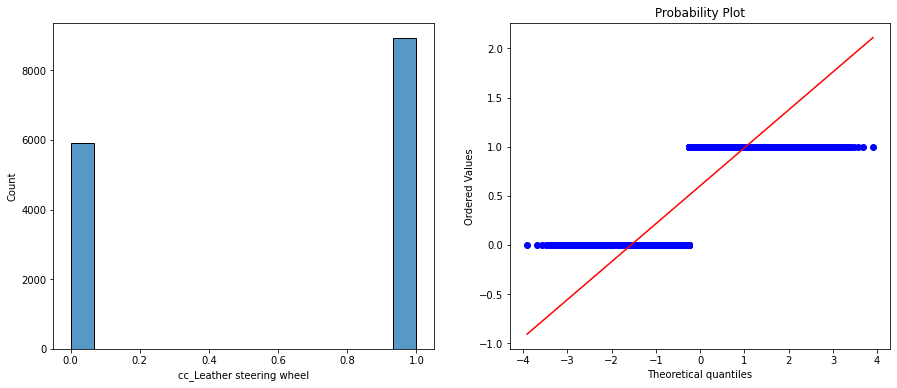

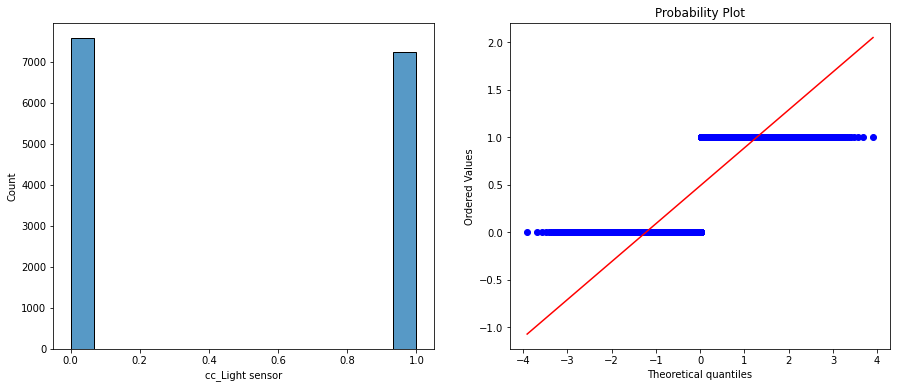

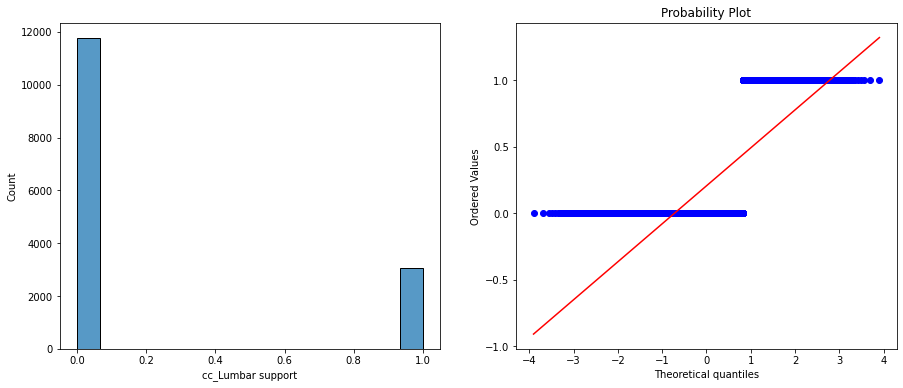

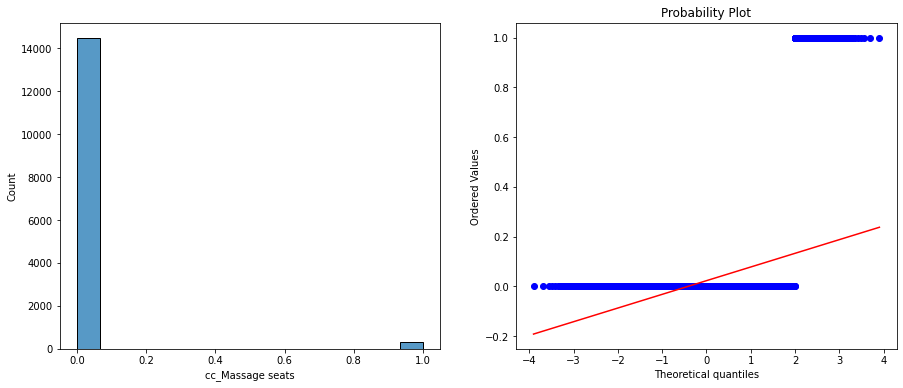

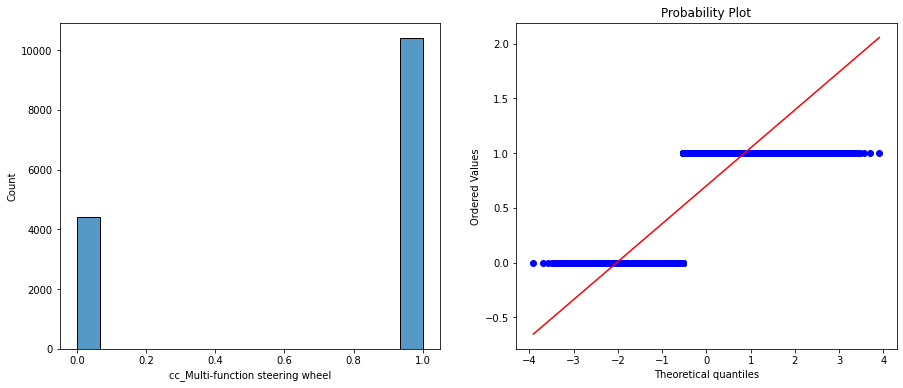

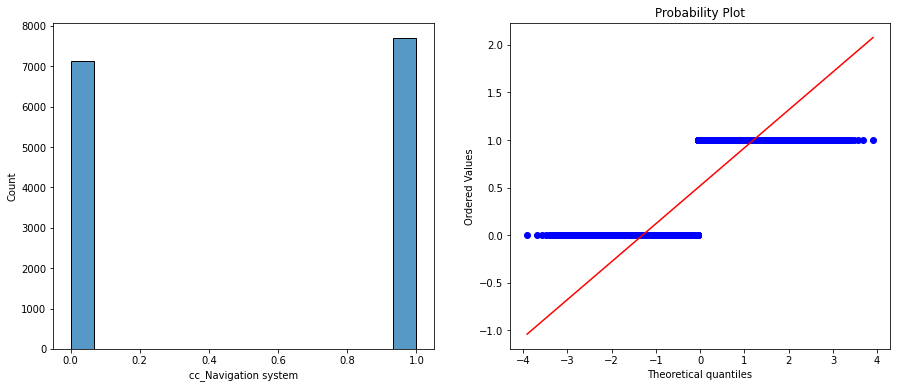

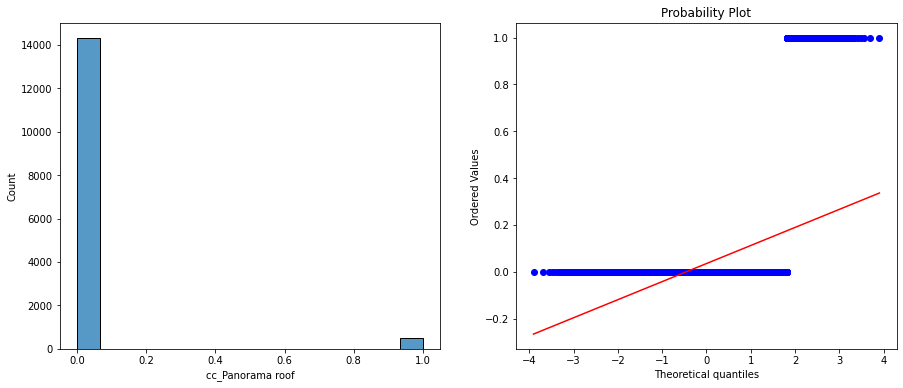

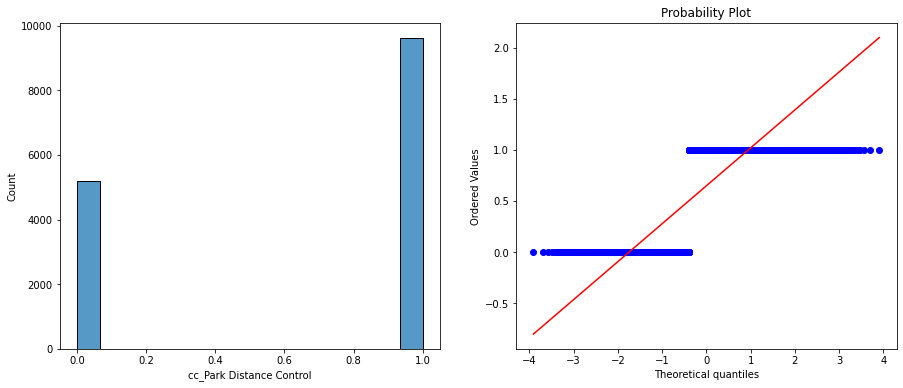

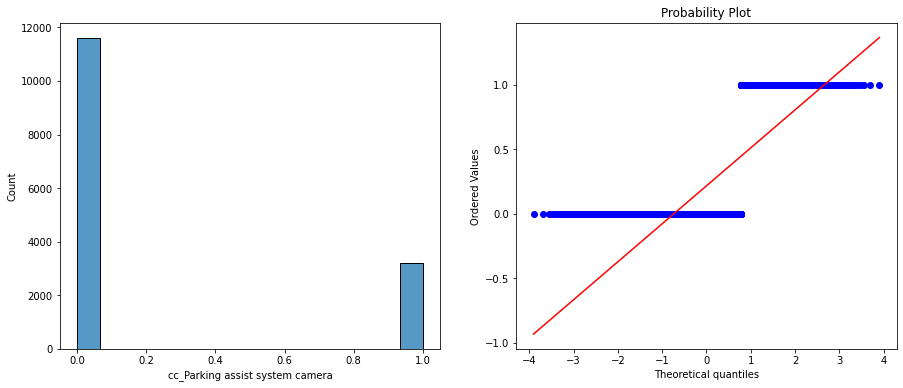

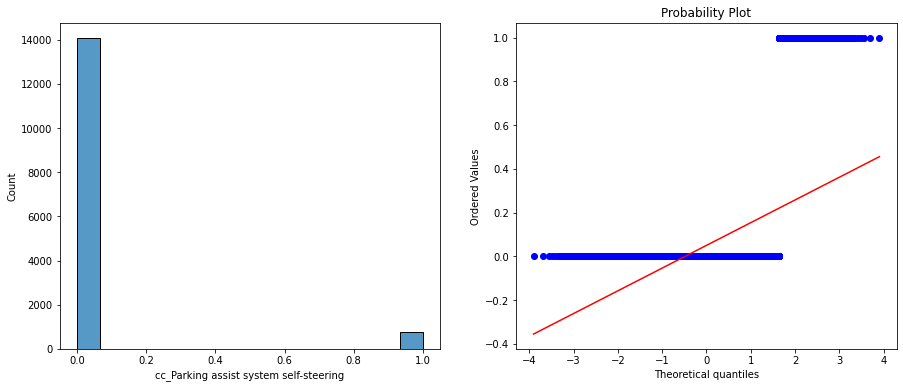

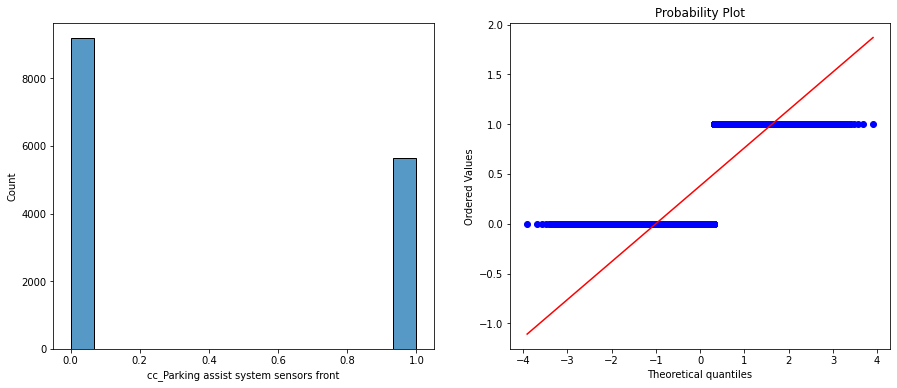

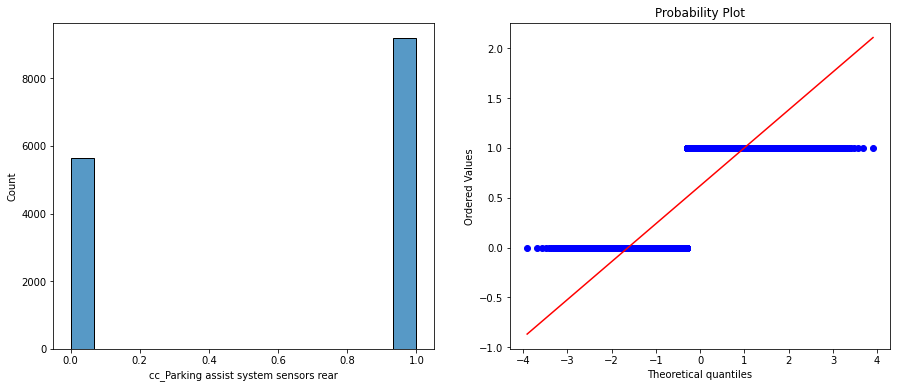

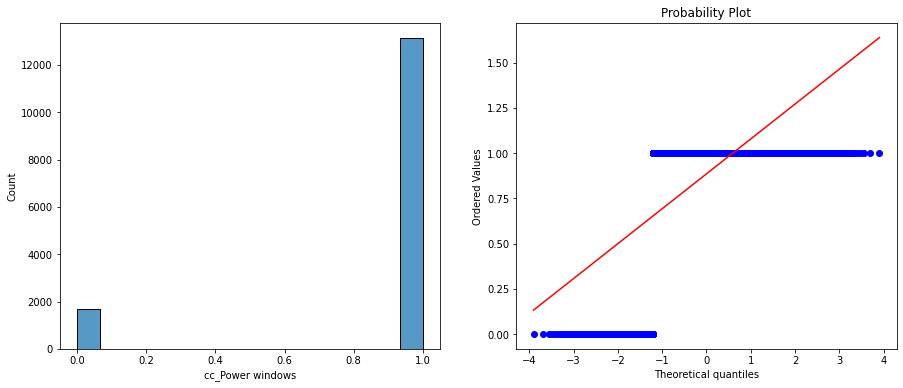

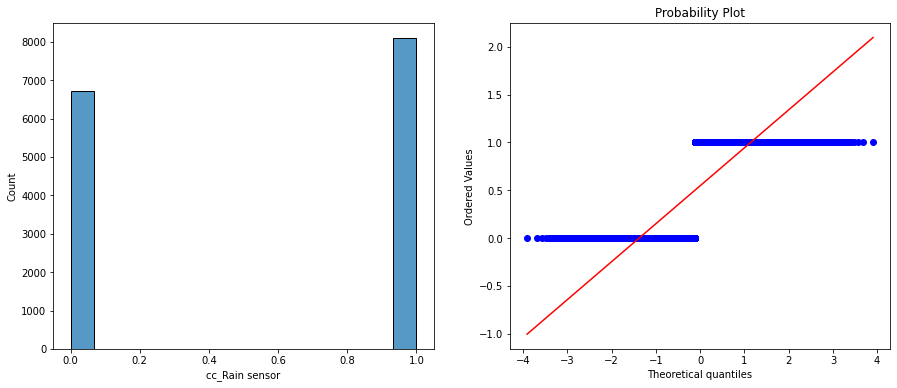

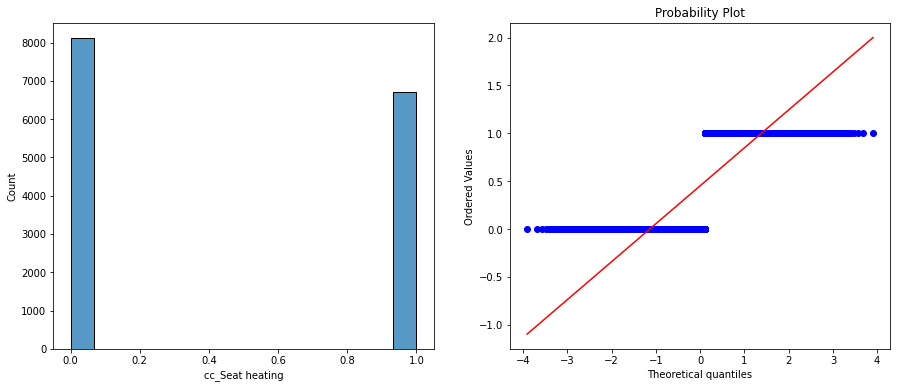

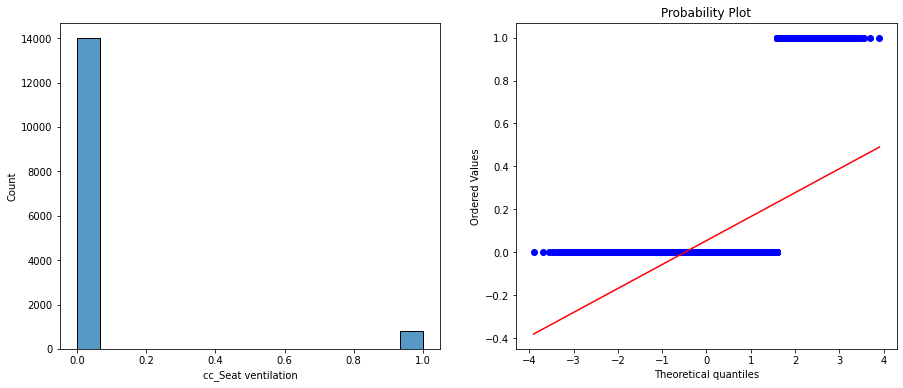

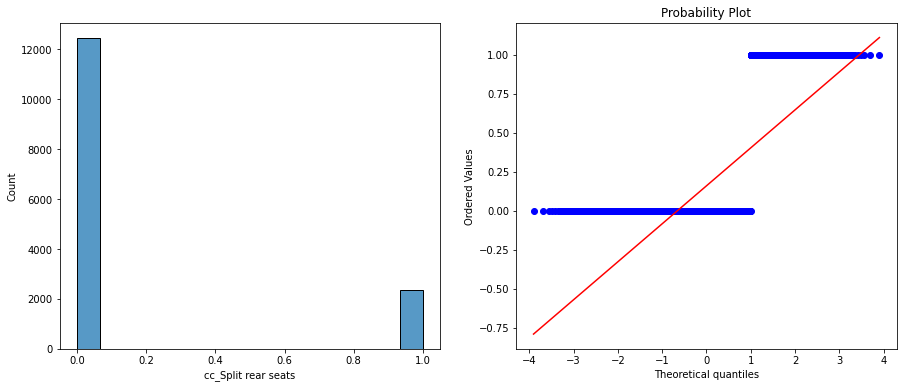

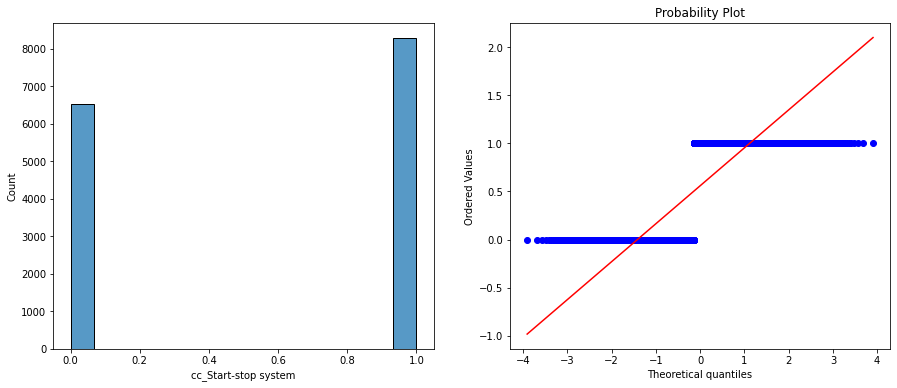

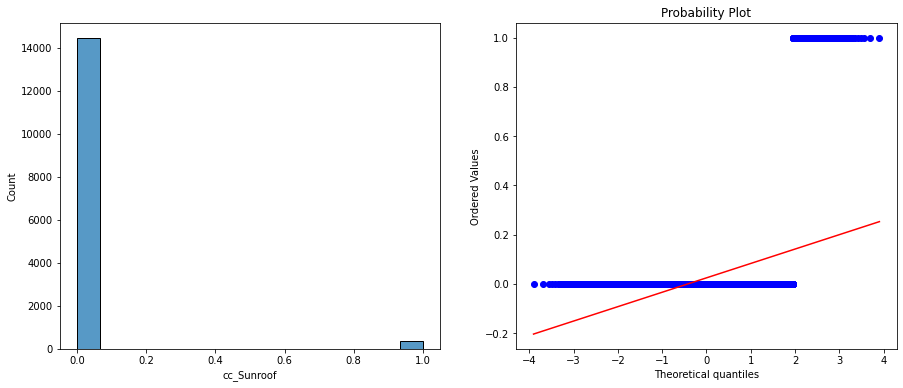

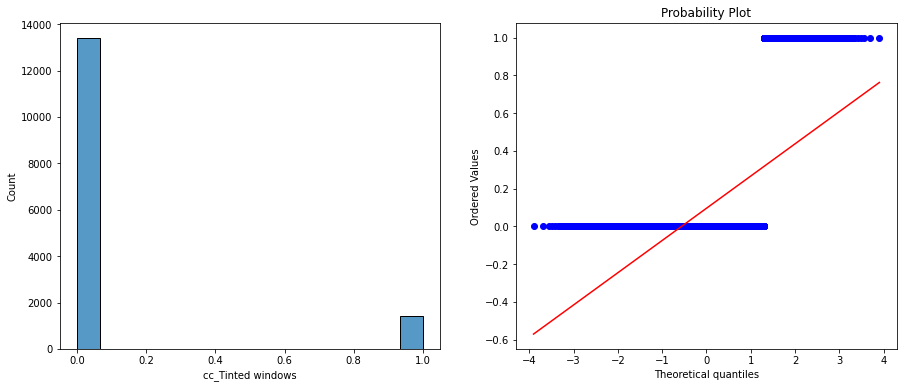

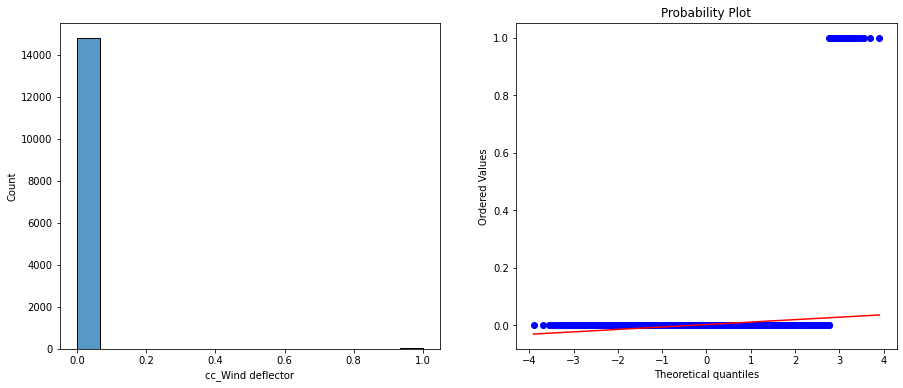

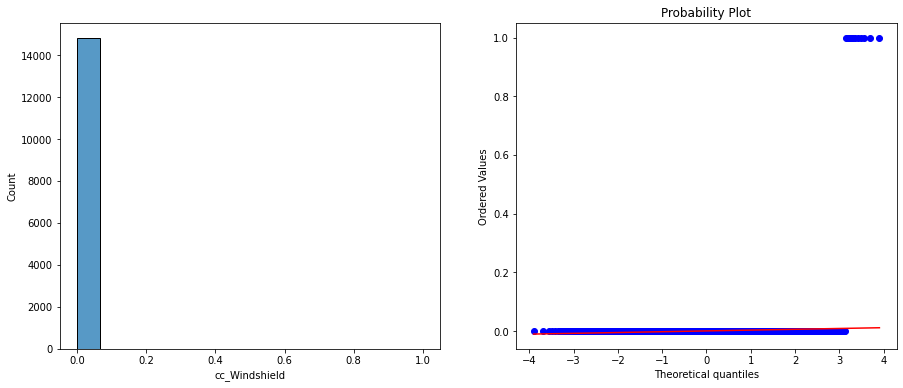

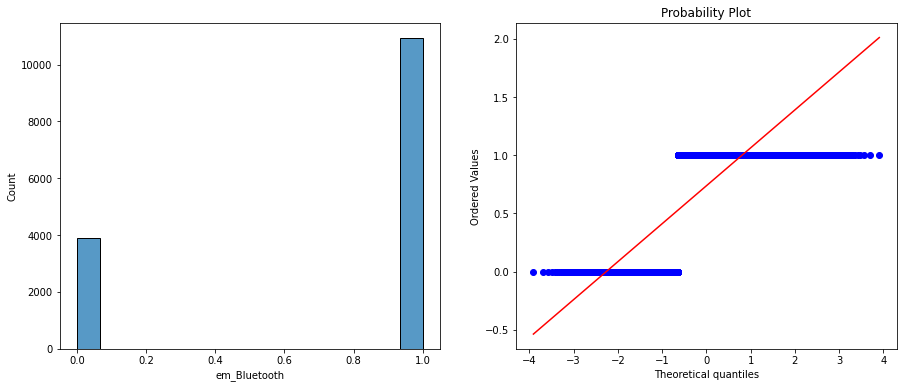

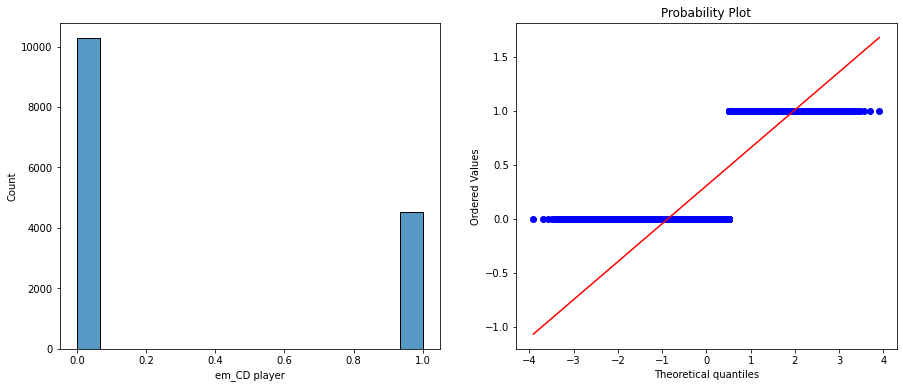

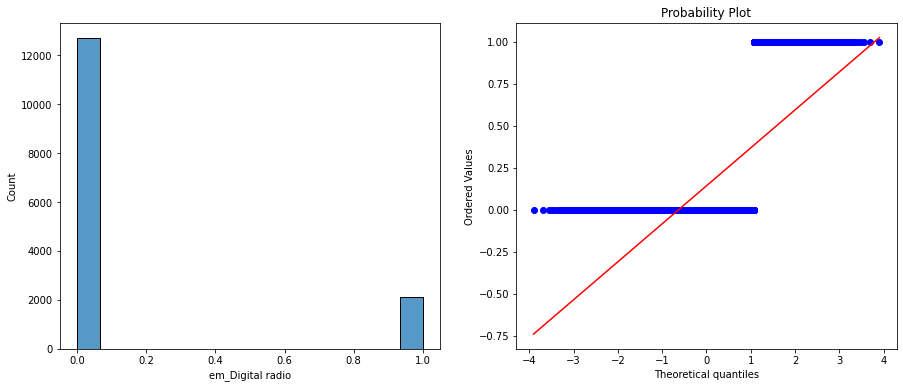

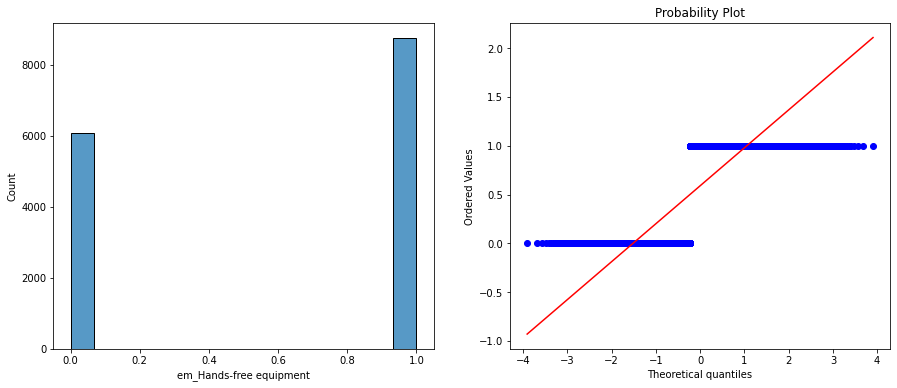

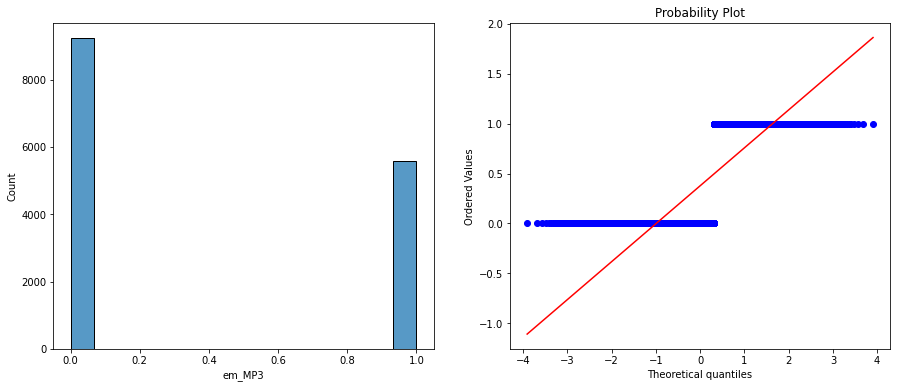

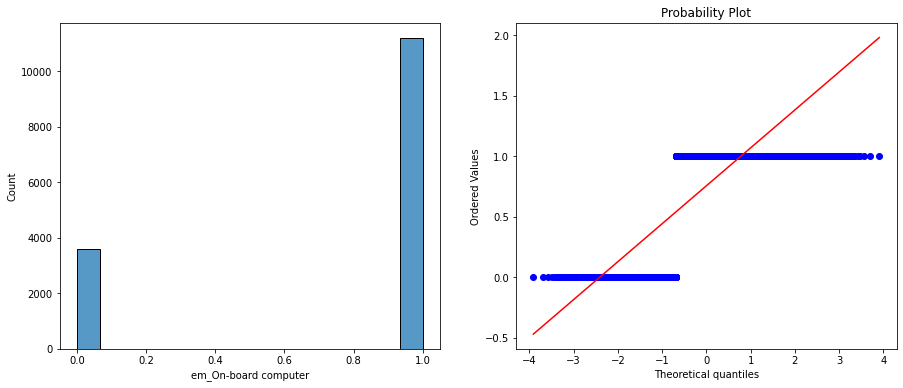

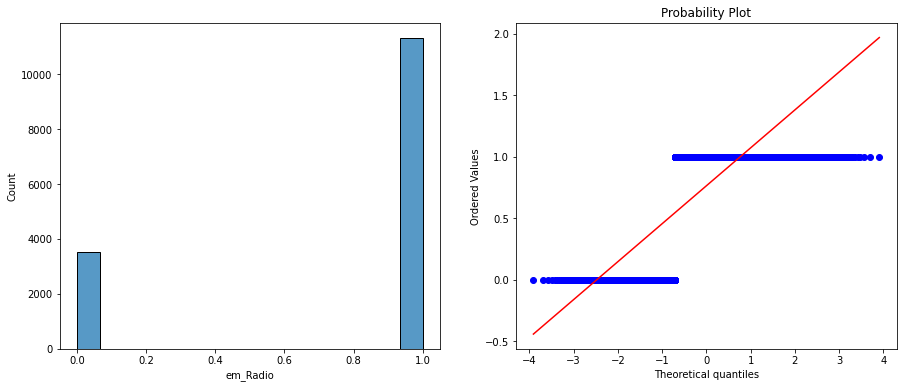

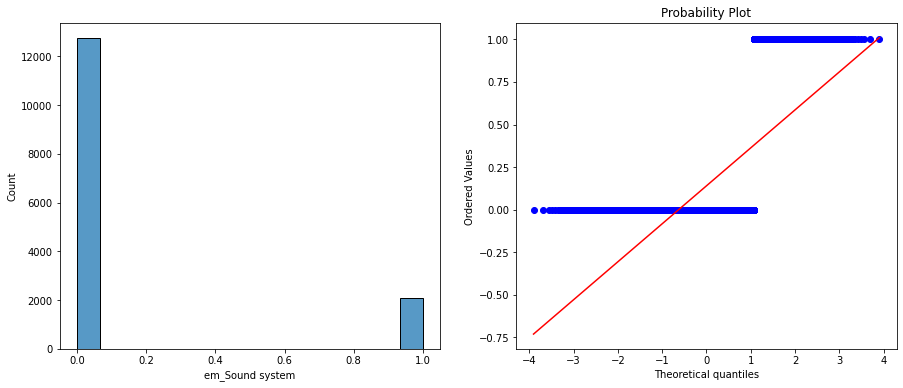

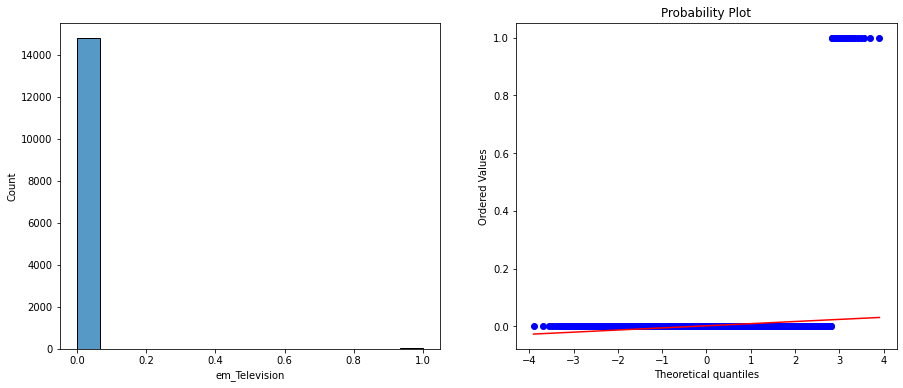

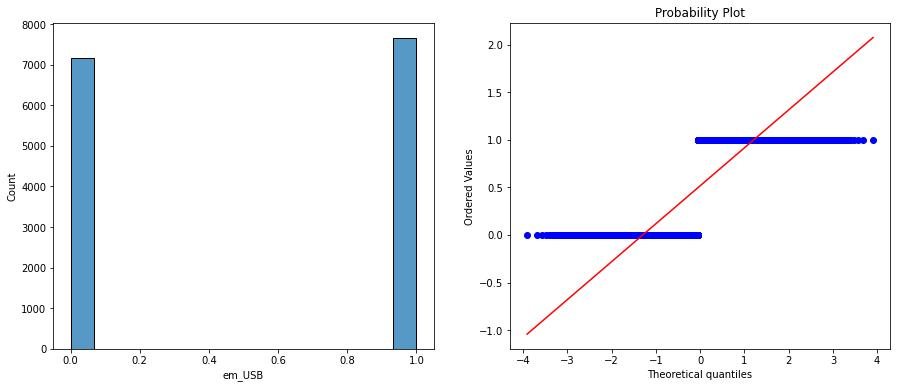

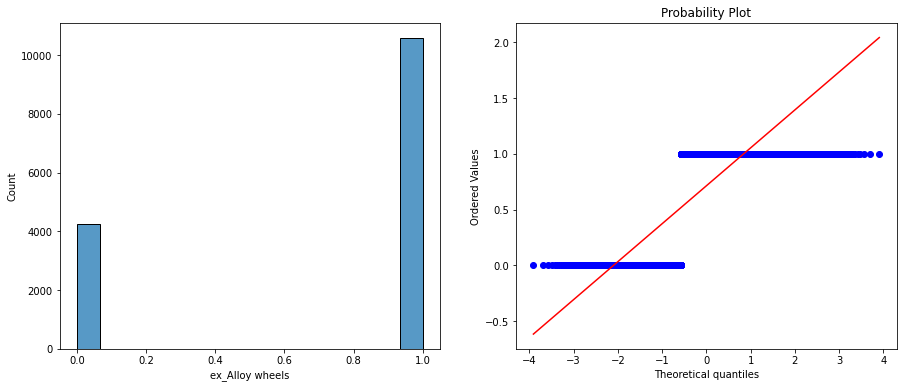

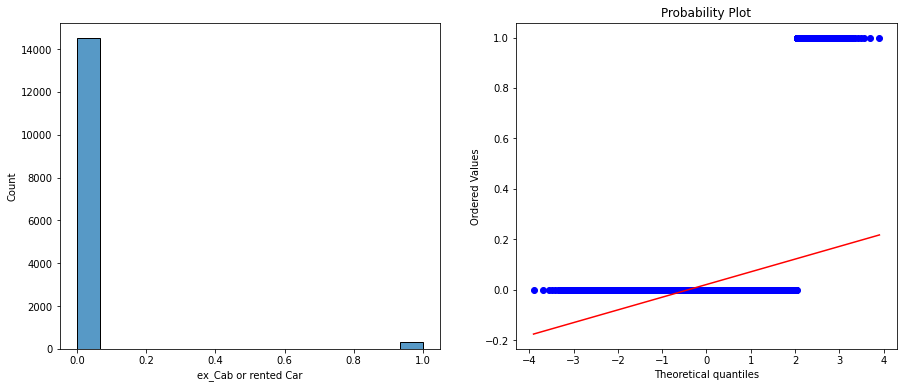

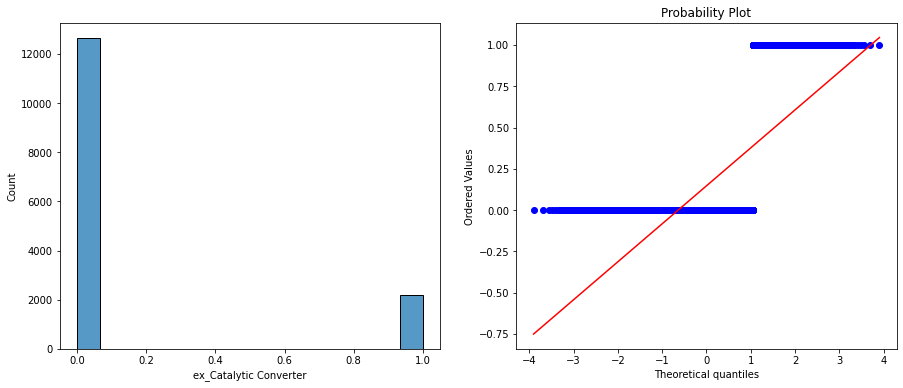

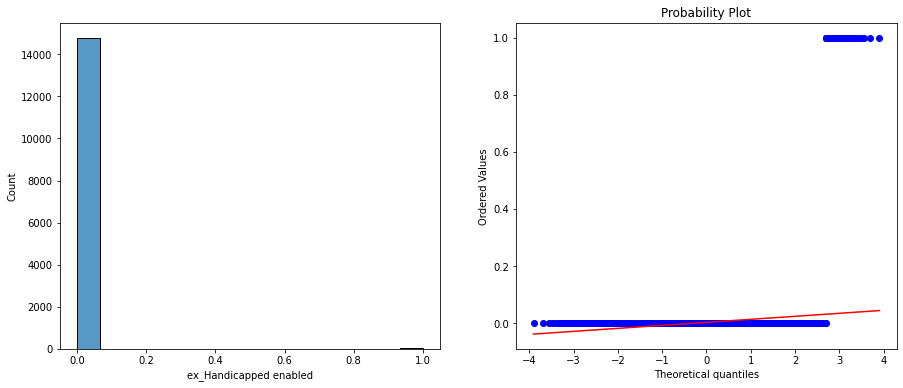

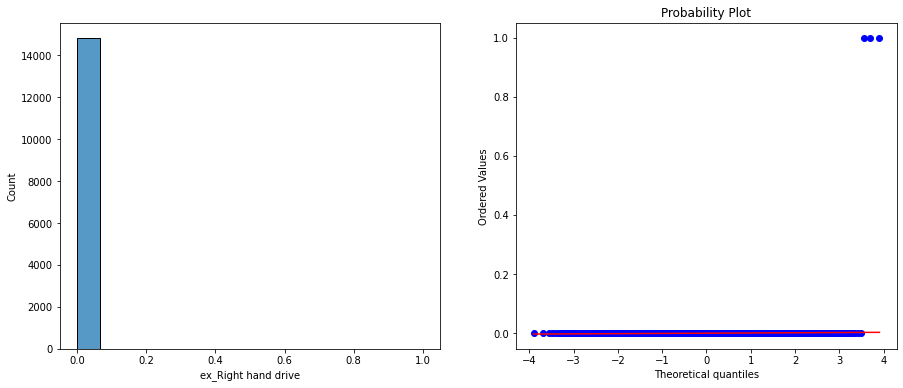

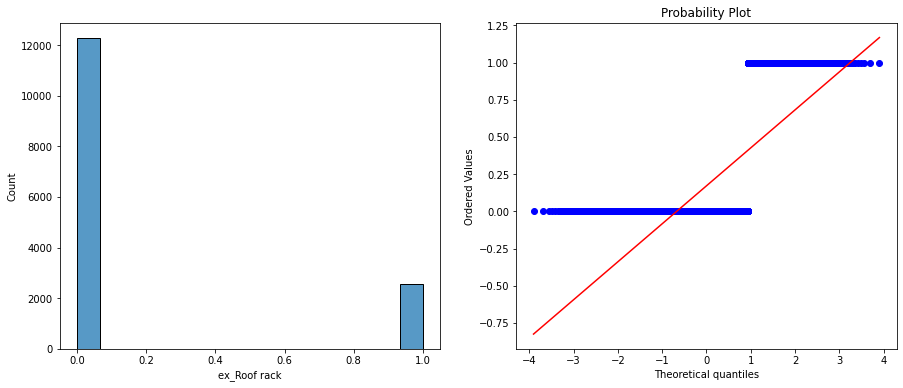

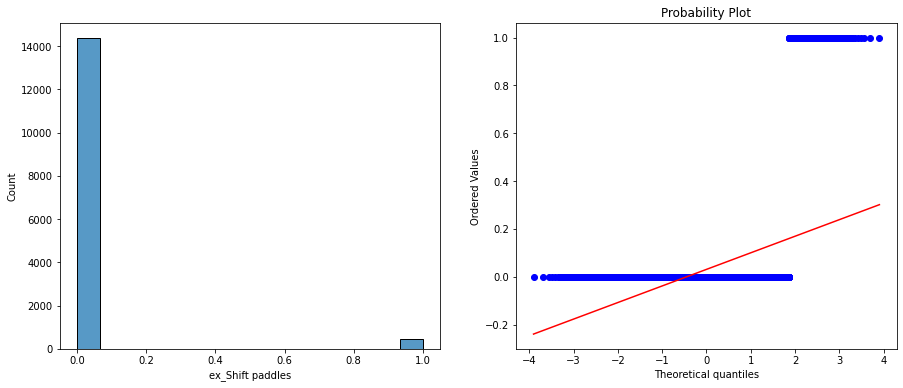

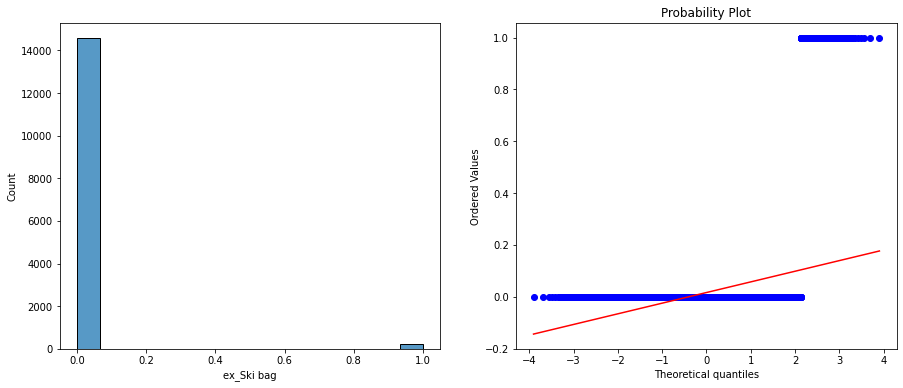

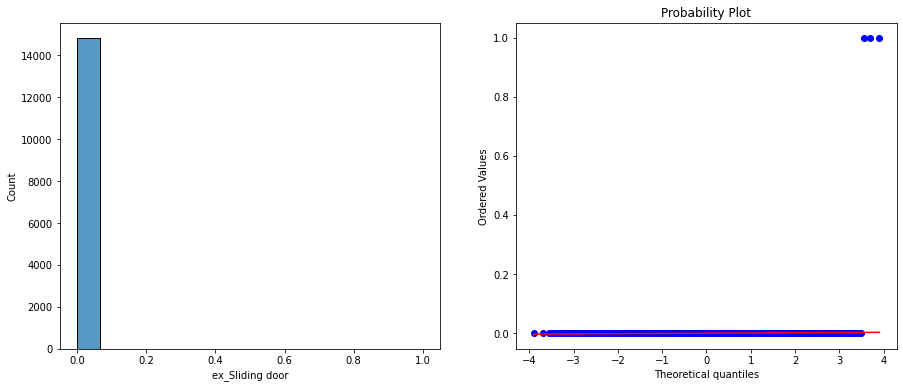

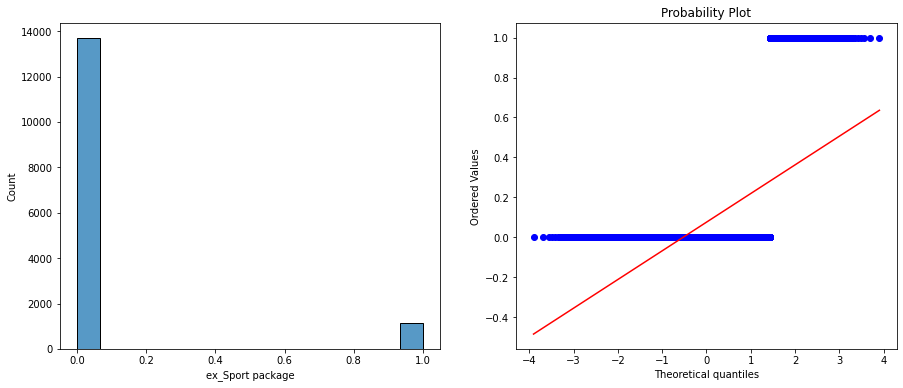

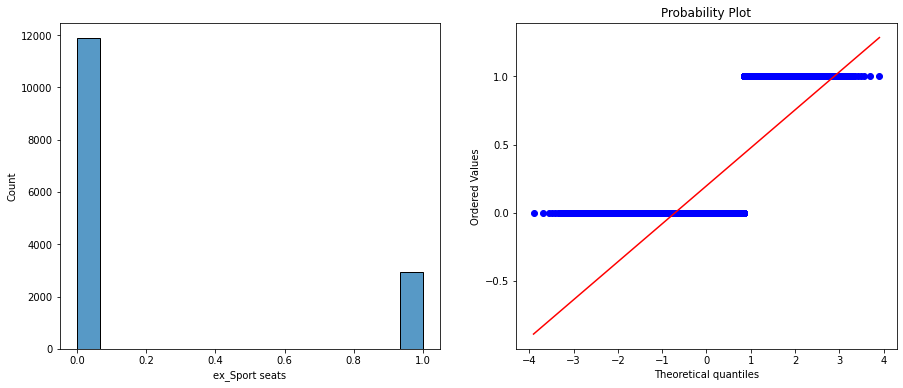

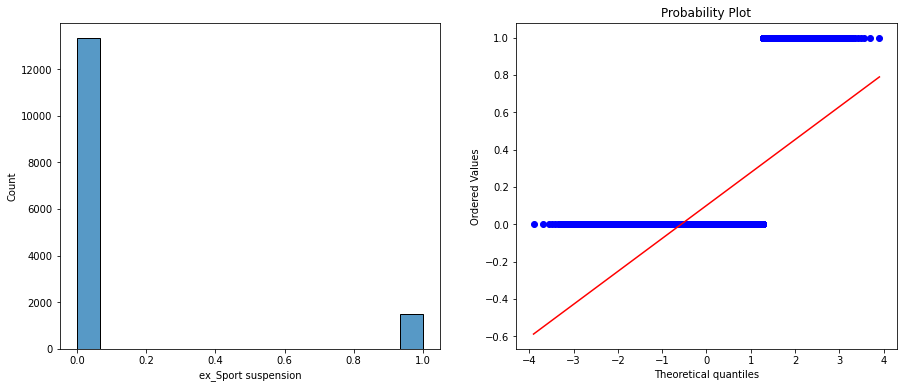

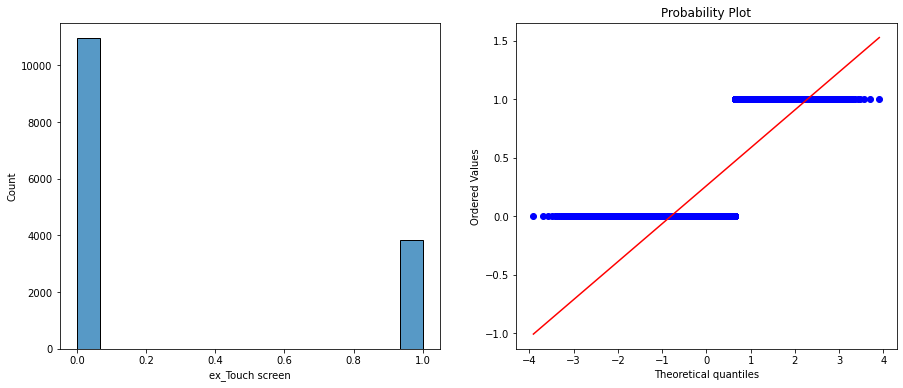

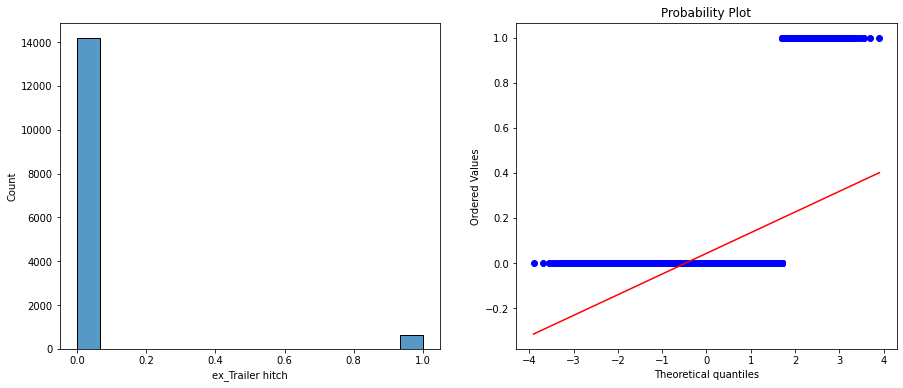

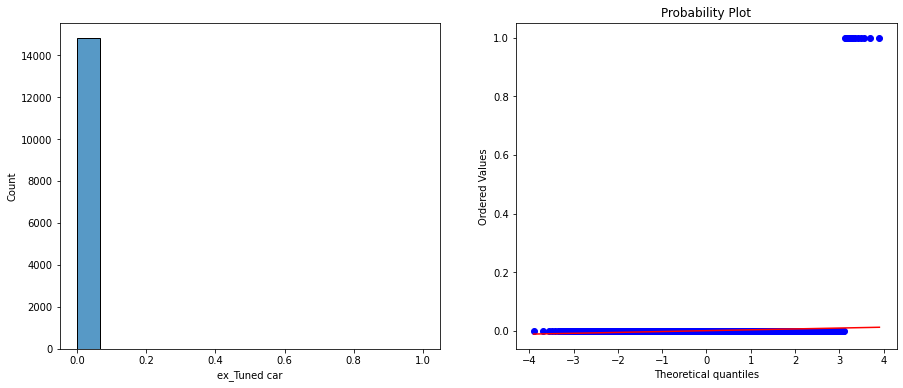

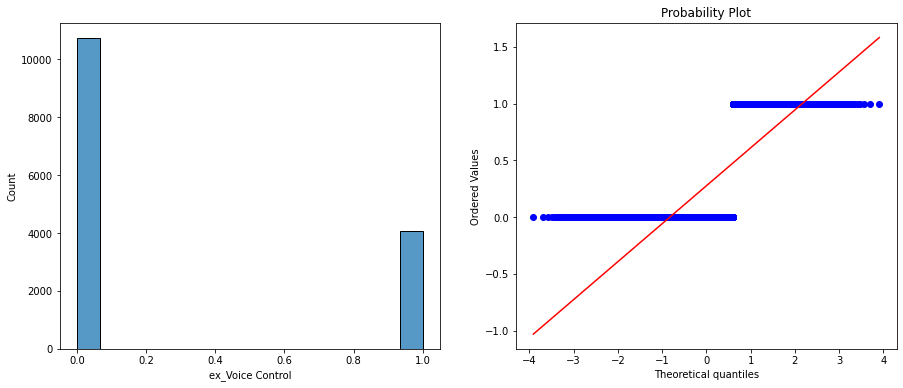

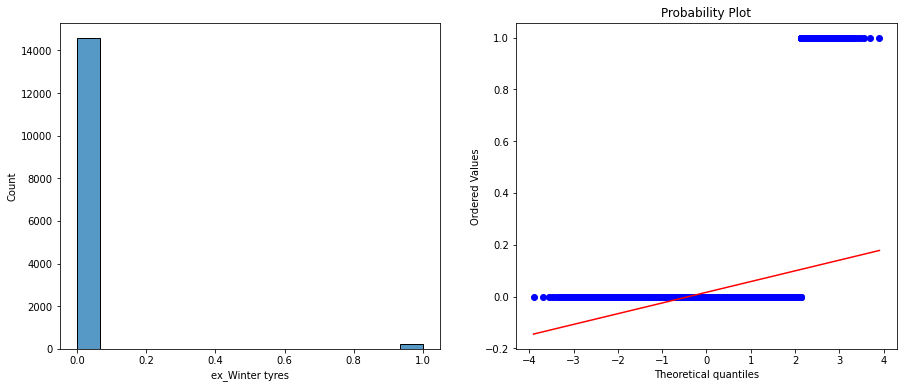

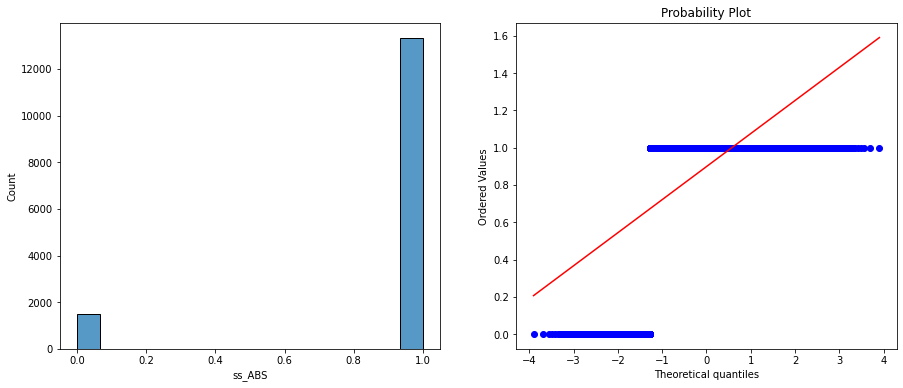

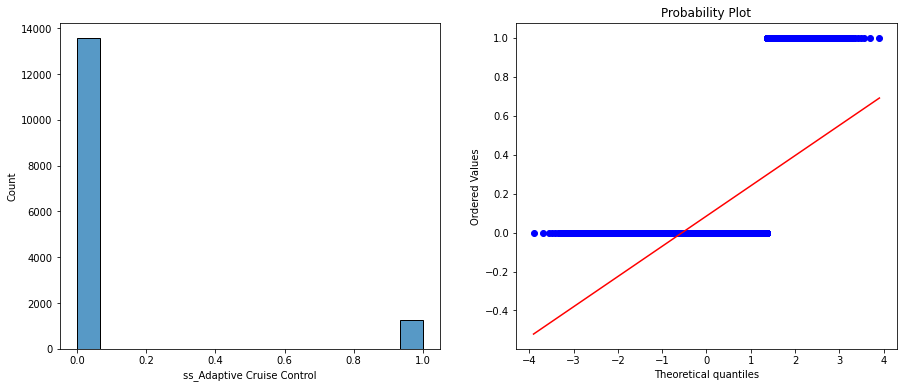

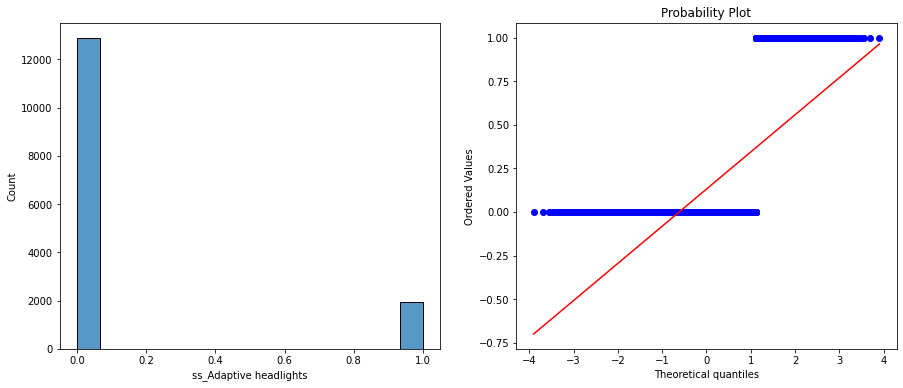

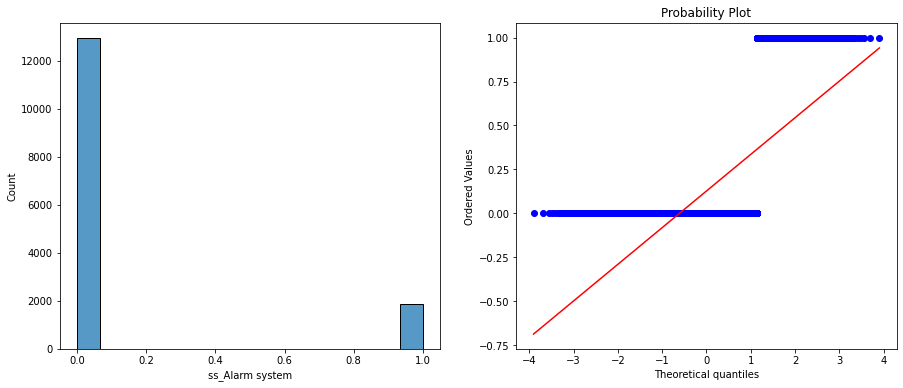

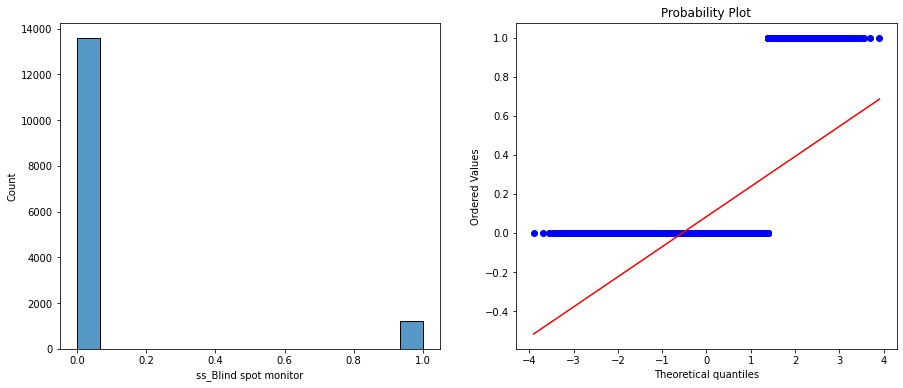

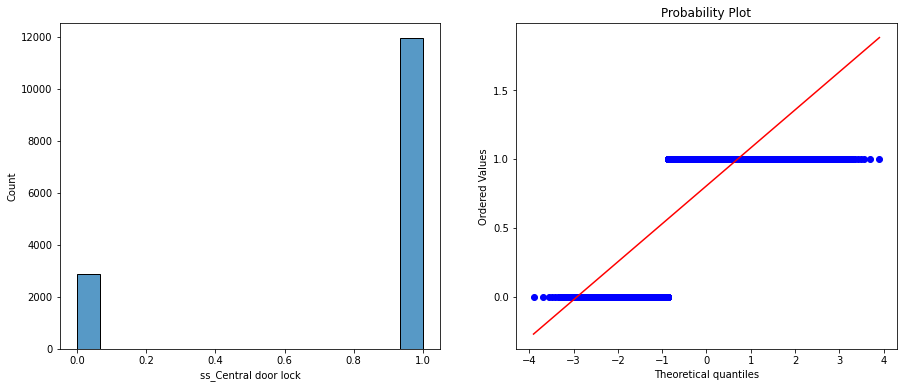

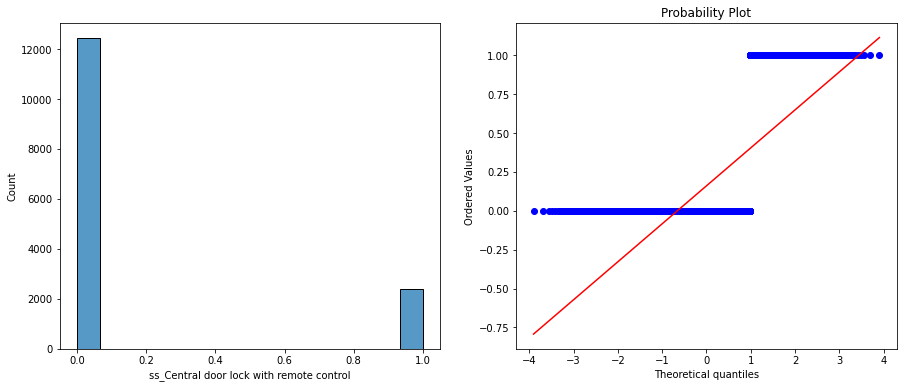

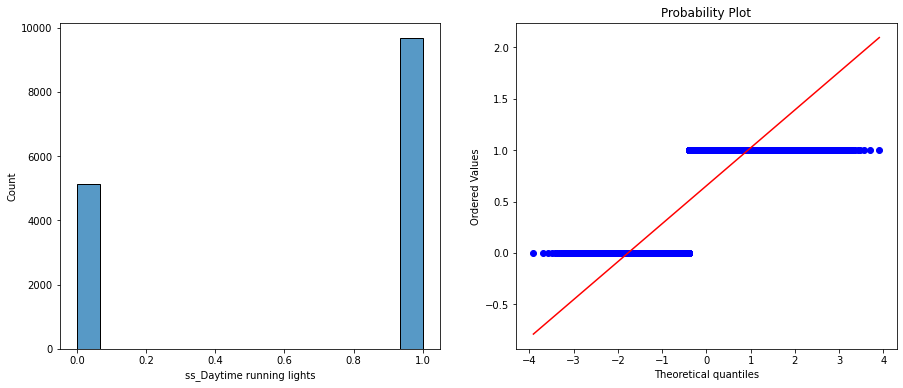

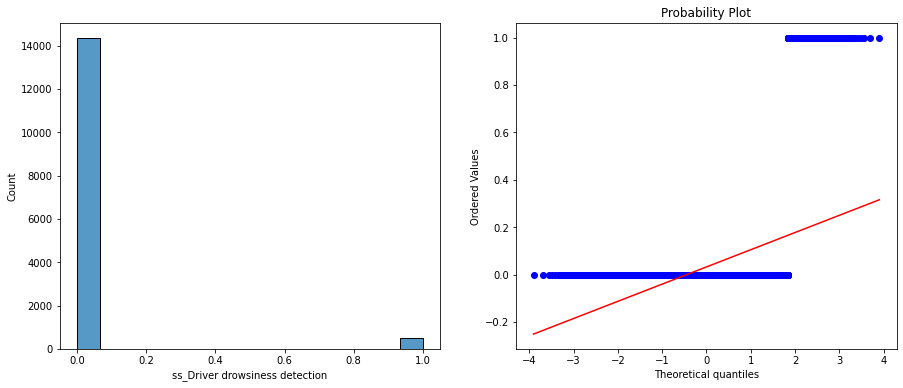

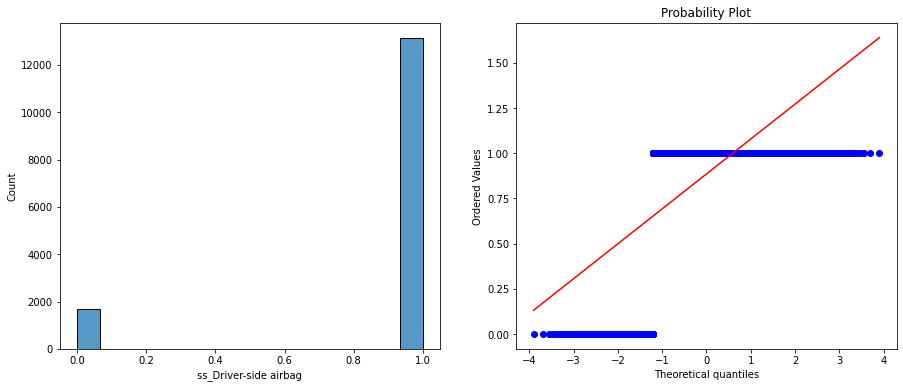

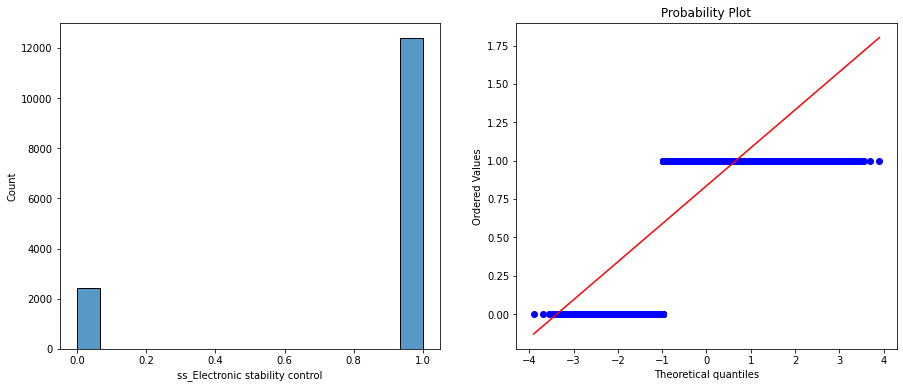

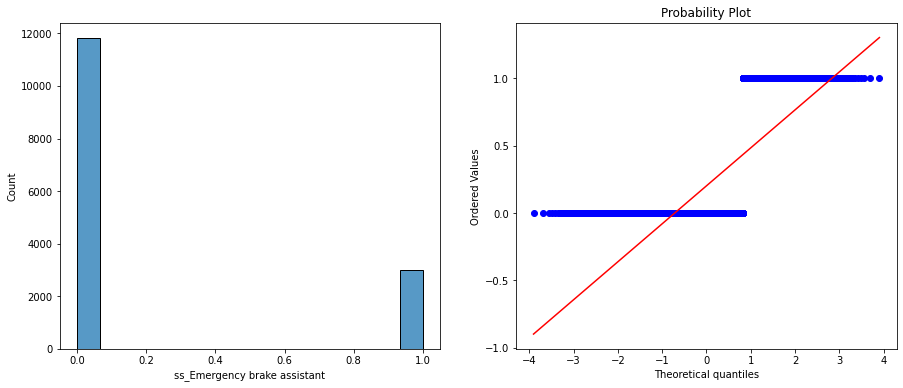

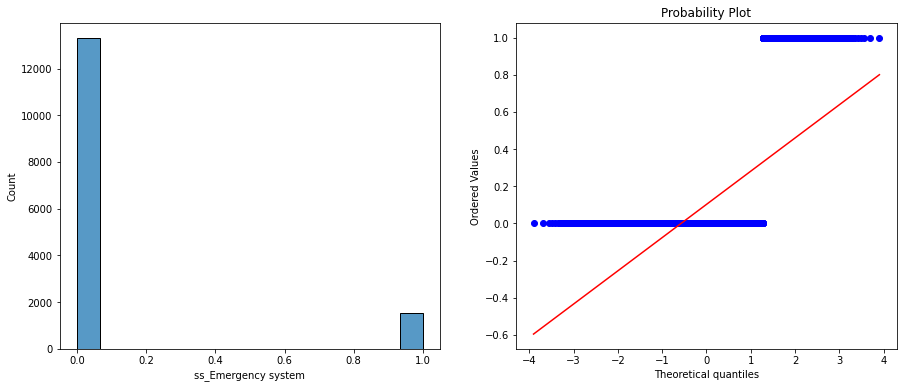

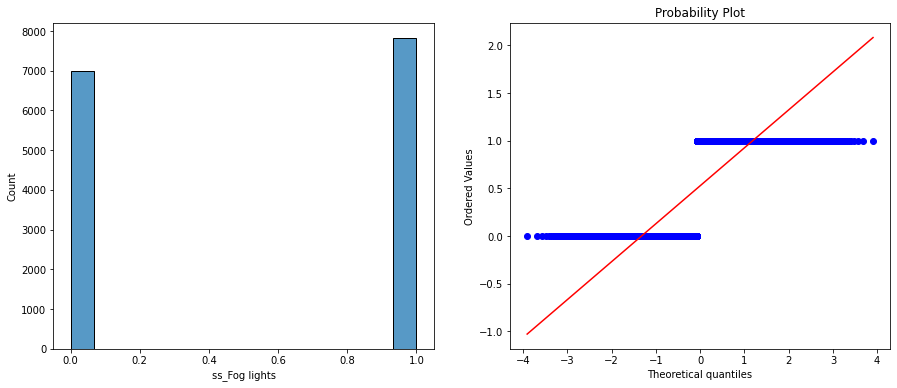

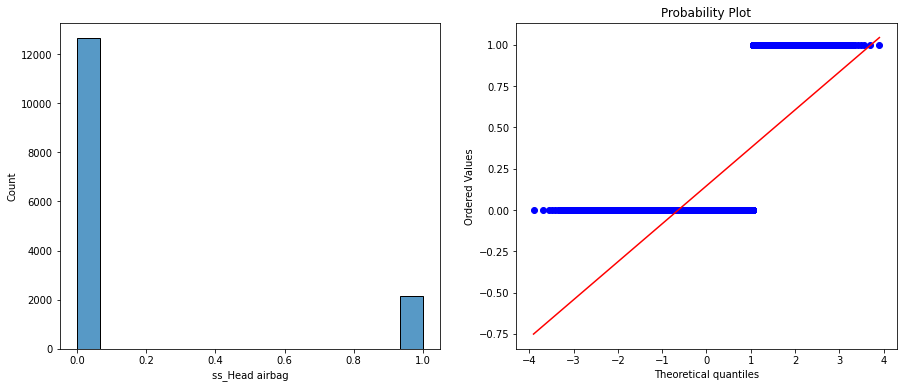

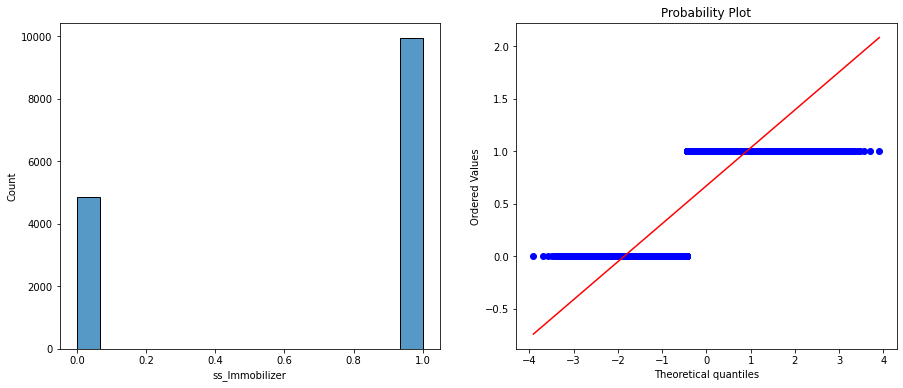

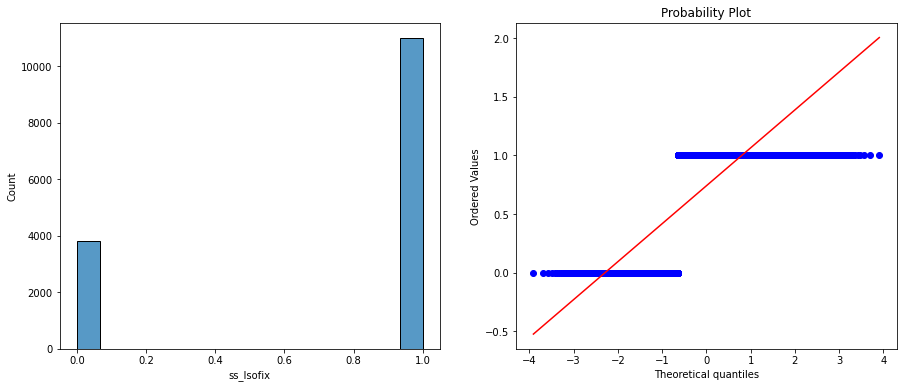

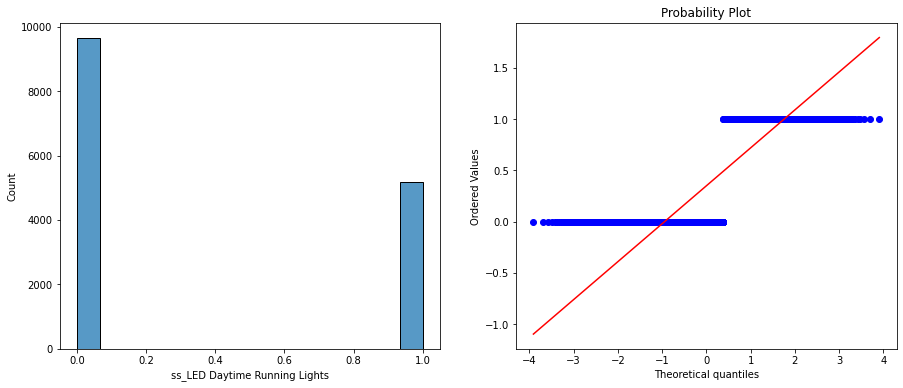

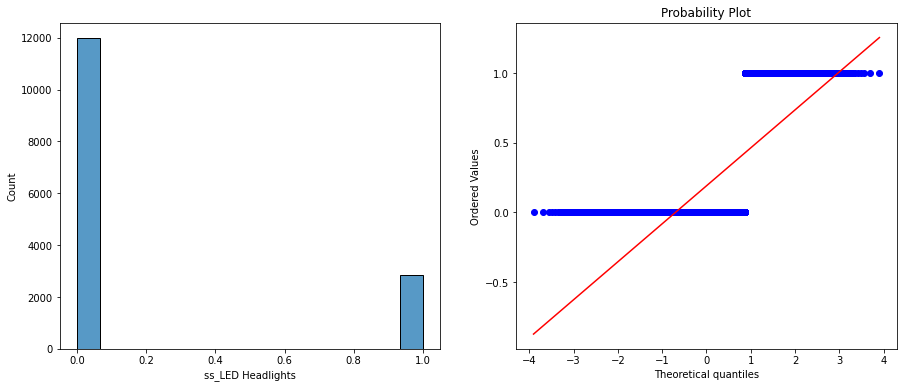

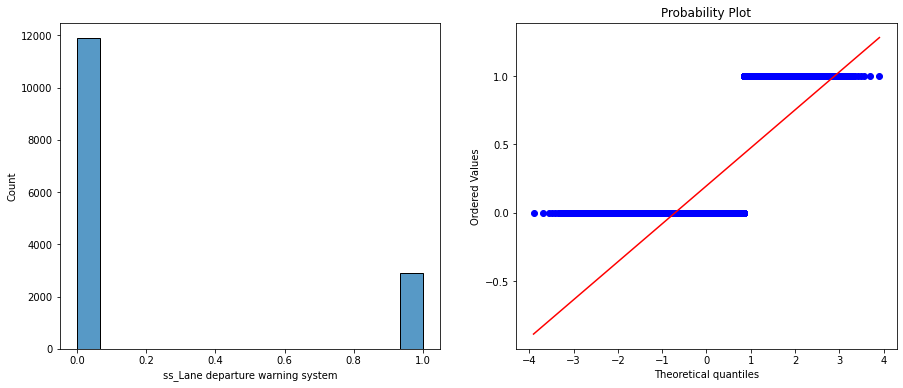

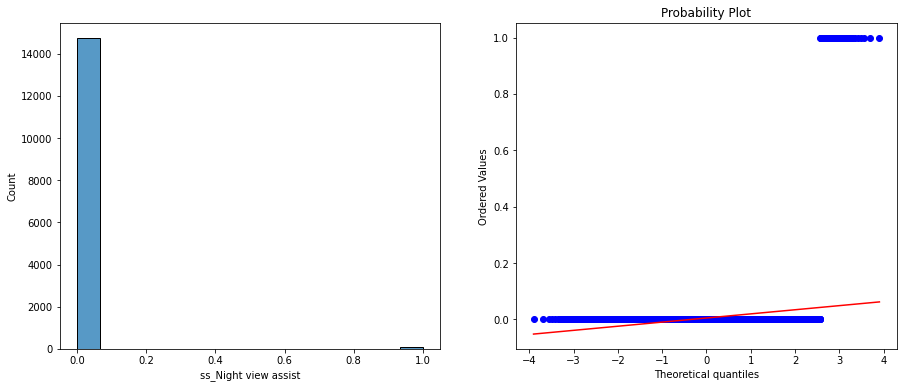

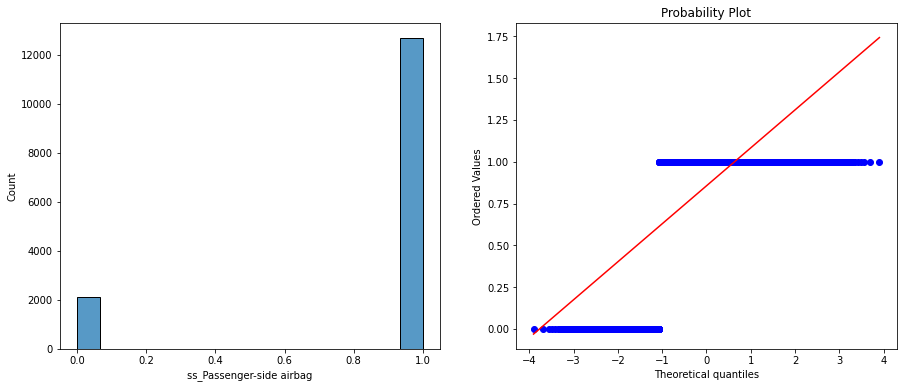

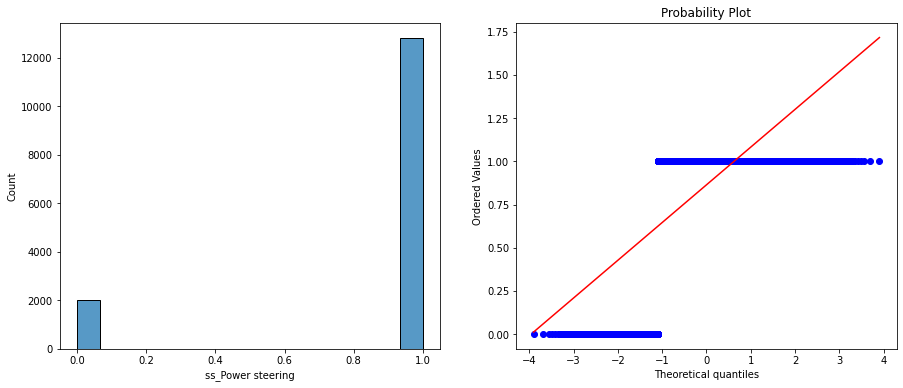

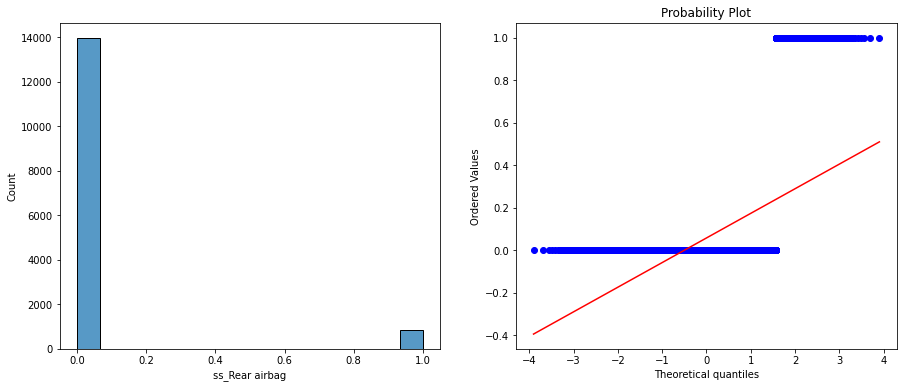

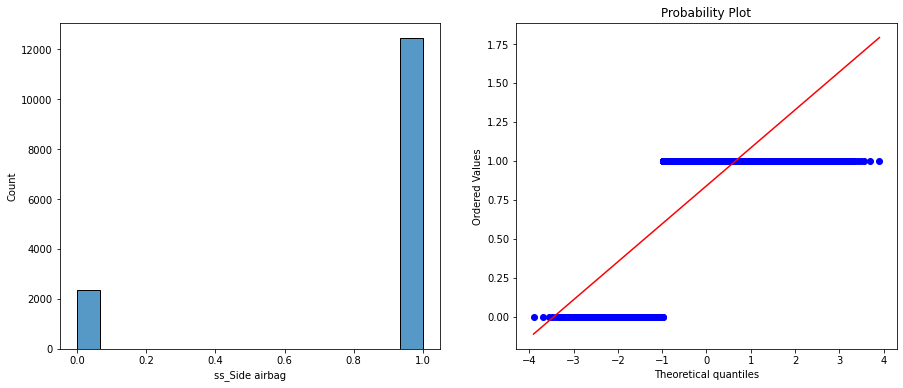

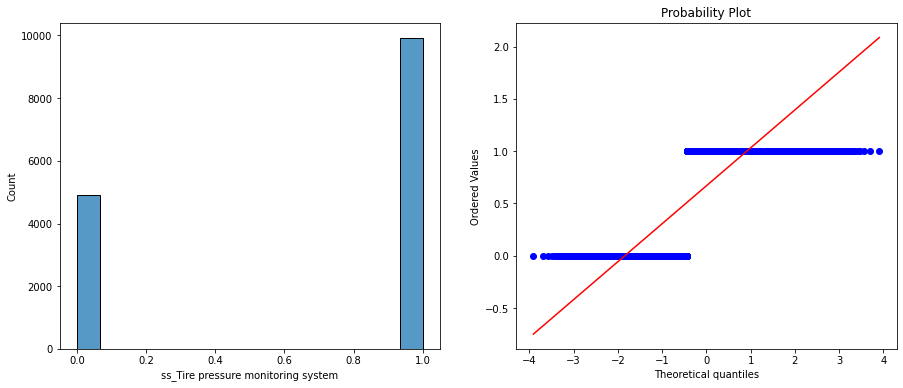

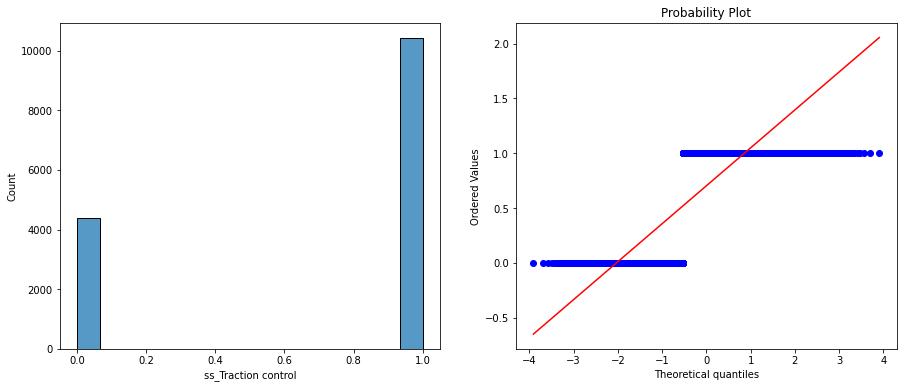

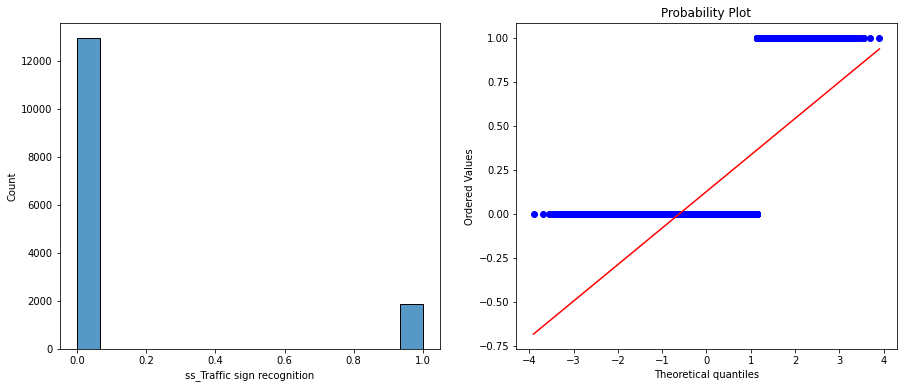

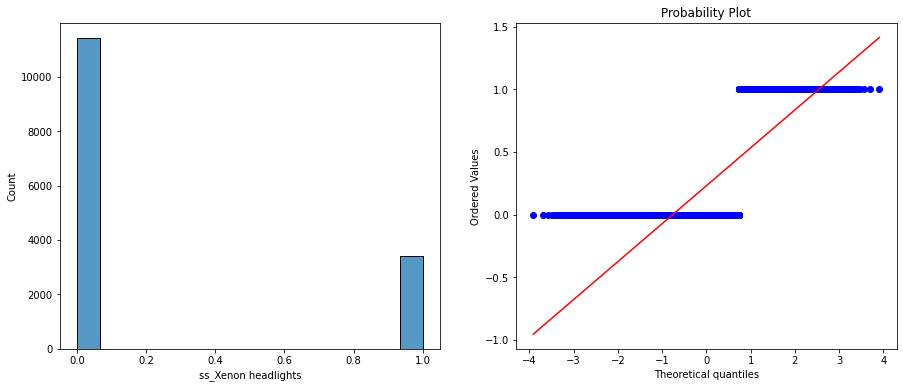

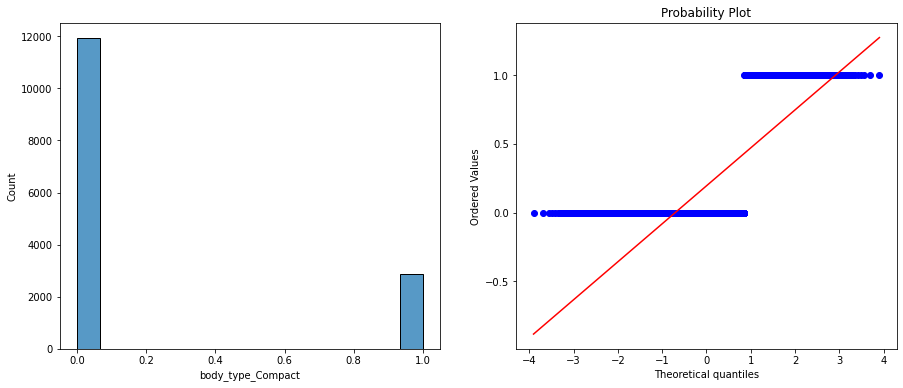

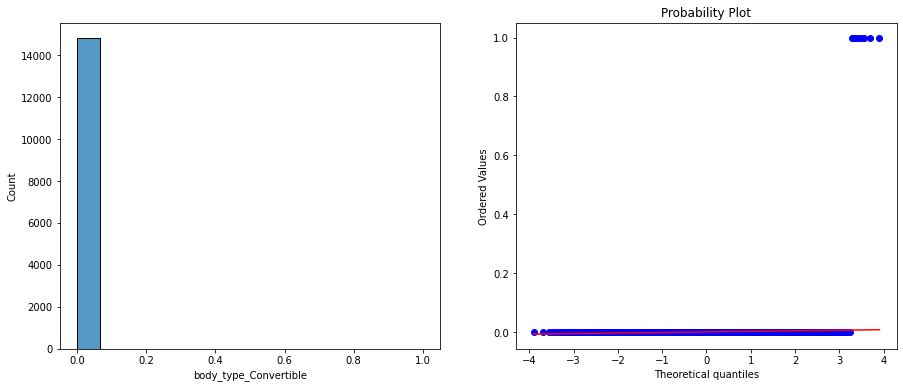

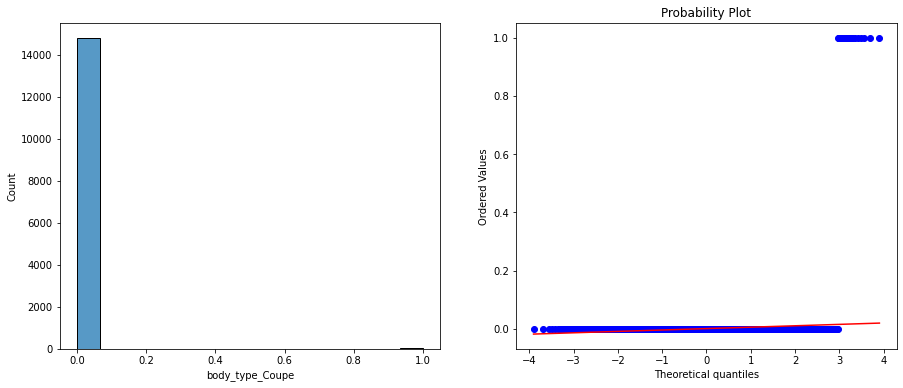

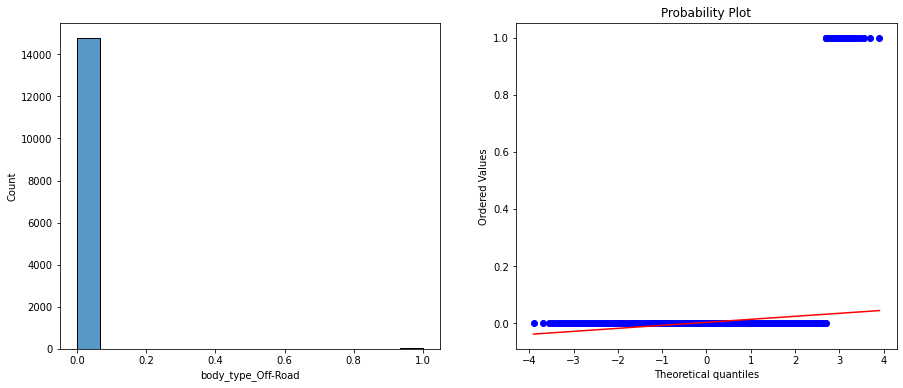

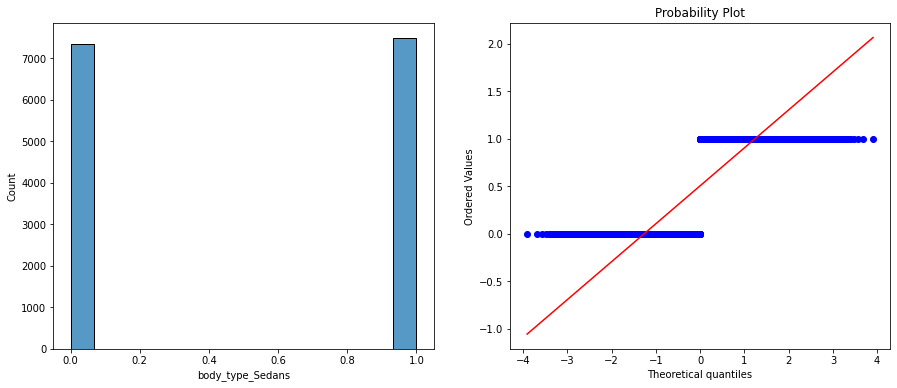

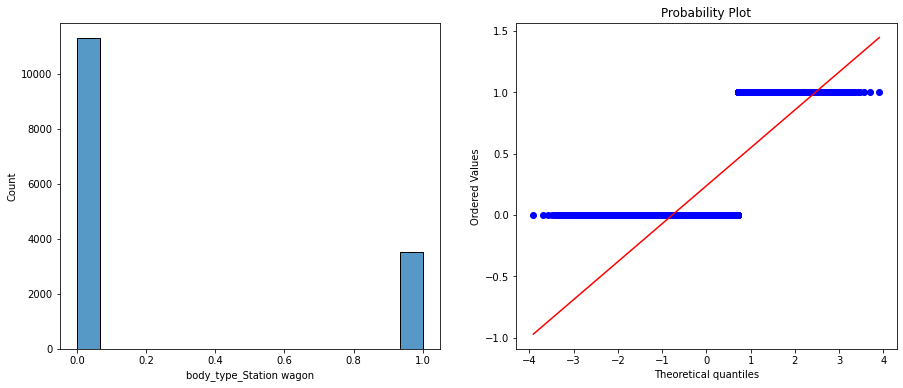

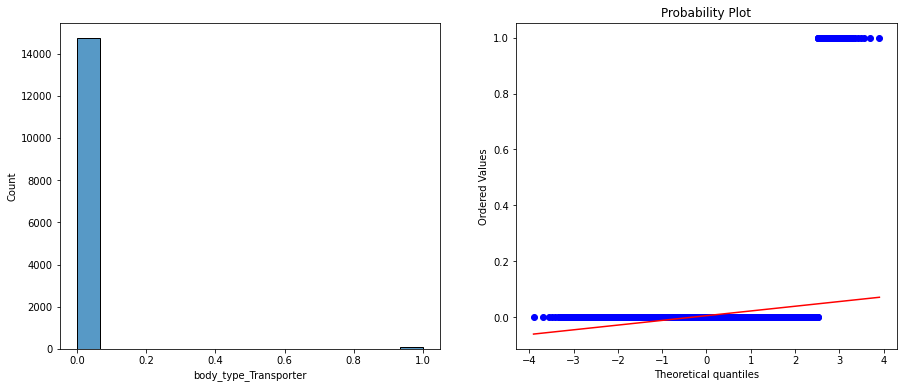

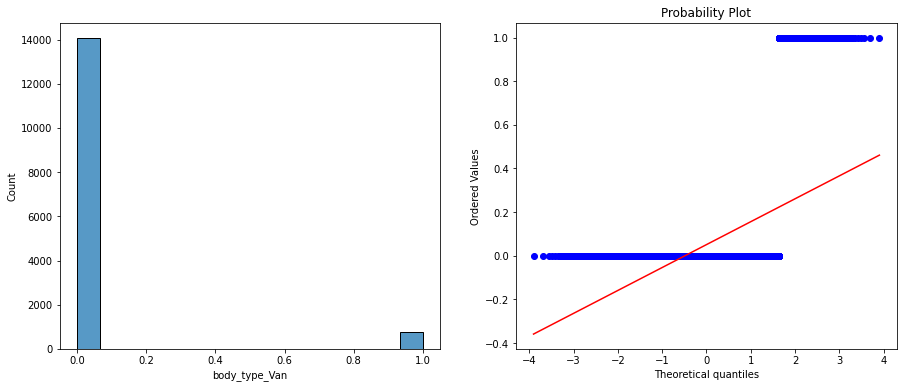

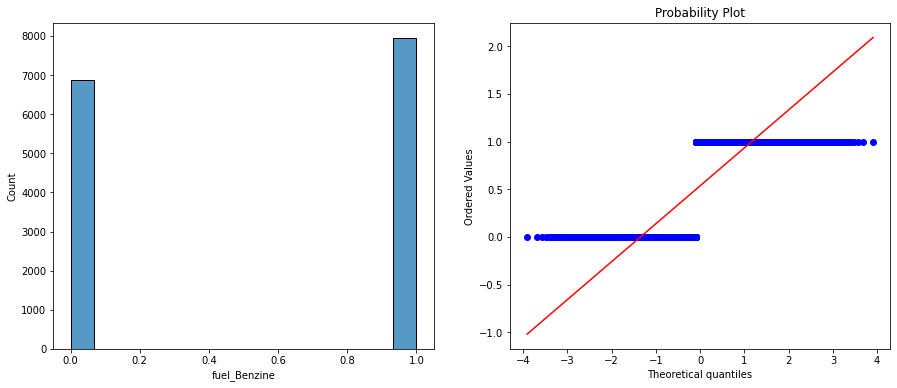

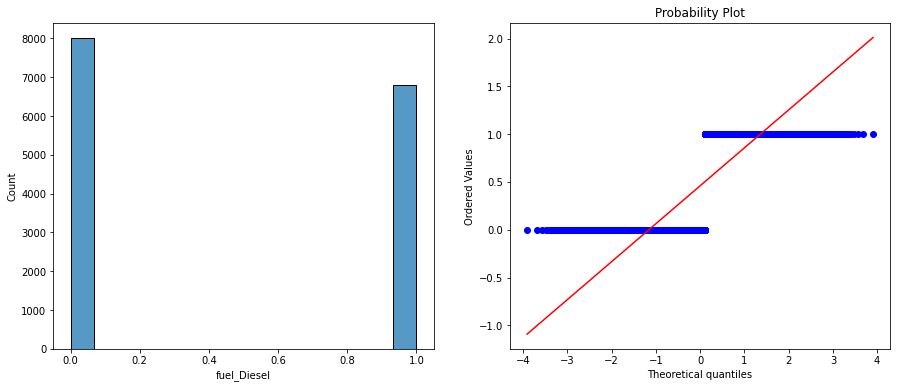

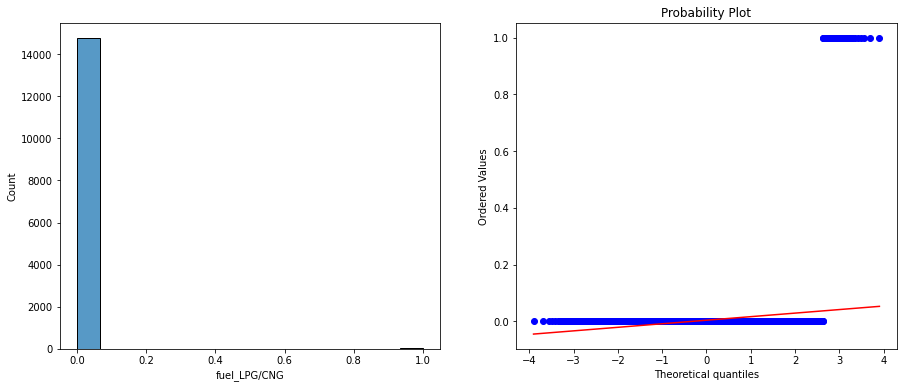

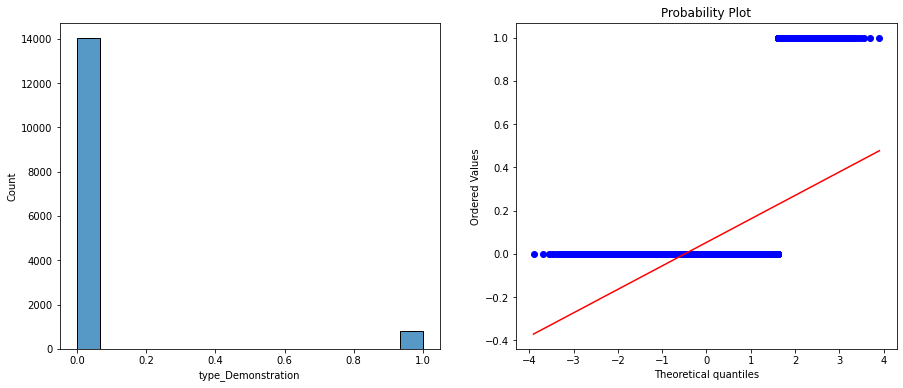

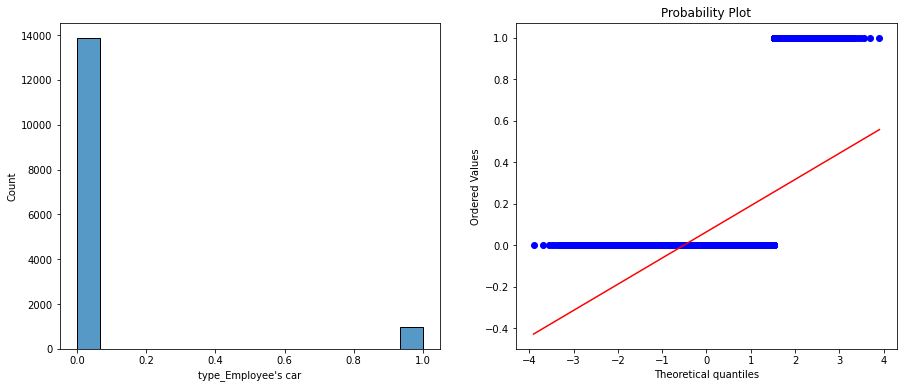

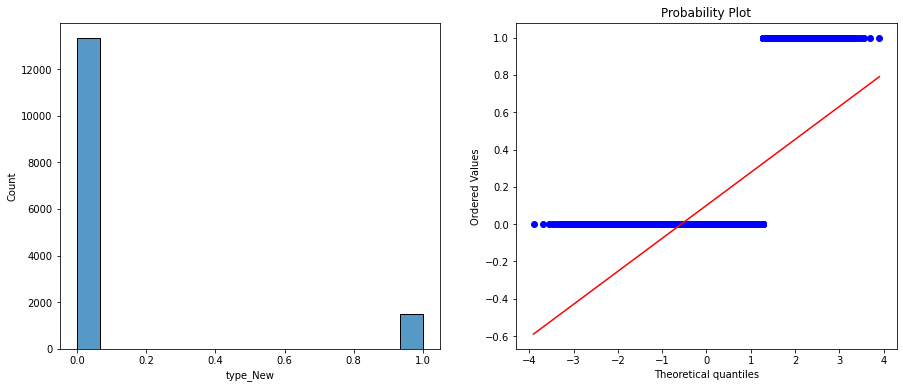

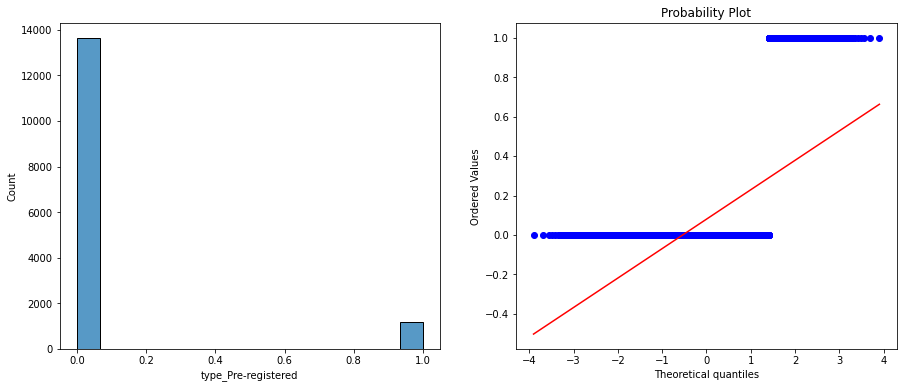

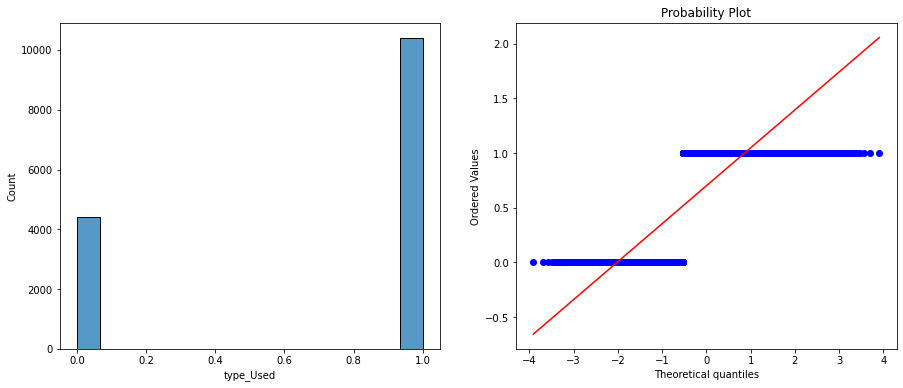

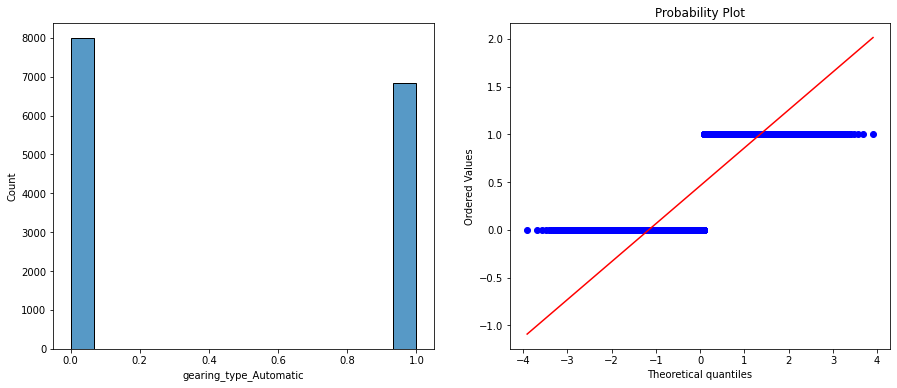

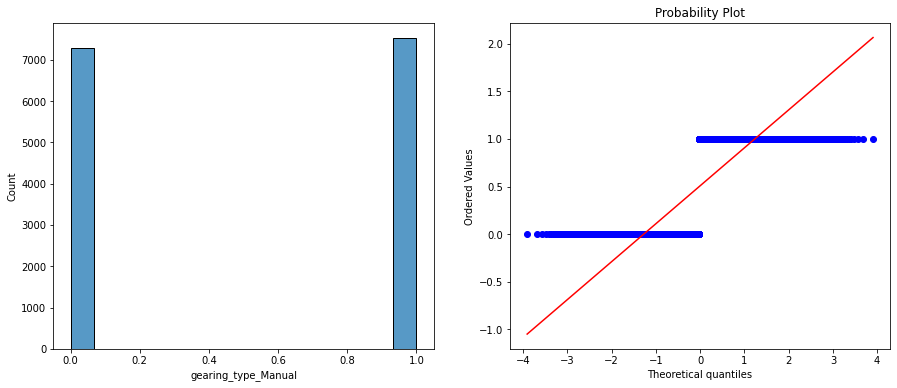

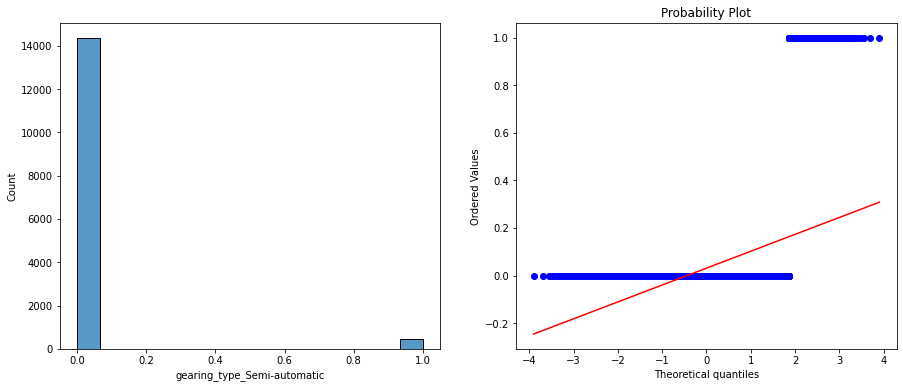

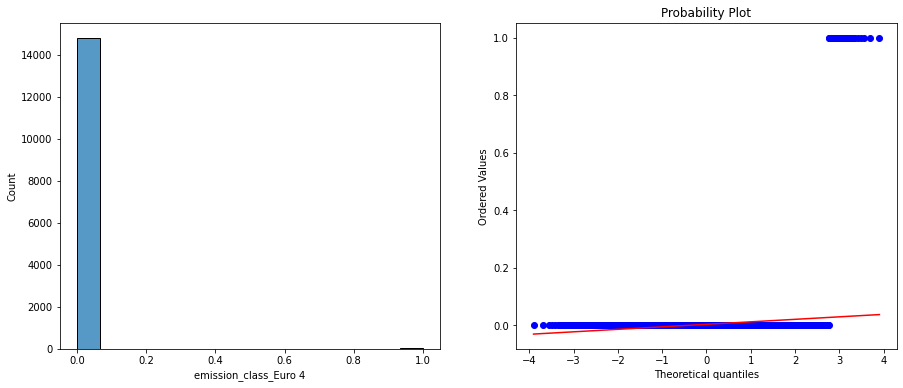

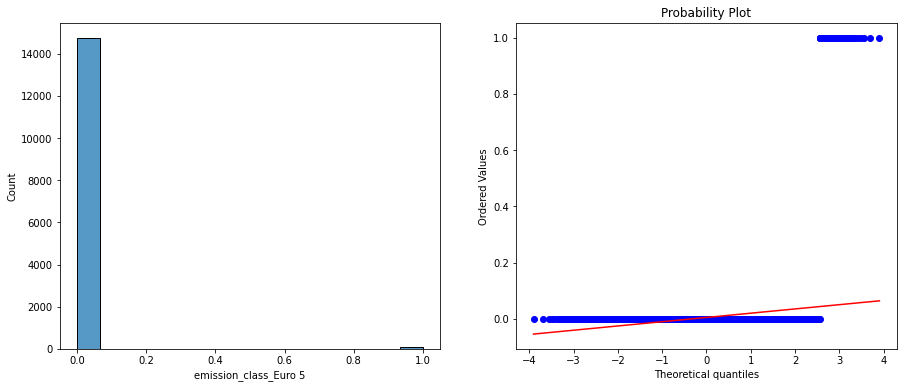

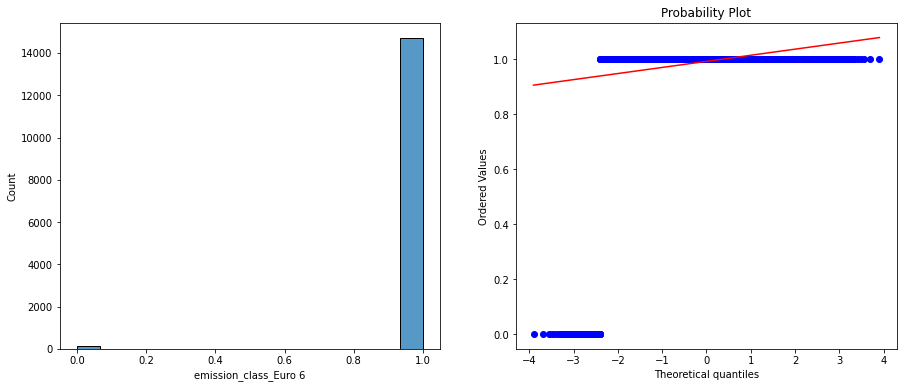

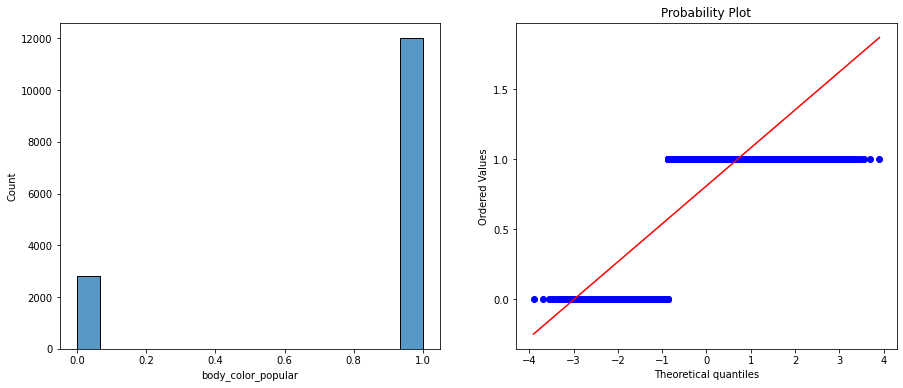

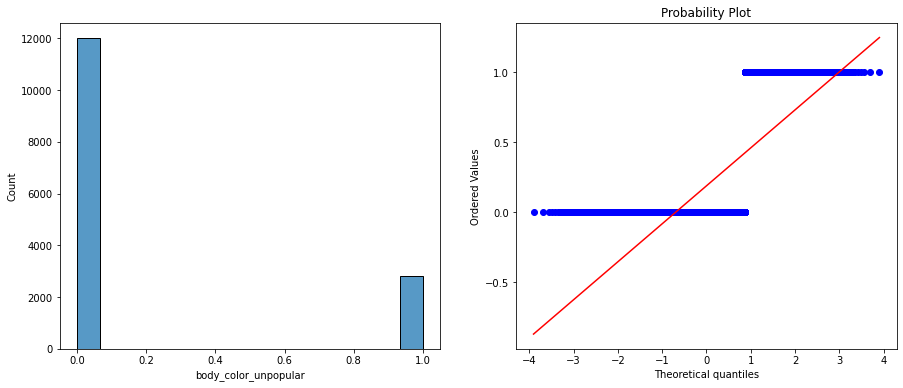

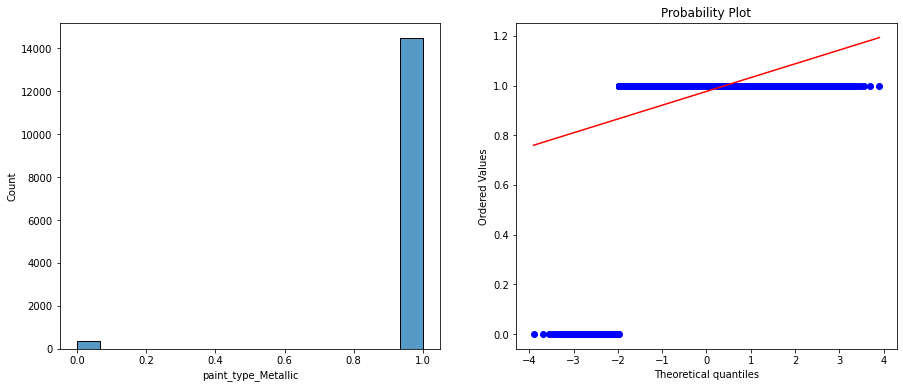

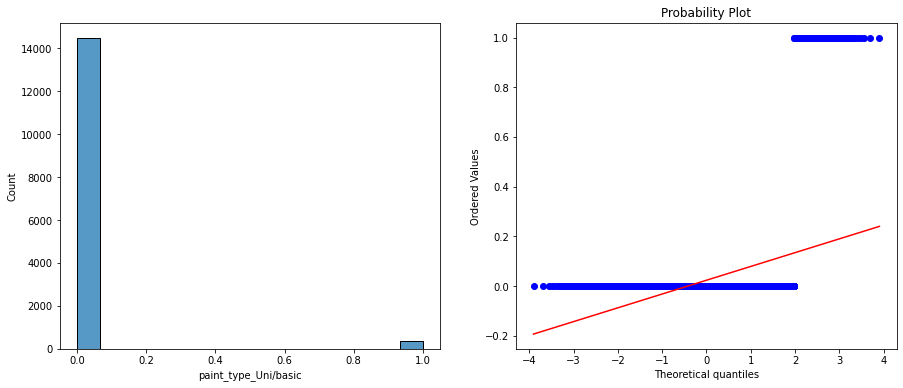

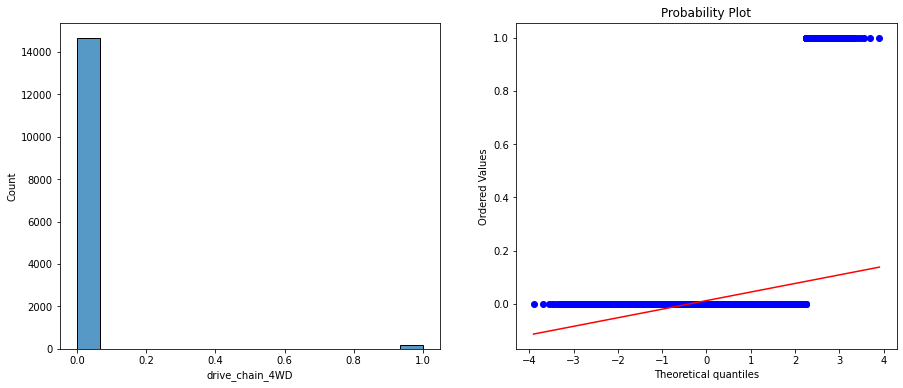

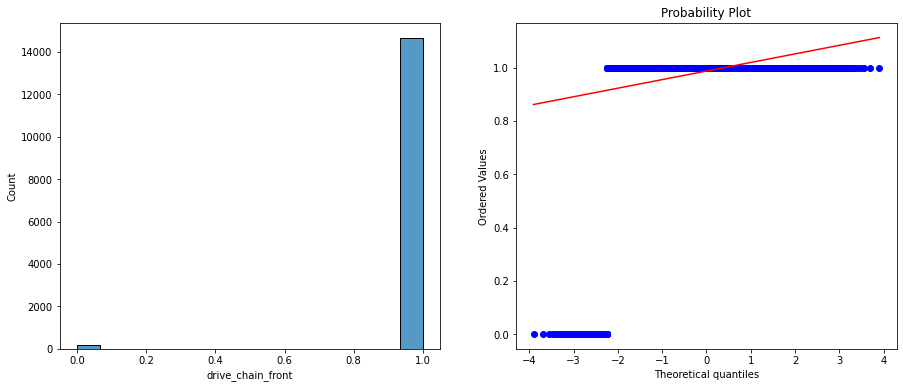

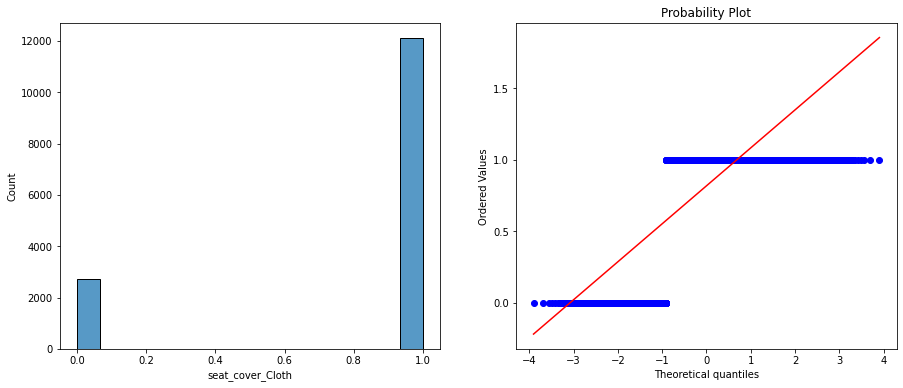

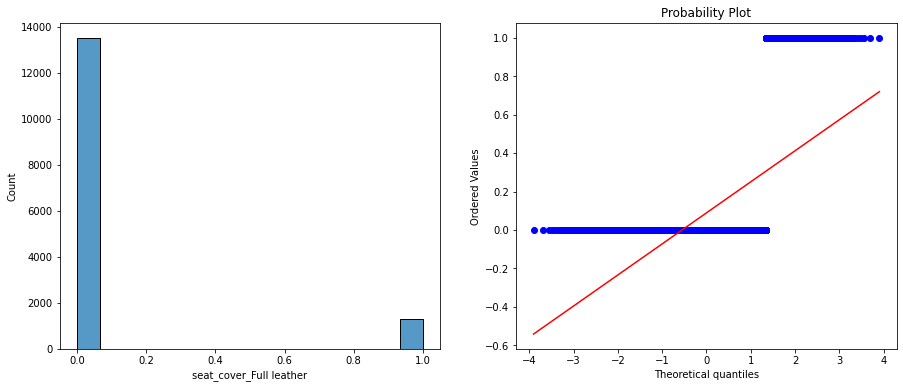

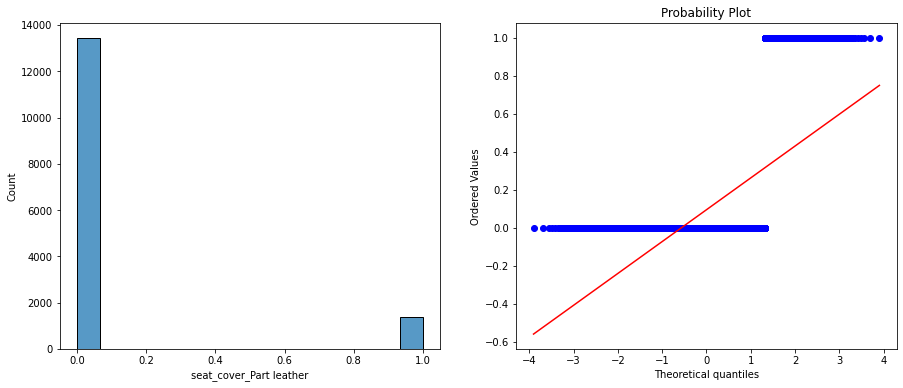

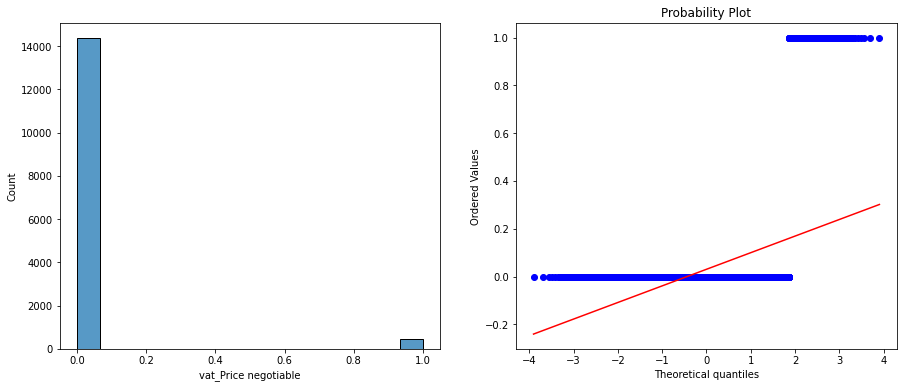

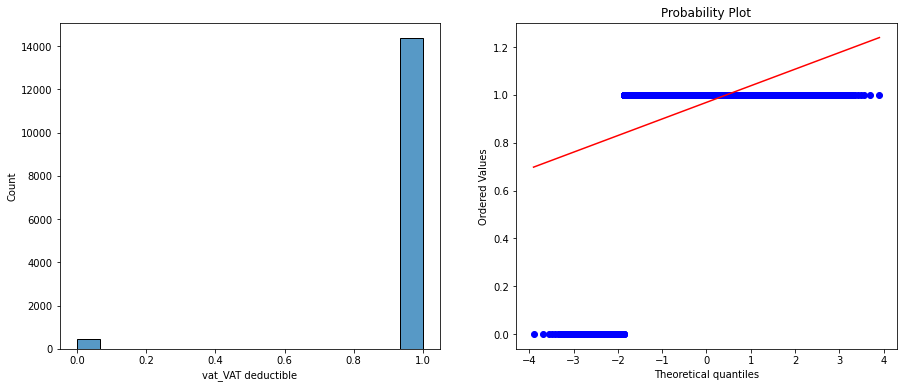

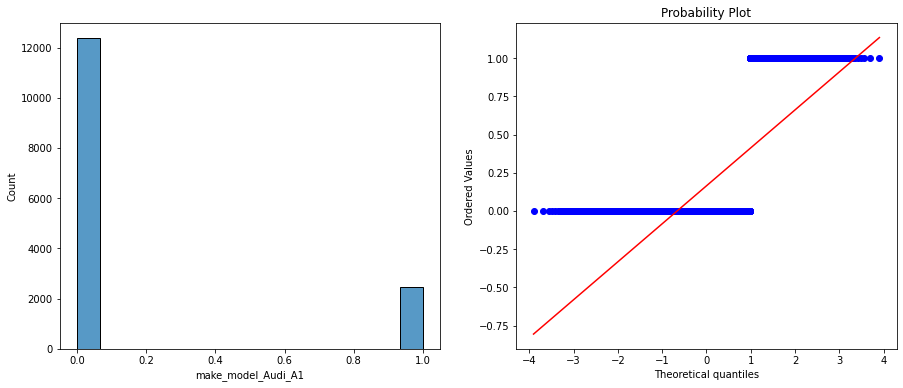

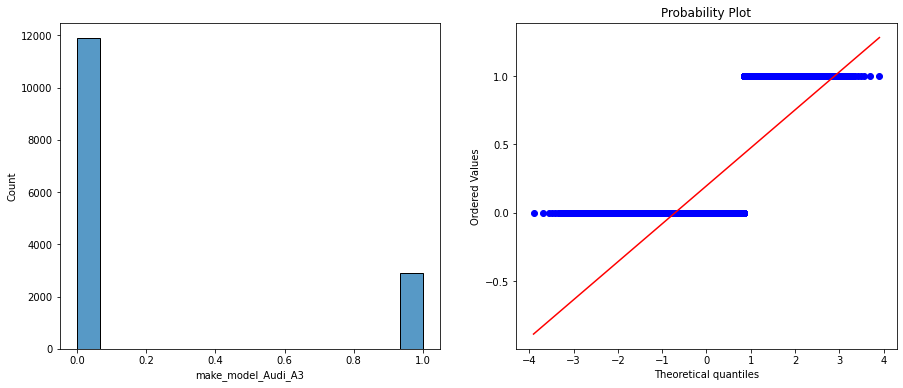

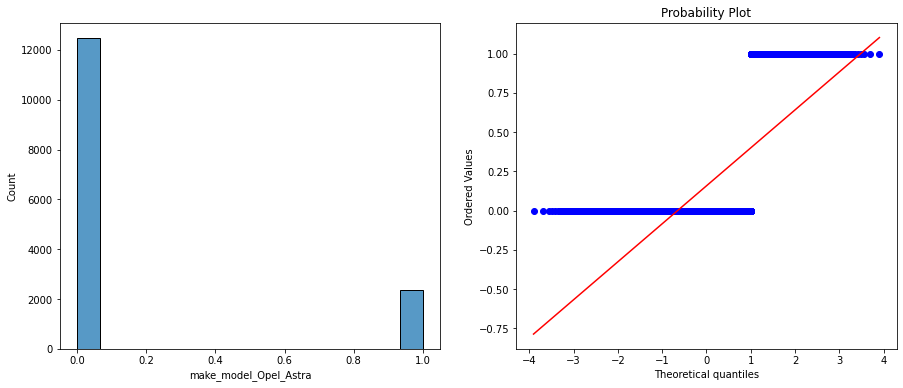

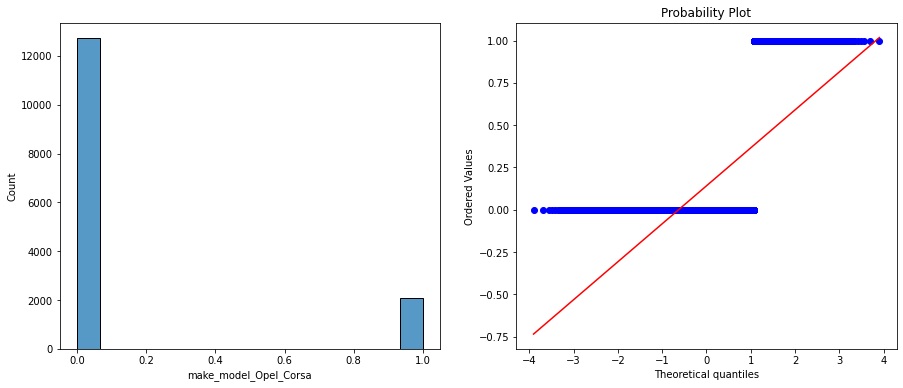

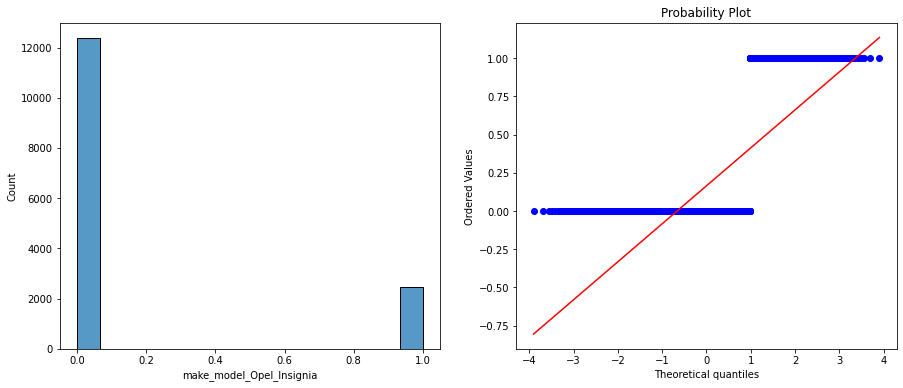

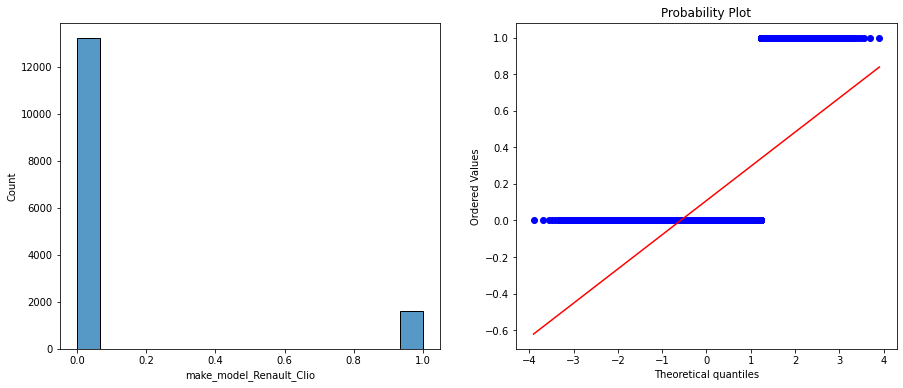

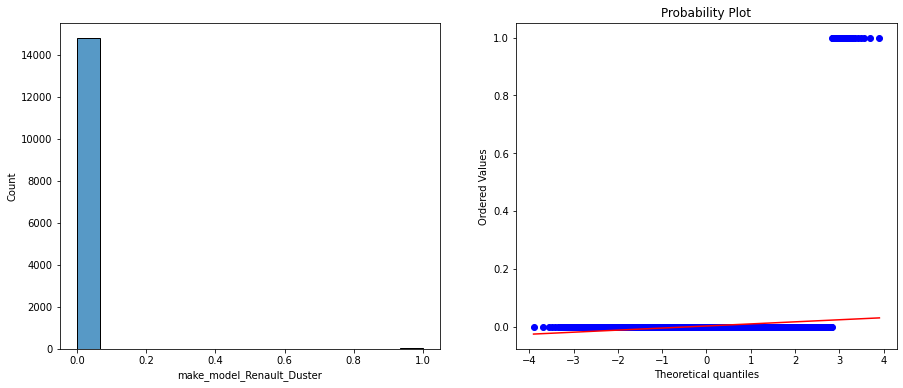

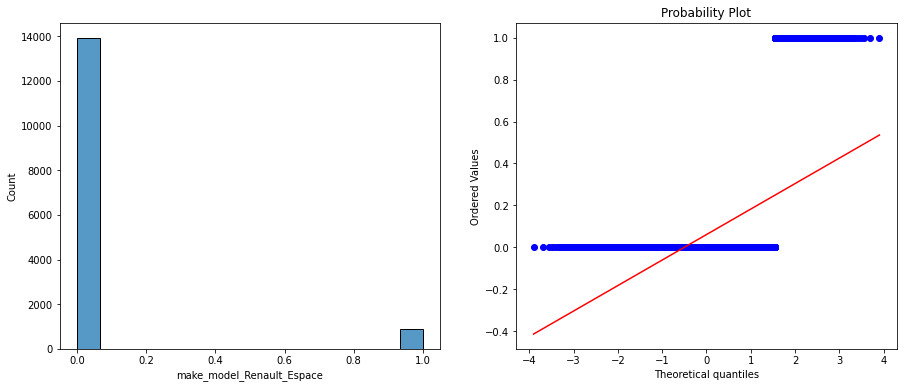

In [16]:
for col in df.drop("price", axis=1).columns:
    check_dist(df, col)

In [17]:
def color_red(val):
    
    if (val > 0.90 and val < 0.99) or (val < -0.90 and val > -0.99):
        color = 'red'
    else:
        color = 'black'
    return f'color: {color}'


In [18]:
pd.DataFrame(df).corr().style.applymap(color_red)

In [19]:
df.iloc[:,0:12].corr()

age  price     km  hp_kw  previous_owners  \
age                 1.000 -0.470  0.756 -0.081            0.346   
price              -0.470  1.000 -0.394  0.701           -0.180   
km                  0.756 -0.394  1.000  0.016            0.195   
hp_kw              -0.081  0.701  0.016  1.000           -0.045   
previous_owners     0.346 -0.180  0.195 -0.045            1.000   
displacement_in_cc  0.222  0.263  0.311  0.581            0.058   
cylinders           0.157  0.006  0.202  0.304            0.063   
weight              0.080  0.471  0.177  0.689            0.005   
nr_of_doors        -0.088  0.157 -0.005  0.125           -0.124   
nr_of_seats        -0.087  0.240 -0.012  0.283           -0.028   
gears              -0.069  0.554 -0.033  0.477           -0.021   
consumption_avg    -0.364  0.255 -0.333  0.355           -0.124   

                    displacement_in_cc  cylinders  weight  nr_of_doors  \
age                              0.222      0.157   0.080       -0.088   
price                            0.263      0.006   0.471        0.157   
km                               0.311      0.202   0.177       -0.005   
hp_kw                            0.581      0.304   0.689        0.125   
previous_owners                  0.058      0.063   0.005       -0.124   
displacement_in_cc               1.000      0.605   0.558        0.076   
cylinders                        0.605      1.000   0.345        0.048   
weight                           0.558      0.345   1.000        0.160   
nr_of_doors                      0.076      0.048   0.160        1.000   
nr_of_seats                      0.190      0.250   0.351        0.105   
gears                            0.349      0.104   0.352        0.115   
consumption_avg                  0.001      0.157   0.132       -0.072   

                    nr_of_seats  gears  consumption_avg  
age                      -0.087 -0.069           -0.364  
price                     0.240  0.554            0.255  
km                       -0.012 -0.033           -0.333  
hp_kw                     0.283  0.477            0.355  
previous_owners          -0.028 -0.021           -0.124  
displacement_in_cc        0.190  0.349            0.001  
cylinders                 0.250  0.104            0.157  
weight                    0.351  0.352            0.132  
nr_of_doors               0.105  0.115           -0.072  
nr_of_seats               1.000  0.108            0.216  
gears                     0.108  1.000            0.035  
consumption_avg           0.216  0.035            1.000

<AxesSubplot:>

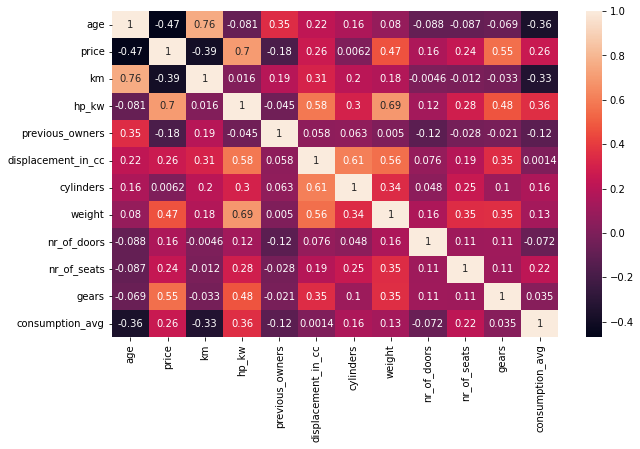

In [20]:
sns.heatmap(df.iloc[:,0:12].corr(), annot = True)

## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

In [21]:
df.reset_index(drop=True,inplace=True)

In [22]:
df

age  price        km   hp_kw  previous_owners  displacement_in_cc  \
0     4.000  15770 56013.000  66.000            2.000            1422.000   
1     3.000  14500 80000.000 141.000            1.000            1798.000   
2     4.000  14640 83450.000  85.000            1.000            1598.000   
3     4.000  14500 73000.000  66.000            1.000            1422.000   
4     4.000  16790 16200.000  66.000            1.000            1422.000   
...     ...    ...       ...     ...              ...                 ...   
14810 1.000  39950  1581.978 147.000            1.000            1997.000   
14811 1.000  39885  9900.000 165.000            1.000            1798.000   
14812 1.000  39875    15.000 146.000            1.000            1997.000   
14813 1.000  39700    10.000 147.000            1.000            1997.000   
14814 1.000  40999  1581.978 165.000            1.000            1798.000   

       cylinders   weight  nr_of_doors  nr_of_seats  gears  consumption_avg  \
0          3.000 1220.000        5.000        5.000  7.000            3.867   
1          4.000 1255.000        3.000        4.000  7.000            5.767   
2          3.000 1135.000        4.000        4.000  7.000            3.867   
3          3.000 1195.000        3.000        4.000  6.000            3.867   
4          3.000 1135.000        5.000        5.000  7.000            4.133   
...          ...      ...          ...          ...    ...              ...   
14810      4.000 1758.000        5.000        5.000  6.000            5.400   
14811      4.000 1708.000        5.000        5.000  7.000            6.633   
14812      4.000 1685.000        5.000        7.000  6.000            5.400   
14813      4.000 1758.000        5.000        7.000  6.000            5.400   
14814      4.000 1685.000        5.000        5.000  7.000            7.067   

       cc_Air conditioning  cc_Air suspension  cc_Armrest  \
0                        1                  0           1   
1                        1                  0           0   
2                        1                  0           0   
3                        0                  1           1   
4                        1                  0           1   
...                    ...                ...         ...   
14810                    1                  0           0   
14811                    1                  0           0   
14812                    1                  0           1   
14813                    1                  0           0   
14814                    1                  0           0   

       cc_Automatic climate control  cc_Auxiliary heating  cc_Cruise control  \
0                                 1                     0                  1   
1                                 1                     0                  0   
2                                 0                     0                  1   
3                                 0                     1                  0   
4                                 1                     0                  0   
...                             ...                   ...                ...   
14810                             1                     0                  1   
14811                             1                     0                  1   
14812                             1                     0                  1   
14813                             1                     0                  1   
14814                             1                     0                  1   

       cc_Electric Starter  cc_Electric tailgate  cc_Electrical side mirrors  \
0                        0                     0                           1   
1                        0                     0                           0   
2                        0                     0                           1   
3                        0                     0                           1   
4                        0              

In [23]:
X = df.drop(columns ="price") 
y = df["price"]

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (11852, 146)
Train target shape   :  (11852,)
Test features shape  :  (2963, 146)
Test target shape    :  (2963,)


In [27]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = MinMaxScaler()

In [28]:
scaler.fit(X_train)

MinMaxScaler()

In [29]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[0.66666667, 0.25323028, 0.16141732, ..., 0.        , 0.        ,
        0.        ],
       [0.33333333, 0.09438486, 0.31889764, ..., 0.        , 0.        ,
        0.        ],
       [0.33333333, 0.04737539, 0.2480315 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.13690852, 0.28346457, ..., 0.        , 0.        ,
        0.        ],
       [0.66666667, 0.05213565, 0.1023622 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.01419558, 0.27559055, ..., 0.        , 0.        ,
        0.        ]])

In [30]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[1.        , 0.22082019, 0.16141732, ..., 0.        , 0.        ,
        0.        ],
       [0.33333333, 0.09085174, 0.1023622 , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.31388013, 0.27559055, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.33333333, 0.08106625, 0.14566929, ..., 0.        , 0.        ,
        0.        ],
       [0.33333333, 0.06360252, 0.33464567, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.0214511 , 0.33464567, ..., 0.        , 0.        ,
        0.        ]])

In [31]:
pd.DataFrame(X_train_scaled).agg(["mean", "std"]).round()

0     1     2     3     4     5     6     7     8     9     10    11   \
mean 0.000 0.000 0.000 0.000 0.000 0.000 1.000 1.000 1.000 0.000 0.000 1.000   
std  0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000   

       12    13    14    15    16    17    18    19    20    21    22    23   \
mean 0.000 0.000 1.000 0.000 1.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000   
std  0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000   

       24    25    26    27    28    29    30    31    32    33    34    35   \
mean 0.000 0.000 0.000 1.000 0.000 0.000 0.000 1.000 1.000 0.000 1.000 0.000   
std  0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000   

       36    37    38    39    40    41    42    43    44    45    46    47   \
mean 0.000 0.000 1.000 1.000 1.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000   
std  0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000   

       48    49    50    51    52    53    54    55    56    57    58    59   \
mean 0.000 1.000 0.000 0.000 1.000 0.000 1.000 1.000 0.000 0.000 1.000 1.000   
std  0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000   

       60    61    62    63    64    65    66   ...   79    80    81    82   \
mean 0.000 0.000 0.000 0.000 0.000 0.000 0.000  ... 0.000 0.000 1.000 0.000   
std  0.000 0.000 0.000 0.000 0.000 0.000 0.000  ... 0.000 0.000 0.000 0.000   

       83    84    85    86    87    88    89    90    91    92    93    94   \
mean 1.000 0.000 1.000 1.000 0.000 0.000 1.000 0.000 1.000 1.000 0.000 0.000   
std  0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000   

       95    96    97    98    99    100   101   102   103   104   105   106  \
mean 0.000 0.000 1.000 1.000 0.000 1.000 1.000 1.000 0.000 0.000 0.000 0.000   
std  0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000   

       107   108   109   110   111   112   113   114   115   116   117   118  \
mean 0.000 0.000 1.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000   
std  0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000   

       119   120   121   122   123   124   125   126   127   128   129   130  \
mean 0.000 1.000 0.000 1.000 0.000 0.000 0.000 1.000 1.000 0.000 1.000 0.000   
std  0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000   

       131   132   133   134   135   136   137   138   139   140   141   142  \
mean 0.000 1.000 1.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000   
std  0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000   

       143   144   145  
mean 0.000 0.000 0.000  
std  0.000 0.000 0.000  

[2 rows x 146 columns]

In [32]:
pd.DataFrame(X_test_scaled).agg(["mean", "std"]).round()

0     1     2     3     4     5     6     7     8     9     10    11   \
mean 0.000 0.000 0.000 0.000 0.000 0.000 1.000 1.000 1.000 0.000 0.000 1.000   
std  0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000   

       12    13    14    15    16    17    18    19    20    21    22    23   \
mean 0.000 0.000 1.000 0.000 1.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000   
std  0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000   

       24    25    26    27    28    29    30    31    32    33    34    35   \
mean 0.000 0.000 0.000 1.000 1.000 0.000 0.000 1.000 1.000 0.000 1.000 0.000   
std  0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000   

       36    37    38    39    40    41    42    43    44    45    46    47   \
mean 0.000 0.000 1.000 1.000 1.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000   
std  0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000   

       48    49    50    51    52    53    54    55    56    57    58    59   \
mean 0.000 1.000 0.000 0.000 1.000 0.000 1.000 1.000 0.000 0.000 1.000 1.000   
std  0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000   

       60    61    62    63    64    65    66   ...   79    80    81    82   \
mean 0.000 0.000 0.000 0.000 0.000 0.000 0.000  ... 0.000 0.000 1.000 0.000   
std  0.000 0.000 0.000 0.000 0.000 0.000 0.000  ... 0.000 0.000 0.000 0.000   

       83    84    85    86    87    88    89    90    91    92    93    94   \
mean 1.000 0.000 1.000 1.000 0.000 0.000 1.000 0.000 1.000 1.000 0.000 0.000   
std  0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000   

       95    96    97    98    99    100   101   102   103   104   105   106  \
mean 0.000 0.000 1.000 1.000 0.000 1.000 1.000 1.000 0.000 0.000 0.000 0.000   
std  0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000   

       107   108   109   110   111   112   113   114   115   116   117   118  \
mean 0.000 0.000 1.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000   
std  0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000   

       119   120   121   122   123   124   125   126   127   128   129   130  \
mean 0.000 1.000 0.000 1.000 0.000 0.000 0.000 1.000 1.000 0.000 1.000 0.000   
std  0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000   

       131   132   133   134   135   136   137   138   139   140   141   142  \
mean 0.000 1.000 1.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000   
std  0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000   

       143   144   145  
mean 0.000 0.000 0.000  
std  0.000 0.000 0.000  

[2 rows x 146 columns]

In [33]:
print("X_train_range  :", np.min(X_train_scaled), "-", np.max(X_train_scaled))
print("X_test_range   :", np.min(X_test_scaled), "-", np.max(X_test_scaled))

X_train_range  : 0.0 - 1.0
X_test_range   : -0.2 - 1.0


## 3. Implement Linear Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [34]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [35]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [36]:
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, model_name):
    
    scores = {model_name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    model_name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [38]:
ls =train_val(y_train, y_train_pred, y_test, y_pred, "linear")
ls

linear_train  linear_test
R2           0.894        0.890
mae       1675.149     1679.543
mse    5740519.923  6403701.411
rmse      2395.938     2530.554

### Cross Validation

In [39]:
from sklearn.model_selection import cross_validate, cross_val_score

In [40]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 10)

In [41]:
pd.DataFrame(scores, index = range(1,11))

fit_time  score_time                  test_r2  \
1      0.056       0.000                    0.891   
2      0.056       0.000                    0.891   
3      0.049       0.008                    0.889   
4      0.051       0.006                    0.880   
5      0.047       0.000                    0.889   
6      0.053       0.001                    0.887   
7      0.040       0.000                    0.888   
8      0.063       0.000                    0.896   
9      0.061       0.000                    0.901   
10     0.056       0.000 -5442948494937056256.000   

    test_neg_mean_absolute_error      test_neg_mean_squared_error  \
1                      -1744.445                     -6614423.108   
2                      -1687.354                     -6160044.994   
3                      -1682.787                     -5582356.279   
4                      -1782.235                     -7134830.948   
5                      -1617.592                     -5457829.658   
6                      -1705.226                     -5624342.036   
7                      -1683.445                     -5583146.133   
8                      -1712.297                     -5908678.451   
9                      -1671.316                     -5427921.052   
10             -502813782692.048 -299593712518843056120659968.000   

    test_neg_root_mean_squared_error  
1                          -2571.852  
2                          -2481.944  
3                          -2362.701  
4                          -2671.110  
5                          -2336.200  
6                          -2371.570  
7                          -2362.868  
8                          -2430.777  
9                          -2329.790  
10               -17308775592711.434

In [42]:
scores = pd.DataFrame(scores, index=range(1,11))
scores.iloc[:, 2:].mean()

test_r2                                    -544294849493705600.000
test_neg_mean_absolute_error                      -50281379797.875
test_neg_mean_squared_error        -29959371251884306471059456.000
test_neg_root_mean_squared_error                -1730877561463.025
dtype: float64

In [43]:
train_val(y_train, y_train_pred, y_test, y_pred, "linear")

linear_train  linear_test
R2           0.894        0.890
mae       1675.149     1679.543
mse    5740519.923  6403701.411
rmse      2395.938     2530.554

In [44]:
2530.564/df.price.mean()

0.13971050996033346

In [45]:
lm.coef_

array([-4.65688323e+03, -1.21340611e+04,  2.52214080e+04,  7.56521234e+02,
       -3.92477660e+03,  3.69685053e+03, -2.56449760e+03,  1.63137893e+03,
       -3.35103801e+02,  1.82341864e+03, -1.60780285e+03,  6.09859698e+02,
       -4.07345236e+02, -7.73792241e+01,  1.93303389e+02, -2.31746180e+02,
        1.72066355e+02, -1.23208949e+03,  7.14118247e+01,  1.10805898e+02,
        9.55169942e+01,  4.78108179e+02,  1.86465826e+03,  4.14862826e+02,
        1.82325974e+02,  3.14487703e+02, -8.16853549e+02,  1.64281754e+02,
        1.00479496e+02, -2.34435712e+02,  5.36058300e+02,  2.85780180e+02,
        3.22085099e+02, -2.64377106e+02,  4.47340868e+02,  2.09418171e+01,
        7.20375448e+02,  1.94416401e+02, -2.59595702e+02,  9.91450398e+01,
       -1.66684685e+02, -5.74215541e+01,  6.96075124e+02, -2.14960235e+02,
       -5.79901602e+01,  6.39654066e+02,  4.39121473e+01, -6.86641423e+02,
       -9.47979824e+02, -6.19066851e+02,  1.66913382e+01,  7.47338680e+02,
        6.78082083e+01, -

In [46]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"])
lm_df

lm_coef
0             -4656.883
1            -12134.061
2             25221.408
3               756.521
4             -3924.777
..                  ...
141 511569197541521.812
142 511569197545936.688
143 511569197541275.688
144 511569197538123.062
145 511569197550412.875

[146 rows x 1 columns]

In [47]:
residuals = y_test-y_pred

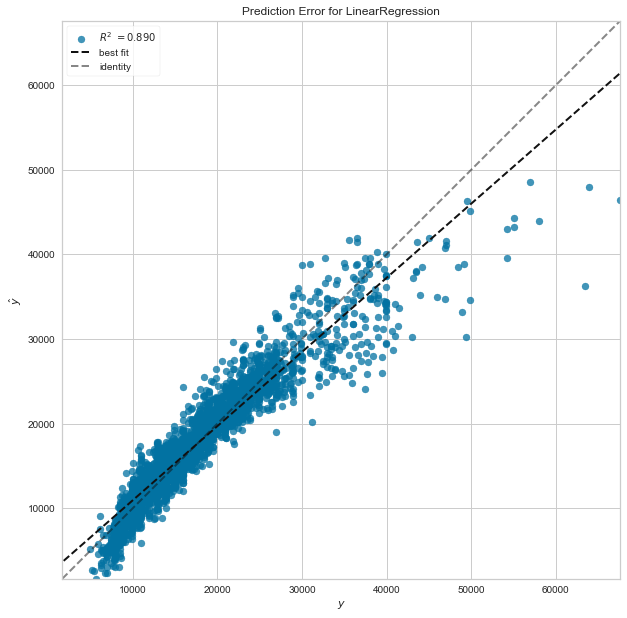

In [48]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

visualizer = RadViz(size=(720, 3000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

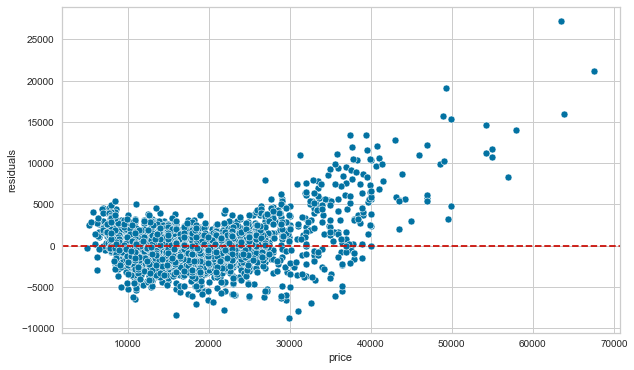

In [49]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = y_test, y = residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show()

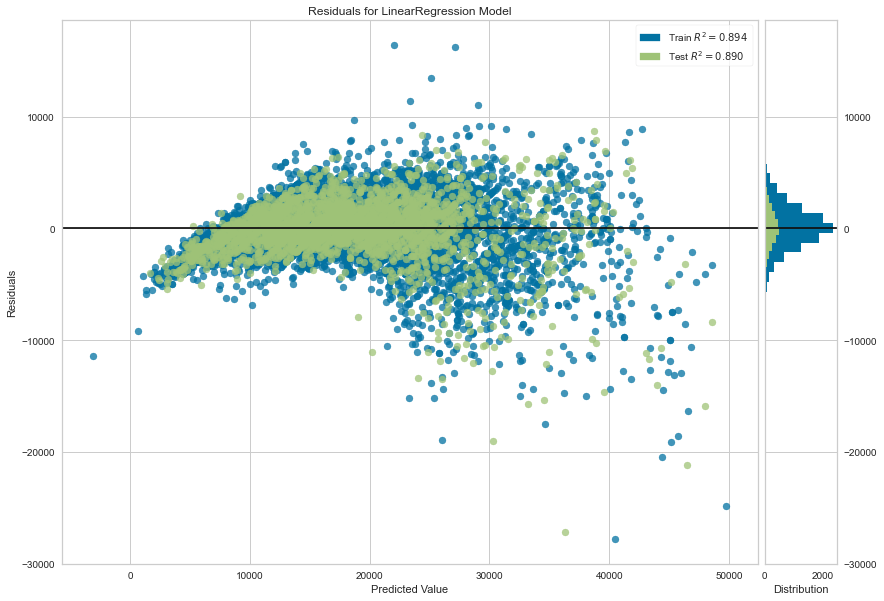

In [50]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 720))
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

<AxesSubplot:xlabel='price', ylabel='Density'>

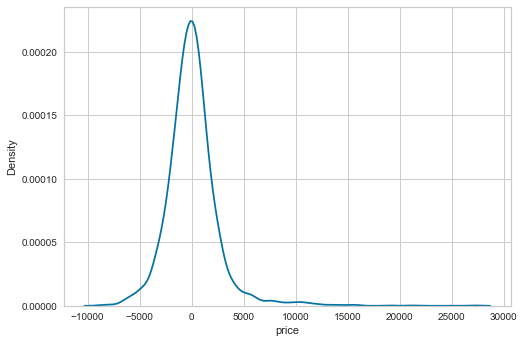

In [51]:
sns.kdeplot(residuals)

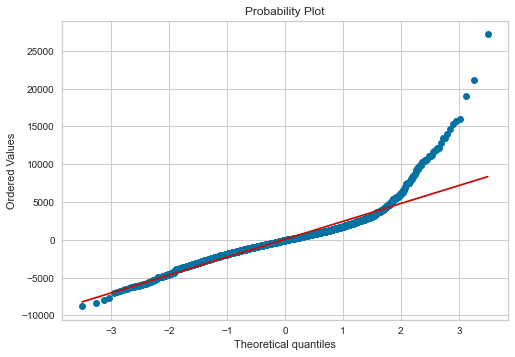

In [52]:
stats.probplot(residuals, dist ="norm", plot =plt);

In [53]:
from scipy.stats import skew
skew(residuals)

1.8947723148356683

In [54]:
for model in df2.make_model.unique():
    
    car_prices = df2[df2["make_model"]== model]["price"]
    
    Q1 = car_prices.quantile(0.25)
    Q3 = car_prices.quantile(0.75)
    
    IQR = Q3-Q1
    
    lower_lim = Q1-1.5*IQR
    upper_lim = Q3+1.5*IQR

    drop_index = df2[df2["make_model"]== model][(car_prices < lower_lim) | (car_prices > upper_lim)].index
    df2.drop(index = drop_index, inplace=True)
df2

age body_type  price        km   hp_kw     fuel            type  \
0     4.000    Sedans  15770 56013.000  66.000   Diesel            Used   
1     3.000    Sedans  14500 80000.000 141.000  Benzine            Used   
2     4.000    Sedans  14640 83450.000  85.000   Diesel            Used   
3     4.000    Sedans  14500 73000.000  66.000   Diesel            Used   
4     4.000    Sedans  16790 16200.000  66.000   Diesel            Used   
...     ...       ...    ...       ...     ...      ...             ...   
14810 1.000       Van  39950  1581.978 147.000   Diesel             New   
14811 1.000       Van  39885  9900.000 165.000  Benzine            Used   
14812 1.000       Van  39875    15.000 146.000   Diesel  Pre-registered   
14813 1.000       Van  39700    10.000 147.000   Diesel  Pre-registered   
14814 1.000       Van  40999  1581.978 165.000  Benzine   Demonstration   

       previous_owners gearing_type  displacement_in_cc  cylinders   weight  \
0                2.000    Automatic            1422.000      3.000 1220.000   
1                1.000    Automatic            1798.000      4.000 1255.000   
2                1.000    Automatic            1598.000      3.000 1135.000   
3                1.000    Automatic            1422.000      3.000 1195.000   
4                1.000    Automatic            1422.000      3.000 1135.000   
...                ...          ...                 ...        ...      ...   
14810            1.000    Automatic            1997.000      4.000 1758.000   
14811            1.000    Automatic            1798.000      4.000 1708.000   
14812            1.000    Automatic            1997.000      4.000 1685.000   
14813            1.000    Automatic            1997.000      4.000 1758.000   
14814            1.000    Automatic            1798.000      4.000 1685.000   

      emission_class body_color paint_type  nr_of_doors  nr_of_seats  \
0             Euro 6    popular   Metallic        5.000        5.000   
1             Euro 6  unpopular   Metallic        3.000        4.000   
2             Euro 6    popular   Metallic        4.000        4.000   
3             Euro 6  unpopular   Metallic        3.000        4.000   
4             Euro 6    popular   Metallic        5.000        5.000   
...              ...        ...        ...          ...          ...   
14810         Euro 6    popular   Metallic        5.000        5.000   
14811         Euro 6    popular   Metallic        5.000        5.000   
14812         Euro 6    popular   Metallic        5.000        7.000   
14813         Euro 6    popular   Metallic        5.000        7.000   
14814         Euro 6    popular   Metallic        5.000        5.000   

      drive_chain                              comfort_&_convenience  \
0           front  Air conditioning,Armrest,Automatic climate con...   
1           front  Air conditioning,Automatic climate control,Hil...   
2           front  Air conditioning,Cruise control,Electrical sid...   
3           front  Air suspension,Armrest,Auxiliary heating,Elect...   
4           front  Air conditioning,Armrest,Automatic climate con...   
...           ...                                                ...   
14810       front  Air conditioning,Automatic climate control,Cru...   
14811       front  Air conditioning,Automatic climate control,Cru...   
14812       front  Air conditioning,Armrest,Automatic climate con...   
14813       front  Air conditioning,Automatic climate control,Cru...   
14814         4WD  Air conditioning,Automatic climate control,Cru...   

                                   entertainment_&_media  \
0      Bluetooth,Hands-free equipment,On-board comput...   
1      Bluetooth,Hands-free equipment,On-board comput...   
2                                  MP3,On-board computer   
3      Bluetooth,CD player,Hands-free equipment,MP3,O...   
4      Bluetooth,CD player,Hands-free equipment,MP3,O...   
...                                                  ...   
14810  B

In [55]:
df2.reset_index(drop=True,inplace=True)

In [56]:
df2

age body_type  price        km   hp_kw     fuel            type  \
0     4.000    Sedans  15770 56013.000  66.000   Diesel            Used   
1     3.000    Sedans  14500 80000.000 141.000  Benzine            Used   
2     4.000    Sedans  14640 83450.000  85.000   Diesel            Used   
3     4.000    Sedans  14500 73000.000  66.000   Diesel            Used   
4     4.000    Sedans  16790 16200.000  66.000   Diesel            Used   
...     ...       ...    ...       ...     ...      ...             ...   
14408 1.000       Van  39950  1581.978 147.000   Diesel             New   
14409 1.000       Van  39885  9900.000 165.000  Benzine            Used   
14410 1.000       Van  39875    15.000 146.000   Diesel  Pre-registered   
14411 1.000       Van  39700    10.000 147.000   Diesel  Pre-registered   
14412 1.000       Van  40999  1581.978 165.000  Benzine   Demonstration   

       previous_owners gearing_type  displacement_in_cc  cylinders   weight  \
0                2.000    Automatic            1422.000      3.000 1220.000   
1                1.000    Automatic            1798.000      4.000 1255.000   
2                1.000    Automatic            1598.000      3.000 1135.000   
3                1.000    Automatic            1422.000      3.000 1195.000   
4                1.000    Automatic            1422.000      3.000 1135.000   
...                ...          ...                 ...        ...      ...   
14408            1.000    Automatic            1997.000      4.000 1758.000   
14409            1.000    Automatic            1798.000      4.000 1708.000   
14410            1.000    Automatic            1997.000      4.000 1685.000   
14411            1.000    Automatic            1997.000      4.000 1758.000   
14412            1.000    Automatic            1798.000      4.000 1685.000   

      emission_class body_color paint_type  nr_of_doors  nr_of_seats  \
0             Euro 6    popular   Metallic        5.000        5.000   
1             Euro 6  unpopular   Metallic        3.000        4.000   
2             Euro 6    popular   Metallic        4.000        4.000   
3             Euro 6  unpopular   Metallic        3.000        4.000   
4             Euro 6    popular   Metallic        5.000        5.000   
...              ...        ...        ...          ...          ...   
14408         Euro 6    popular   Metallic        5.000        5.000   
14409         Euro 6    popular   Metallic        5.000        5.000   
14410         Euro 6    popular   Metallic        5.000        7.000   
14411         Euro 6    popular   Metallic        5.000        7.000   
14412         Euro 6    popular   Metallic        5.000        5.000   

      drive_chain                              comfort_&_convenience  \
0           front  Air conditioning,Armrest,Automatic climate con...   
1           front  Air conditioning,Automatic climate control,Hil...   
2           front  Air conditioning,Cruise control,Electrical sid...   
3           front  Air suspension,Armrest,Auxiliary heating,Elect...   
4           front  Air conditioning,Armrest,Automatic climate con...   
...           ...                                                ...   
14408       front  Air conditioning,Automatic climate control,Cru...   
14409       front  Air conditioning,Automatic climate control,Cru...   
14410       front  Air conditioning,Armrest,Automatic climate con...   
14411       front  Air conditioning,Automatic climate control,Cru...   
14412         4WD  Air conditioning,Automatic climate control,Cru...   

                                   entertainment_&_media  \
0      Bluetooth,Hands-free equipment,On-board comput...   
1      Bluetooth,Hands-free equipment,On-board comput...   
2                                  MP3,On-board computer   
3      Bluetooth,CD player,Hands-free equipment,MP3,O...   
4      Bluetooth,CD player,Hands-free equipment,MP3,O...   
...                                                  ...   
14408  B

In [57]:
df3 = df2.copy()

In [58]:
df2 = df2.join(df2["comfort_&_convenience"].str.get_dummies(sep = ",").add_prefix("cc_"))
df2 = df2.join(df2["entertainment_&_media"].str.get_dummies(sep = ",").add_prefix("em_"))
df2 = df2.join(df2["extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
df2 = df2.join(df2["safety_&_security"].str.get_dummies(sep = ",").add_prefix("ss_"))

In [59]:
df2.drop(["comfort_&_convenience","entertainment_&_media","extras","safety_&_security"], axis=1, inplace=True)

In [60]:
df2 = pd.get_dummies(df2, drop_first = False)


In [61]:
X = df2.drop(columns = "price")
y = df2.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [62]:
lm2 = LinearRegression()
lm2.fit(X_train,y_train)

LinearRegression()

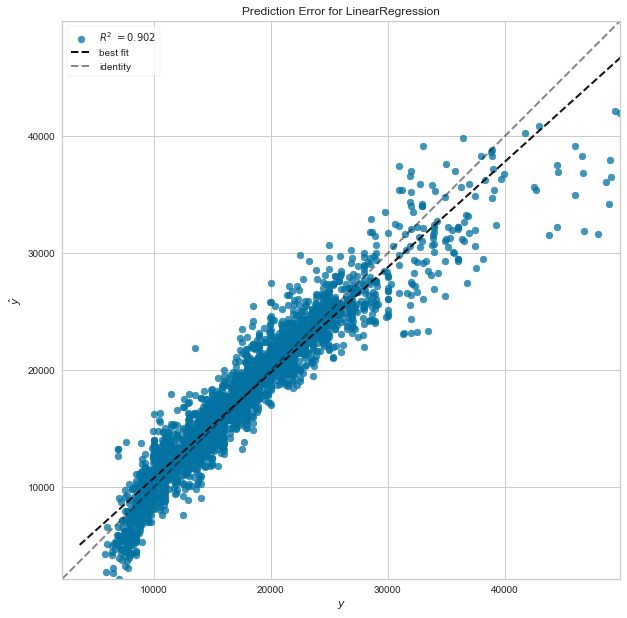

In [63]:
visualizer = RadViz(size=(720, 3000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

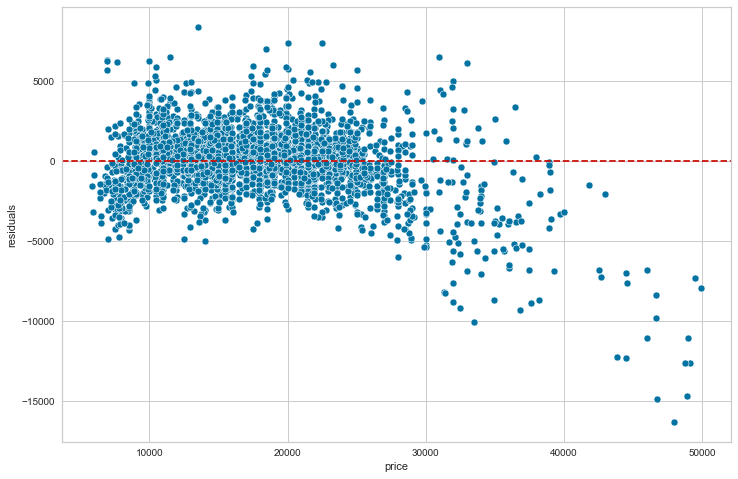

In [64]:
plt.figure(figsize=(12,8))
y_pred = lm2.predict(X_test)
residuals = y_test-y_pred

sns.scatterplot(x = y_test, y = -residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show()

In [65]:
def train_val_2(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [66]:
train_val_2(lm2, X_train, y_train, X_test, y_test) 

train        test
R2         0.906       0.902
mae     1475.671    1493.925
mse  4297405.520 4459600.581
rmse    2073.018    2111.777

In [67]:
#rmse de 400 Euro luk iyilesme oldugu icin outlier degrleri düsmeye karar verdik

In [68]:
ls  #outlierlar düsürülmeden elde edilen skorlar.

linear_train  linear_test
R2           0.894        0.890
mae       1675.149     1679.543
mse    5740519.923  6403701.411
rmse      2395.938     2530.554

In [69]:
2111/df2.price.mean()

0.11965512278743211

In [70]:
2530/df.price.mean()

0.1396793719501438

In [71]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [72]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:]

test_r2  test_neg_mean_absolute_error  test_neg_mean_squared_error  \
1     0.902                     -1517.160                 -4465821.936   
2     0.908                     -1483.689                 -4260503.897   
3     0.886                     -1568.542                 -5339197.304   
4     0.907                     -1509.177                 -4329614.843   
5     0.903                     -1494.479                 -4397173.646   
6     0.895                     -1568.761                 -4989045.136   
7     0.904                     -1421.119                 -4013869.132   
8     0.907                     -1467.706                 -4146619.082   
9     0.916                     -1427.544                 -3754302.287   
10    0.902                     -1505.769                 -4739447.323   

    test_neg_root_mean_squared_error  
1                          -2113.249  
2                          -2064.099  
3                          -2310.670  
4                          -2080.773  
5                          -2096.944  
6                          -2233.617  
7                          -2003.464  
8                          -2036.325  
9                          -1937.602  
10                         -2177.027

In [73]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                   0.903
test_neg_mean_absolute_error          -1496.395
test_neg_mean_squared_error        -4443559.459
test_neg_root_mean_squared_error      -2105.377
dtype: float64

In [74]:
train_val_2(lm2, X_train, y_train, X_test, y_test)

train        test
R2         0.906       0.902
mae     1475.671    1493.925
mse  4297405.520 4459600.581
rmse    2073.018    2111.777

In [75]:
my_dict = { 'Actual': y_test, 'Pred': y_pred, 'Residual': y_test-y_pred }
compare = pd.DataFrame(my_dict)

In [76]:
comp_sample = compare.sample(20)
comp_sample

Actual      Pred  Residual
12025   15490 15282.266   207.734
2434    21800 21710.580    89.420
9172    16625 15823.781   801.219
11098   22900 21059.814  1840.186
60      10800 10639.862   160.138
354     15500 16572.282 -1072.282
4027    17390 19484.723 -2094.723
5747     9630  9213.743   416.257
9625    13490 14969.636 -1479.636
624     12470 11530.100   939.900
3556    21480 24414.084 -2934.084
2382    22489 25029.608 -2540.608
5408    14990 12086.164  2903.836
1721    16900 17354.445  -454.445
2905    14990 14328.429   661.571
11114   22890 21540.212  1349.788
1257    15000 13684.742  1315.258
4559    20950 20683.342   266.658
3962    18650 17275.085  1374.915
4817    26900 26207.447   692.553

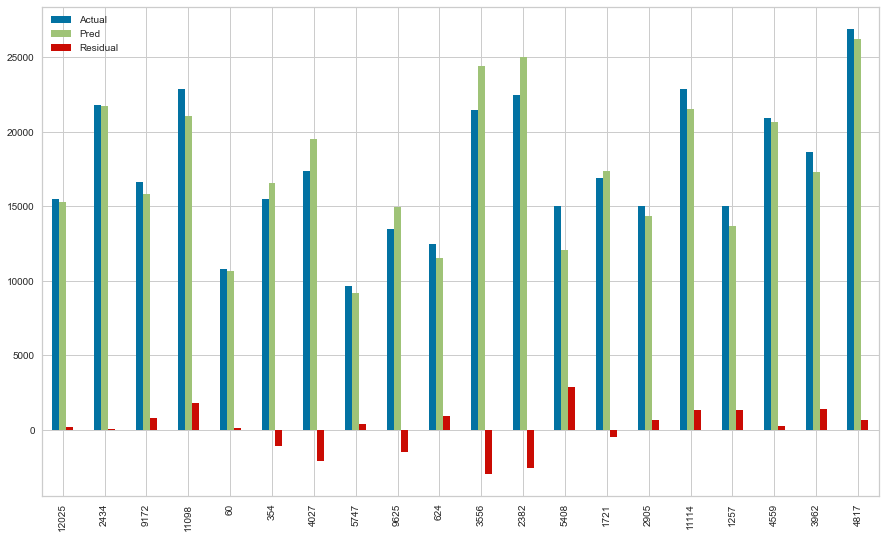

In [77]:
comp_sample.plot(kind='bar',figsize=(15,9))
plt.show()

In [78]:
pd.DataFrame(lm2.coef_, index = X.columns, columns=["Coef"]).sort_values("Coef")

Coef
make_model_Renault_Duster   -6981.762
make_model_Renault_Clio     -3538.459
make_model_Opel_Corsa       -3441.356
em_Television               -1679.295
body_type_Transporter       -1661.561
...                               ...
gearing_type_Semi-automatic  1528.832
make_model_Opel_Insignia     2012.247
make_model_Audi_A1           2309.308
make_model_Audi_A3           3639.285
make_model_Renault_Espace    7457.024

[146 rows x 1 columns]

## 4. Implement Ridge Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

In [79]:
from sklearn.linear_model import Ridge

In [80]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [81]:
ridge_model = Ridge(alpha=1)

In [82]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1)

In [83]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [84]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

ridge_train  ridge_test
R2          0.906       0.902
mae      1475.683    1491.976
mse   4299171.675 4459854.559
rmse     2073.444    2111.837

In [85]:
pd.concat([ls, rs], axis=1)

linear_train  linear_test  ridge_train  ridge_test
R2           0.894        0.890        0.906       0.902
mae       1675.149     1679.543     1475.683    1491.976
mse    5740519.923  6403701.411  4299171.675 4459854.559
rmse      2395.938     2530.554     2073.444    2111.837

In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [88]:
ridge_model = Ridge()

In [89]:
param_grid = {"alpha":alpha_space}

In [90]:
grid_ridge = GridSearchCV(estimator = ridge_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2)

In [91]:
grid_ridge.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.02; total time=   0.0s
[CV] END ...................................

[CV] END .........................................alpha=0.11; total time=   0.0s
[CV] END .........................................alpha=0.11; total time=   0.0s
[CV] END .........................................alpha=0.11; total time=   0.0s
[CV] END .........................................alpha=0.11; total time=   0.0s
[CV] END .........................................alpha=0.11; total time=   0.0s
[CV] END .........................................alpha=0.11; total time=   0.0s
[CV] END .........................................alpha=0.11; total time=   0.0s
[CV] END .........................................alpha=0.11; total time=   0.0s
[CV] END .........................................alpha=0.12; total time=   0.0s
[CV] END .........................................alpha=0.12; total time=   0.0s
[CV] END .........................................alpha=0.12; total time=   0.0s
[CV] END .........................................alpha=0.12; total time=   0.0s
[CV] END ...................

[CV] END ..........................alpha=0.21000000000000002; total time=   0.0s
[CV] END ..........................alpha=0.21000000000000002; total time=   0.0s
[CV] END ..........................alpha=0.21000000000000002; total time=   0.0s
[CV] END ..........................alpha=0.21000000000000002; total time=   0.0s
[CV] END ..........................alpha=0.21000000000000002; total time=   0.0s
[CV] END ..........................alpha=0.21000000000000002; total time=   0.0s
[CV] END .........................................alpha=0.22; total time=   0.0s
[CV] END .........................................alpha=0.22; total time=   0.0s
[CV] END .........................................alpha=0.22; total time=   0.0s
[CV] END .........................................alpha=0.22; total time=   0.0s
[CV] END .........................................alpha=0.22; total time=   0.0s
[CV] END .........................................alpha=0.22; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=0.32; total time=   0.0s
[CV] END .........................................alpha=0.32; total time=   0.0s
[CV] END .........................................alpha=0.32; total time=   0.0s
[CV] END .........................................alpha=0.32; total time=   0.0s
[CV] END .........................................alpha=0.32; total time=   0.0s
[CV] END .........................................alpha=0.32; total time=   0.0s
[CV] END .........................................alpha=0.32; total time=   0.0s
[CV] END .........................................alpha=0.32; total time=   0.0s
[CV] END .........................................alpha=0.32; total time=   0.0s
[CV] END .........................................alpha=0.32; total time=   0.0s
[CV] END .........................................alpha=0.33; total time=   0.0s
[CV] END .........................................alpha=0.33; total time=   0.0s
[CV] END ...................

[CV] END ..........................alpha=0.42000000000000004; total time=   0.0s
[CV] END ..........................alpha=0.42000000000000004; total time=   0.0s
[CV] END ..........................alpha=0.42000000000000004; total time=   0.0s
[CV] END ..........................alpha=0.42000000000000004; total time=   0.0s
[CV] END .........................................alpha=0.43; total time=   0.0s
[CV] END .........................................alpha=0.43; total time=   0.0s
[CV] END .........................................alpha=0.43; total time=   0.0s
[CV] END .........................................alpha=0.43; total time=   0.0s
[CV] END .........................................alpha=0.43; total time=   0.0s
[CV] END .........................................alpha=0.43; total time=   0.0s
[CV] END .........................................alpha=0.43; total time=   0.0s
[CV] END .........................................alpha=0.43; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=0.52; total time=   0.0s
[CV] END .........................................alpha=0.53; total time=   0.0s
[CV] END .........................................alpha=0.53; total time=   0.0s
[CV] END .........................................alpha=0.53; total time=   0.0s
[CV] END .........................................alpha=0.53; total time=   0.0s
[CV] END .........................................alpha=0.53; total time=   0.0s
[CV] END .........................................alpha=0.53; total time=   0.0s
[CV] END .........................................alpha=0.53; total time=   0.0s
[CV] END .........................................alpha=0.53; total time=   0.0s
[CV] END .........................................alpha=0.53; total time=   0.0s
[CV] END .........................................alpha=0.53; total time=   0.0s
[CV] END .........................................alpha=0.54; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=0.63; total time=   0.0s
[CV] END .........................................alpha=0.63; total time=   0.0s
[CV] END .........................................alpha=0.63; total time=   0.0s
[CV] END .........................................alpha=0.63; total time=   0.0s
[CV] END .........................................alpha=0.63; total time=   0.0s
[CV] END .........................................alpha=0.63; total time=   0.0s
[CV] END .........................................alpha=0.63; total time=   0.0s
[CV] END .........................................alpha=0.64; total time=   0.0s
[CV] END .........................................alpha=0.64; total time=   0.0s
[CV] END .........................................alpha=0.64; total time=   0.0s
[CV] END .........................................alpha=0.64; total time=   0.0s
[CV] END .........................................alpha=0.64; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=0.73; total time=   0.0s
[CV] END .........................................alpha=0.74; total time=   0.0s
[CV] END .........................................alpha=0.74; total time=   0.0s
[CV] END .........................................alpha=0.74; total time=   0.0s
[CV] END .........................................alpha=0.74; total time=   0.0s
[CV] END .........................................alpha=0.74; total time=   0.0s
[CV] END .........................................alpha=0.74; total time=   0.0s
[CV] END .........................................alpha=0.74; total time=   0.0s
[CV] END .........................................alpha=0.74; total time=   0.0s
[CV] END .........................................alpha=0.74; total time=   0.0s
[CV] END .........................................alpha=0.74; total time=   0.0s
[CV] END .........................................alpha=0.75; total time=   0.0s
[CV] END ...................

[CV] END ...........................alpha=0.8400000000000001; total time=   0.0s
[CV] END ...........................alpha=0.8400000000000001; total time=   0.0s
[CV] END ...........................alpha=0.8400000000000001; total time=   0.0s
[CV] END ...........................alpha=0.8400000000000001; total time=   0.0s
[CV] END ...........................alpha=0.8400000000000001; total time=   0.0s
[CV] END ...........................alpha=0.8400000000000001; total time=   0.0s
[CV] END .........................................alpha=0.85; total time=   0.0s
[CV] END .........................................alpha=0.85; total time=   0.0s
[CV] END .........................................alpha=0.85; total time=   0.0s
[CV] END .........................................alpha=0.85; total time=   0.0s
[CV] END .........................................alpha=0.85; total time=   0.0s
[CV] END .........................................alpha=0.85; total time=   0.0s
[CV] END ...................

[CV] END ...........................alpha=0.9500000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9500000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9500000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9500000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9500000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9500000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9500000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9500000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9500000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9500000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9600000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9600000000000001; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])},
             scoring='neg_root_mean_squared_error', verbose=2)

In [92]:
grid_ridge.best_params_

{'alpha': 1.0}

In [93]:
grid_ridge.best_score_

-2104.6279323303083

In [94]:
grid_ridge.best_index_

99

In [95]:
pd.DataFrame(grid_ridge.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0           0.032         0.005            0.002           0.003       0.010   
1           0.031         0.006            0.000           0.000       0.020   
2           0.030         0.006            0.001           0.002       0.030   
3           0.030         0.006            0.001           0.002       0.040   
4           0.029         0.006            0.001           0.002       0.050   
..            ...           ...              ...             ...         ...   
95          0.028         0.004            0.000           0.000       0.960   
96          0.028         0.004            0.002           0.003       0.970   
97          0.029         0.005            0.000           0.001       0.980   
98          0.027         0.004            0.000           0.000       0.990   
99          0.030         0.008            0.002           0.003       1.000   

                           params  split0_test_score  split1_test_score  \
0                 {'alpha': 0.01}          -2113.255          -2064.100   
1                 {'alpha': 0.02}          -2113.260          -2064.100   
2                 {'alpha': 0.03}          -2113.266          -2064.101   
3                 {'alpha': 0.04}          -2113.271          -2064.102   
4                 {'alpha': 0.05}          -2113.277          -2064.103   
..                            ...                ...                ...   
95  {'alpha': 0.9600000000000001}          -2114.003          -2064.446   
96                {'alpha': 0.97}          -2114.013          -2064.453   
97                {'alpha': 0.98}          -2114.023          -2064.459   
98                {'alpha': 0.99}          -2114.033          -2064.465   
99                 {'alpha': 1.0}          -2114.044          -2064.471   

    split2_test_score  split3_test_score  split4_test_score  \
0           -2310.596          -2080.750          -2096.952   
1           -2310.522          -2080.727          -2096.959   
2           -2310.449          -2080.705          -2096.968   
3           -2310.376          -2080.682          -2096.976   
4           -2310.304          -2080.660          -2096.985   
..                ...                ...                ...   
95          -2305.174          -2078.917          -2098.434   
96          -2305.129          -2078.901          -2098.455   
97          -2305.085          -2078.885          -2098.476   
98          -2305.042          -2078.869          -2098.497   
99          -2304.998          -2078.853          -2098.518   

    split5_test_score  split6_test_score  split7_test_score  \
0           -2233.601          -2003.423          -2036.296   
1           -2233.585          -2003.381          -2036.268   
2           -2233.570          -2003.341          -2036.240   
3           -2233.555          -2003.300          -2036.212   
4           -2233.540          -2003.260          -2036.184   
..                ...                ...                ...   
95          -2232.919          -2000.722          -2034.654   
96          -2232.918          -2000.703          -2034.645   
97          -2232.918          -2000.684          -2034.637   
98          -2232.917          -2000.665          -2034.629   
99          -2232.917          -2000.646          -2034.621   

    split8_test_score  split9_test_score  mean_test_score  std_test_score  \
0           -1937.577          -2177.058        -2105.361         104.624   
1           -1937.552          -2177.090        -2105.344         104.620   
2           -1937.527          -2177.121        -2105.329         104.616   
3           -1937.504          -2177.152        -2105.313         104.612   
4           -1937.481          -2177.184        -2105.298         104.608   
..                ...                ...              ...             ...   
95          -1936.966          -2180.101        -2104.634         104.201   
96          

In [96]:
alfa_space2 = np.linspace(1,2,100)
alfa_space2

array([1.        , 1.01010101, 1.02020202, 1.03030303, 1.04040404,
       1.05050505, 1.06060606, 1.07070707, 1.08080808, 1.09090909,
       1.1010101 , 1.11111111, 1.12121212, 1.13131313, 1.14141414,
       1.15151515, 1.16161616, 1.17171717, 1.18181818, 1.19191919,
       1.2020202 , 1.21212121, 1.22222222, 1.23232323, 1.24242424,
       1.25252525, 1.26262626, 1.27272727, 1.28282828, 1.29292929,
       1.3030303 , 1.31313131, 1.32323232, 1.33333333, 1.34343434,
       1.35353535, 1.36363636, 1.37373737, 1.38383838, 1.39393939,
       1.4040404 , 1.41414141, 1.42424242, 1.43434343, 1.44444444,
       1.45454545, 1.46464646, 1.47474747, 1.48484848, 1.49494949,
       1.50505051, 1.51515152, 1.52525253, 1.53535354, 1.54545455,
       1.55555556, 1.56565657, 1.57575758, 1.58585859, 1.5959596 ,
       1.60606061, 1.61616162, 1.62626263, 1.63636364, 1.64646465,
       1.65656566, 1.66666667, 1.67676768, 1.68686869, 1.6969697 ,
       1.70707071, 1.71717172, 1.72727273, 1.73737374, 1.74747

In [97]:
param_grid2 = {"alpha":alfa_space2}

In [98]:
grid_ridge2 = GridSearchCV(estimator = ridge_model, param_grid = param_grid2, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2)

In [99]:
grid_ridge2.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ...........................alpha=1.0101010101010102; total time=   0.0s
[CV] END ...........................alpha=1.

[CV] END ............................alpha=1.101010101010101; total time=   0.0s
[CV] END ............................alpha=1.101010101010101; total time=   0.0s
[CV] END ............................alpha=1.101010101010101; total time=   0.0s
[CV] END ............................alpha=1.101010101010101; total time=   0.0s
[CV] END ............................alpha=1.101010101010101; total time=   0.0s
[CV] END ............................alpha=1.101010101010101; total time=   0.0s
[CV] END ...........................alpha=1.1111111111111112; total time=   0.0s
[CV] END ...........................alpha=1.1111111111111112; total time=   0.0s
[CV] END ...........................alpha=1.1111111111111112; total time=   0.0s
[CV] END ...........................alpha=1.1111111111111112; total time=   0.0s
[CV] END ...........................alpha=1.1111111111111112; total time=   0.0s
[CV] END ...........................alpha=1.1111111111111112; total time=   0.0s
[CV] END ...................

[CV] END ...........................alpha=1.2121212121212122; total time=   0.0s
[CV] END ...........................alpha=1.2121212121212122; total time=   0.0s
[CV] END ...........................alpha=1.2121212121212122; total time=   0.0s
[CV] END ...........................alpha=1.2121212121212122; total time=   0.0s
[CV] END ...........................alpha=1.2121212121212122; total time=   0.0s
[CV] END ...........................alpha=1.2121212121212122; total time=   0.0s
[CV] END ...........................alpha=1.2121212121212122; total time=   0.0s
[CV] END ...........................alpha=1.2121212121212122; total time=   0.0s
[CV] END ...........................alpha=1.2121212121212122; total time=   0.0s
[CV] END ...........................alpha=1.2222222222222223; total time=   0.0s
[CV] END ...........................alpha=1.2222222222222223; total time=   0.0s
[CV] END ...........................alpha=1.2222222222222223; total time=   0.0s
[CV] END ...................

[CV] END ...........................alpha=1.3131313131313131; total time=   0.0s
[CV] END ...........................alpha=1.3131313131313131; total time=   0.0s
[CV] END ...........................alpha=1.3131313131313131; total time=   0.0s
[CV] END ...........................alpha=1.3131313131313131; total time=   0.0s
[CV] END ...........................alpha=1.3131313131313131; total time=   0.0s
[CV] END ...........................alpha=1.3131313131313131; total time=   0.0s
[CV] END ...........................alpha=1.3232323232323233; total time=   0.0s
[CV] END ...........................alpha=1.3232323232323233; total time=   0.0s
[CV] END ...........................alpha=1.3232323232323233; total time=   0.0s
[CV] END ...........................alpha=1.3232323232323233; total time=   0.0s
[CV] END ...........................alpha=1.3232323232323233; total time=   0.0s
[CV] END ...........................alpha=1.3232323232323233; total time=   0.0s
[CV] END ...................

[CV] END ...........................alpha=1.4242424242424243; total time=   0.0s
[CV] END ...........................alpha=1.4242424242424243; total time=   0.0s
[CV] END ...........................alpha=1.4242424242424243; total time=   0.0s
[CV] END ...........................alpha=1.4242424242424243; total time=   0.0s
[CV] END ...........................alpha=1.4242424242424243; total time=   0.0s
[CV] END ...........................alpha=1.4242424242424243; total time=   0.0s
[CV] END ...........................alpha=1.4242424242424243; total time=   0.0s
[CV] END ...........................alpha=1.4242424242424243; total time=   0.0s
[CV] END ...........................alpha=1.4242424242424243; total time=   0.0s
[CV] END ...........................alpha=1.4242424242424243; total time=   0.0s
[CV] END ...........................alpha=1.4343434343434343; total time=   0.0s
[CV] END ...........................alpha=1.4343434343434343; total time=   0.0s
[CV] END ...................

[CV] END ...........................alpha=1.5252525252525253; total time=   0.0s
[CV] END ...........................alpha=1.5353535353535355; total time=   0.0s
[CV] END ...........................alpha=1.5353535353535355; total time=   0.0s
[CV] END ...........................alpha=1.5353535353535355; total time=   0.0s
[CV] END ...........................alpha=1.5353535353535355; total time=   0.0s
[CV] END ...........................alpha=1.5353535353535355; total time=   0.0s
[CV] END ...........................alpha=1.5353535353535355; total time=   0.0s
[CV] END ...........................alpha=1.5353535353535355; total time=   0.0s
[CV] END ...........................alpha=1.5353535353535355; total time=   0.0s
[CV] END ...........................alpha=1.5353535353535355; total time=   0.0s
[CV] END ...........................alpha=1.5353535353535355; total time=   0.0s
[CV] END ...........................alpha=1.5454545454545454; total time=   0.0s
[CV] END ...................

[CV] END ...........................alpha=1.6363636363636365; total time=   0.0s
[CV] END ...........................alpha=1.6363636363636365; total time=   0.0s
[CV] END ...........................alpha=1.6363636363636365; total time=   0.0s
[CV] END ...........................alpha=1.6363636363636365; total time=   0.0s
[CV] END ...........................alpha=1.6363636363636365; total time=   0.0s
[CV] END ...........................alpha=1.6363636363636365; total time=   0.0s
[CV] END ...........................alpha=1.6363636363636365; total time=   0.0s
[CV] END ...........................alpha=1.6363636363636365; total time=   0.0s
[CV] END ...........................alpha=1.6363636363636365; total time=   0.0s
[CV] END ...........................alpha=1.6464646464646466; total time=   0.0s
[CV] END ...........................alpha=1.6464646464646466; total time=   0.0s
[CV] END ...........................alpha=1.6464646464646466; total time=   0.0s
[CV] END ...................

[CV] END ...........................alpha=1.7373737373737375; total time=   0.0s
[CV] END ...........................alpha=1.7373737373737375; total time=   0.0s
[CV] END ...........................alpha=1.7373737373737375; total time=   0.0s
[CV] END ...........................alpha=1.7373737373737375; total time=   0.0s
[CV] END ...........................alpha=1.7373737373737375; total time=   0.0s
[CV] END ...........................alpha=1.7474747474747474; total time=   0.0s
[CV] END ...........................alpha=1.7474747474747474; total time=   0.0s
[CV] END ...........................alpha=1.7474747474747474; total time=   0.0s
[CV] END ...........................alpha=1.7474747474747474; total time=   0.0s
[CV] END ...........................alpha=1.7474747474747474; total time=   0.0s
[CV] END ...........................alpha=1.7474747474747474; total time=   0.0s
[CV] END ...........................alpha=1.7474747474747474; total time=   0.0s
[CV] END ...................

[CV] END ...........................alpha=1.8383838383838385; total time=   0.0s
[CV] END ...........................alpha=1.8484848484848486; total time=   0.0s
[CV] END ...........................alpha=1.8484848484848486; total time=   0.0s
[CV] END ...........................alpha=1.8484848484848486; total time=   0.0s
[CV] END ...........................alpha=1.8484848484848486; total time=   0.0s
[CV] END ...........................alpha=1.8484848484848486; total time=   0.0s
[CV] END ...........................alpha=1.8484848484848486; total time=   0.0s
[CV] END ...........................alpha=1.8484848484848486; total time=   0.0s
[CV] END ...........................alpha=1.8484848484848486; total time=   0.0s
[CV] END ...........................alpha=1.8484848484848486; total time=   0.0s
[CV] END ...........................alpha=1.8484848484848486; total time=   0.0s
[CV] END ...........................alpha=1.8585858585858586; total time=   0.0s
[CV] END ...................

[CV] END ...........................alpha=1.9494949494949496; total time=   0.0s
[CV] END ...........................alpha=1.9494949494949496; total time=   0.0s
[CV] END ...........................alpha=1.9494949494949496; total time=   0.0s
[CV] END ...........................alpha=1.9494949494949496; total time=   0.0s
[CV] END ...........................alpha=1.9494949494949496; total time=   0.0s
[CV] END ...........................alpha=1.9595959595959598; total time=   0.0s
[CV] END ...........................alpha=1.9595959595959598; total time=   0.0s
[CV] END ...........................alpha=1.9595959595959598; total time=   0.0s
[CV] END ...........................alpha=1.9595959595959598; total time=   0.0s
[CV] END ...........................alpha=1.9595959595959598; total time=   0.0s
[CV] END ...........................alpha=1.9595959595959598; total time=   0.0s
[CV] END ...........................alpha=1.9595959595959598; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([1.        , 1.01010101, 1.02020202, 1.03030303, 1.04040404,
       1.05050505, 1.06060606, 1.07070707, 1.08080808, 1.09090909,
       1.1010101 , 1.11111111, 1.12121212, 1.13131313, 1.14141414,
       1.15151515, 1.16161616, 1.17171717, 1.18181818, 1.19191919,
       1.2020202 , 1.21212121, 1.22222222, 1.23232323, 1.24242424,
       1.25252525, 1.26262626...
       1.70707071, 1.71717172, 1.72727273, 1.73737374, 1.74747475,
       1.75757576, 1.76767677, 1.77777778, 1.78787879, 1.7979798 ,
       1.80808081, 1.81818182, 1.82828283, 1.83838384, 1.84848485,
       1.85858586, 1.86868687, 1.87878788, 1.88888889, 1.8989899 ,
       1.90909091, 1.91919192, 1.92929293, 1.93939394, 1.94949495,
       1.95959596, 1.96969697, 1.97979798, 1.98989899, 2.        ])},
             scoring='neg_root_mean_squared_error', verbose=2)

In [100]:
grid_ridge2.best_params_

{'alpha': 1.1414141414141414}

In [101]:
grid_ridge2.best_score_

-2104.6193993598804

In [102]:
y_pred = grid_ridge.predict(X_test_scaled)
y_train_pred = grid_ridge.predict(X_train_scaled)

In [103]:
rgs = train_val(y_train, y_train_pred, y_test, y_pred, "grid_ridge")
rgs

grid_ridge_train  grid_ridge_test
R2               0.906            0.902
mae           1475.683         1491.976
mse        4299171.675      4459854.559
rmse          2073.444         2111.837

In [104]:
pd.concat([ls, rs, rgs], axis = 1)

linear_train  linear_test  ridge_train  ridge_test  grid_ridge_train  \
R2           0.894        0.890        0.906       0.902             0.906   
mae       1675.149     1679.543     1475.683    1491.976          1475.683   
mse    5740519.923  6403701.411  4299171.675 4459854.559       4299171.675   
rmse      2395.938     2530.554     2073.444    2111.837          2073.444   

      grid_ridge_test  
R2              0.902  
mae          1491.976  
mse       4459854.559  
rmse         2111.837

In [105]:
rm = Ridge(alpha=1).fit(X_train_scaled, y_train) # 'GridSearchCV' object has no attribute 'coef_'
rm.coef_


array([-4.62826473e+03, -1.13466590e+04,  1.30375701e+04,  1.68921123e+03,
       -2.76961934e+03,  1.83299938e+03, -2.12225299e+03,  1.04456156e+03,
        4.36706698e+02,  2.04969245e+03, -1.20293480e+03,  3.44322293e+02,
       -3.76361662e+02, -1.29902560e+02,  1.71152858e+02, -1.18445022e+02,
        1.50226832e+02, -5.55827586e+02,  3.05662861e+02,  1.59043543e+02,
       -3.97656747e+01,  1.88124005e+02,  1.34769195e+03,  3.24280871e+02,
        1.71752730e+02,  1.32440982e+02, -6.51257574e+02,  1.45509099e+02,
       -8.24150142e+00, -3.18379613e+02,  7.00717315e+02,  2.14440778e+02,
        2.49401566e+02, -5.50240924e+02,  4.45909576e+02,  9.28249192e+01,
        1.62515926e+02,  1.80376913e+02, -2.90794092e+02,  3.24865441e+01,
       -7.87168721e+01,  7.25771662e+01,  1.04792834e+02, -6.72342324e+01,
        1.47505602e+02,  7.11234146e+02,  5.50487979e+01, -4.50729115e+02,
       -2.29905563e+02, -4.08480351e+02, -9.92231485e+01,  5.34099903e+02,
        6.94944173e+01, -

## 5. Implement Lasso Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [106]:
from sklearn.linear_model import Lasso

In [107]:
lasso_model = Lasso(alpha=1)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1)

In [108]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [109]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

lasso_train  lasso_test
R2          0.906       0.902
mae      1476.009    1490.022
mse   4307459.713 4452925.792
rmse     2075.442    2110.196

In [110]:
pd.concat([ls, rs, rgs, lss], axis = 1)

linear_train  linear_test  ridge_train  ridge_test  grid_ridge_train  \
R2           0.894        0.890        0.906       0.902             0.906   
mae       1675.149     1679.543     1475.683    1491.976          1475.683   
mse    5740519.923  6403701.411  4299171.675 4459854.559       4299171.675   
rmse      2395.938     2530.554     2073.444    2111.837          2073.444   

      grid_ridge_test  lasso_train  lasso_test  
R2              0.902        0.906       0.902  
mae          1491.976     1476.009    1490.022  
mse       4459854.559  4307459.713 4452925.792  
rmse         2111.837     2075.442    2110.196

In [111]:
model = Lasso(alpha=1)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)


In [112]:
pd.DataFrame(scores, index = range(1, 11))


fit_time  score_time  test_r2  test_neg_mean_absolute_error  \
1      0.417       0.008    0.902                     -1520.859   
2      0.435       0.016    0.908                     -1479.014   
3      0.398       0.000    0.888                     -1558.909   
4      0.408       0.000    0.908                     -1506.301   
5      0.415       0.000    0.903                     -1496.290   
6      0.403       0.000    0.895                     -1566.612   
7      0.405       0.000    0.905                     -1416.283   
8      0.465       0.000    0.908                     -1463.140   
9      0.419       0.000    0.916                     -1423.802   
10     0.449       0.000    0.902                     -1506.908   

    test_neg_mean_squared_error  test_neg_root_mean_squared_error  
1                  -4467360.702                         -2113.613  
2                  -4261204.528                         -2064.269  
3                  -5246041.080                         -2290.424  
4                  -4321204.985                         -2078.751  
5                  -4396115.381                         -2096.692  
6                  -4976527.058                         -2230.813  
7                  -3978874.608                         -1994.712  
8                  -4091285.563                         -2022.693  
9                  -3753378.284                         -1937.364  
10                 -4746191.635                         -2178.576

In [113]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()


test_r2                                   0.904
test_neg_mean_absolute_error          -1493.812
test_neg_mean_squared_error        -4423818.382
test_neg_root_mean_squared_error      -2100.790
dtype: float64

In [114]:
train_val(y_train, y_train_pred, y_test, y_pred, "lasso")


lasso_train  lasso_test
R2          0.906       0.902
mae      1476.009    1490.022
mse   4307459.713 4452925.792
rmse     2075.442    2110.196

In [115]:
lasso_model.coef_

array([-4.62478850e+03, -1.13899319e+04,  1.30849595e+04,  1.45139562e+03,
       -2.22514858e+03,  1.34390873e+03, -1.94970849e+03,  1.00500989e+03,
        2.55428887e+02,  2.04628059e+03, -1.15926117e+03,  3.32188745e+02,
       -1.70906592e+02, -1.13246916e+02,  1.68200525e+02, -5.64562635e+01,
        1.42530040e+02, -0.00000000e+00,  2.74062747e+02,  1.47520222e+02,
       -1.67085642e+01,  1.68303650e+02,  1.35071584e+03,  3.12616762e+02,
        1.69091275e+02,  1.21589220e+02, -3.54311387e+02,  1.38875467e+02,
       -3.87665985e+00, -3.16709491e+02,  6.39866838e+02,  2.02228911e+02,
        2.39079948e+02, -4.66027382e+02,  4.39896350e+02,  9.02241672e+01,
        1.56162042e+02,  1.64296923e+02, -2.62628684e+02,  9.31835573e+00,
       -6.78927668e+01,  6.99917537e+01,  9.63958094e+01, -4.12349360e+01,
        1.42553806e+02,  6.32299572e+02,  1.67056243e+01, -4.69833825e+01,
       -0.00000000e+00, -4.00513542e+02, -9.58066598e+01,  5.32253361e+02,
        3.78905482e+01, -

In [116]:
lsm_df = pd.DataFrame(lasso_model.coef_, columns = ["lasso_coef_1"])


In [117]:
pd.concat([lm_df, lsm_df], axis = 1)


lm_coef  lasso_coef_1
0             -4656.883     -4624.789
1            -12134.061    -11389.932
2             25221.408     13084.959
3               756.521      1451.396
4             -3924.777     -2225.149
..                  ...           ...
141 511569197541521.812     -3698.003
142 511569197545936.688      1716.708
143 511569197541275.688     -3725.089
144 511569197538123.062     -5544.842
145 511569197550412.875      7186.569

[146 rows x 2 columns]

In [118]:
lasso_model = Lasso(max_iter=1000)

In [119]:
param_grid = {"alpha": [0.5,0.6,0.7,0.8,0.9,1]}

In [120]:
grid_lasso = GridSearchCV(estimator = lasso_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, n_jobs = -1)

In [121]:
grid_lasso.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.5, 0.6, 0.7, 0.8, 0.9, 1]},
             scoring='neg_root_mean_squared_error')

In [122]:
grid_lasso.best_params_

{'alpha': 1}

In [123]:
pd.DataFrame(grid_lasso.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0          3.168         0.152            0.002           0.004       0.500   
1          2.721         0.184            0.006           0.006       0.600   
2          2.449         0.238            0.007           0.007       0.700   
3          2.126         0.173            0.005           0.007       0.800   
4          1.921         0.156            0.001           0.002       0.900   
5          1.709         0.106            0.002           0.005           1   

           params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.5}          -2112.877          -2064.207          -2299.217   
1  {'alpha': 0.6}          -2112.978          -2064.108          -2297.320   
2  {'alpha': 0.7}          -2113.108          -2064.082          -2295.523   
3  {'alpha': 0.8}          -2113.169          -2064.105          -2293.769   
4  {'alpha': 0.9}          -2113.299          -2064.161          -2292.066   
5    {'alpha': 1}          -2113.613          -2064.269          -2290.424   

   split3_test_score  split4_test_score  split5_test_score  split6_test_score  \
0          -2079.038          -2094.517          -2231.046          -1998.424   
1          -2078.718          -2094.959          -2230.854          -1997.555   
2          -2078.653          -2095.388          -2230.678          -1996.764   
3          -2078.646          -2095.692          -2230.625          -1996.042   
4          -2078.698          -2096.053          -2230.697          -1995.370   
5          -2078.751          -2096.692          -2230.813          -1994.712   

   split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
0          -2025.760          -1936.365          -2177.320        -2101.877   
1          -2023.967          -1936.521          -2177.591        -2101.457   
2          -2023.478          -1936.731          -2177.885        -2101.229   
3          -2023.172          -1936.925          -2178.108        -2101.025   
4          -2022.912          -1937.158          -2178.324        -2100.874   
5          -2022.693          -1937.364          -2178.576        -2100.790   

   std_test_score  rank_test_score  
0         103.598                6  
1         103.438                5  
2         103.182                4  
3         102.927                3  
4         102.682                2  
5         102.459                1

In [124]:
grid_lasso.best_score_

-2100.790458950712

In [125]:
y_pred = grid_lasso.predict(X_test_scaled)
y_train_pred = grid_lasso.predict(X_train_scaled)

In [126]:
lgs = train_val(y_train, y_train_pred, y_test, y_pred, "grid_lasso")
lgs

grid_lasso_train  grid_lasso_test
R2               0.906            0.902
mae           1476.009         1490.022
mse        4307459.713      4452925.792
rmse          2075.442         2110.196

In [127]:
lsm = Lasso(alpha=5).fit(X_train_scaled, y_train) # 'GridSearchCV' object has no attribute 'coef_'
lsm.coef_

array([-4.73735270e+03, -1.07352064e+04,  1.16222948e+04,  5.16115483e+02,
       -0.00000000e+00,  0.00000000e+00, -1.03607529e+03,  7.48990585e+02,
        0.00000000e+00,  2.08909960e+03, -6.58939375e+02,  1.80669452e+02,
       -0.00000000e+00, -4.29771835e+01,  1.61133308e+02, -0.00000000e+00,
        1.02854014e+02, -0.00000000e+00,  1.65263309e+02,  8.52415549e+01,
       -0.00000000e+00,  8.92238984e+01,  1.39414183e+03,  2.58554378e+02,
        1.39518524e+02,  1.06147283e+02, -0.00000000e+00,  1.08892223e+02,
       -0.00000000e+00, -2.94612170e+02,  4.00358531e+02,  1.37912039e+02,
        2.11314091e+02, -1.49047134e+02,  4.08259252e+02,  8.90524227e+01,
        8.58075018e+01,  8.55041932e+01, -1.45938173e+02,  0.00000000e+00,
       -7.95845308e+00,  7.75872679e+01,  9.98587750e+01, -0.00000000e+00,
        1.35779522e+02,  3.42345481e+02, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -3.89835204e+02, -1.05980512e+02,  5.16049748e+02,
       -0.00000000e+00, -

In [128]:
# 9 feature elendi

## 6. Implement Elastic-Net

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

In [129]:
from sklearn.linear_model import ElasticNet

In [130]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5)
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(alpha=1)

In [131]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [132]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

elastic_train  elastic_test
R2            0.624         0.624
mae        3123.365      3085.620
mse    17243183.677  17118577.235
rmse       4152.491      4137.460

In [133]:
df_score = pd.concat([ls,rs, rgs, lss, lgs, es], axis = 1)
df_score


linear_train  linear_test  ridge_train  ridge_test  grid_ridge_train  \
R2           0.894        0.890        0.906       0.902             0.906   
mae       1675.149     1679.543     1475.683    1491.976          1475.683   
mse    5740519.923  6403701.411  4299171.675 4459854.559       4299171.675   
rmse      2395.938     2530.554     2073.444    2111.837          2073.444   

      grid_ridge_test  lasso_train  lasso_test  grid_lasso_train  \
R2              0.902        0.906       0.902             0.906   
mae          1491.976     1476.009    1490.022          1476.009   
mse       4459854.559  4307459.713 4452925.792       4307459.713   
rmse         2111.837     2075.442    2110.196          2075.442   

      grid_lasso_test  elastic_train  elastic_test  
R2              0.902          0.624         0.624  
mae          1490.022       3123.365      3085.620  
mse       4452925.792   17243183.677  17118577.235  
rmse         2110.196       4152.491      4137.460

In [134]:
model = ElasticNet(alpha=1, l1_ratio=0.5)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [135]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:]

test_r2  test_neg_mean_absolute_error  test_neg_mean_squared_error  \
1     0.618                     -3164.522                -17321139.475   
2     0.634                     -3185.247                -16980429.193   
3     0.613                     -3111.638                -18137844.589   
4     0.628                     -3185.972                -17418103.829   
5     0.592                     -3225.562                -18592791.371   
6     0.619                     -3149.995                -18142543.990   
7     0.642                     -2900.910                -14960401.931   
8     0.633                     -3065.494                -16355133.054   
9     0.644                     -3051.402                -15919031.961   
10    0.603                     -3246.703                -19221795.052   

    test_neg_root_mean_squared_error  
1                          -4161.867  
2                          -4120.732  
3                          -4258.855  
4                          -4173.500  
5                          -4311.936  
6                          -4259.407  
7                          -3867.868  
8                          -4044.148  
9                          -3989.866  
10                         -4384.267

In [136]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                    0.623
test_neg_mean_absolute_error           -3128.744
test_neg_mean_squared_error        -17304921.444
test_neg_root_mean_squared_error       -4157.245
dtype: float64

In [137]:
train_val(y_train, y_train_pred, y_test, y_pred, "elastic")

elastic_train  elastic_test
R2            0.624         0.624
mae        3123.365      3085.620
mse    17243183.677  17118577.235
rmse       4152.491      4137.460

In [138]:
elastic_model.coef_

array([-1.41066607e+03, -4.35213402e+02,  5.05299362e+02, -9.14075860e+01,
        8.87090923e+01, -6.90659202e+01,  6.22262107e+02,  1.81401780e+02,
        1.40742285e+02,  8.10545638e+02,  1.62510248e+02, -6.21222716e+01,
        4.70039104e+00,  3.54517740e+02,  6.40690076e+02, -1.77272529e+01,
       -9.63227012e+00, -0.00000000e+00,  2.41369407e+02, -2.02654564e+02,
        2.32085634e+02,  6.87771504e+01,  3.18736766e+02, -9.13995556e+01,
       -1.39787944e+02,  2.11036548e+02, -1.09234279e+00,  1.15572847e+02,
        3.01067222e+02,  4.84185816e+01,  2.04147591e+02, -8.59008108e+00,
        3.59610443e+02,  1.98995614e+02,  5.24161592e+02,  2.66096368e+02,
        1.63154519e+02,  2.92634241e+02,  2.17168303e+02, -9.54524530e+01,
        3.56115097e+02,  3.55736326e+02,  1.19020238e+02, -4.35453788e+01,
        3.90241170e+02,  1.31662379e+02, -2.64717111e+01, -5.65227802e+00,
       -1.36445964e+00, -5.92268488e+01, -2.86611548e+02,  2.40318405e+02,
        4.72175595e+00, -

In [139]:
em_df = pd.DataFrame(elastic_model.coef_, columns=["elastic_coef_(alp:1, l1:0.5)"])

In [140]:
from sklearn.model_selection import GridSearchCV

In [141]:
elastic_model = ElasticNet(max_iter=10000)

In [142]:
param_grid = {"alpha":[1, 3, 4, 5, 6, 7, 9, 10],
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [143]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2)

In [144]:
grid_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 56 candidates, totalling 560 fits
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=1

[CV] END ..............................alpha=3, l1_ratio=0.9; total time=   0.0s
[CV] END ..............................alpha=3, l1_ratio=0.9; total time=   0.0s
[CV] END ..............................alpha=3, l1_ratio=0.9; total time=   0.0s
[CV] END ..............................alpha=3, l1_ratio=0.9; total time=   0.0s
[CV] END ..............................alpha=3, l1_ratio=0.9; total time=   0.0s
[CV] END ..............................alpha=3, l1_ratio=0.9; total time=   0.0s
[CV] END ..............................alpha=3, l1_ratio=0.9; total time=   0.0s
[CV] END ..............................alpha=3, l1_ratio=0.9; total time=   0.0s
[CV] END .............................alpha=3, l1_ratio=0.95; total time=   0.0s
[CV] END .............................alpha=3, l1_ratio=0.95; total time=   0.0s
[CV] END .............................alpha=3, l1_ratio=0.95; total time=   0.0s
[CV] END .............................alpha=3, l1_ratio=0.95; total time=   0.0s
[CV] END ...................

[CV] END ................................alpha=4, l1_ratio=1; total time=   0.3s
[CV] END ................................alpha=4, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=4, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=4, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=4, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=4, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END ...................

[CV] END ..............................alpha=6, l1_ratio=0.7; total time=   0.0s
[CV] END ..............................alpha=6, l1_ratio=0.9; total time=   0.0s
[CV] END ..............................alpha=6, l1_ratio=0.9; total time=   0.0s
[CV] END ..............................alpha=6, l1_ratio=0.9; total time=   0.0s
[CV] END ..............................alpha=6, l1_ratio=0.9; total time=   0.0s
[CV] END ..............................alpha=6, l1_ratio=0.9; total time=   0.0s
[CV] END ..............................alpha=6, l1_ratio=0.9; total time=   0.0s
[CV] END ..............................alpha=6, l1_ratio=0.9; total time=   0.0s
[CV] END ..............................alpha=6, l1_ratio=0.9; total time=   0.0s
[CV] END ..............................alpha=6, l1_ratio=0.9; total time=   0.0s
[CV] END ..............................alpha=6, l1_ratio=0.9; total time=   0.0s
[CV] END .............................alpha=6, l1_ratio=0.95; total time=   0.0s
[CV] END ...................

[CV] END ................................alpha=7, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=7, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=7, l1_ratio=1; total time=   0.1s
[CV] END ................................alpha=7, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=7, l1_ratio=1; total time=   0.1s
[CV] END ................................alpha=7, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=7, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=7, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=9, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=9, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=9, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=9, l1_ratio=0.1; total time=   0.0s
[CV] END ...................

[CV] END .............................alpha=10, l1_ratio=0.7; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.7; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.7; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.7; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.9; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.9; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.9; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.9; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.9; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.9; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.9; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.9; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=10, estimator=ElasticNet(max_iter=10000),
             param_grid={'alpha': [1, 3, 4, 5, 6, 7, 9, 10],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [145]:
grid_model.best_params_

{'alpha': 1, 'l1_ratio': 1}

In [146]:
grid_model.best_score_

-2100.790458950712

In [147]:
pd.DataFrame(grid_model.cv_results_)


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0           0.061         0.003            0.000           0.000           1   
1           0.067         0.006            0.001           0.003           1   
2           0.078         0.007            0.001           0.002           1   
3           0.121         0.006            0.002           0.003           1   
4           0.144         0.006            0.002           0.005           1   
5           0.191         0.009            0.001           0.002           1   
6           0.426         0.027            0.003           0.006           1   
7           0.039         0.007            0.000           0.000           3   
8           0.043         0.006            0.000           0.000           3   
9           0.046         0.006            0.001           0.002           3   
10          0.068         0.008            0.001           0.003           3   
11          0.097         0.009            0.000           0.001           3   
12          0.139         0.011            0.004           0.006           3   
13          0.191         0.070            0.003           0.006           3   
14          0.037         0.007            0.001           0.002           4   
15          0.036         0.005            0.002           0.003           4   
16          0.045         0.007            0.000           0.000           4   
17          0.059         0.008            0.000           0.000           4   
18          0.075         0.009            0.000           0.000           4   
19          0.124         0.009            0.000           0.000           4   
20          0.176         0.089            0.000           0.000           4   
21          0.040         0.007            0.001           0.002           5   
22          0.038         0.005            0.000           0.000           5   
23          0.041         0.006            0.001           0.002           5   
24          0.048         0.003            0.004           0.006           5   
25          0.066         0.007            0.000           0.000           5   
26          0.114         0.007            0.000           0.000           5   
27          0.155         0.047            0.001           0.002           5   
28          0.036         0.007            0.000           0.000           6   
29          0.037         0.007            0.002           0.005           6   
30          0.040         0.007            0.003           0.005           6   
31          0.047         0.012            0.001           0.002           6   
32          0.061         0.008            0.001           0.002           6   
33          0.108         0.014            0.002           0.003           6   
34          0.134         0.017            0.001           0.002           6   
35          0.036         0.005            0.001           0.004           7   
36          0.037         0.009            0.000           0.000           7   
37          0.043         0.007            0.000           0.000           7   
38          0.043         0.006            0.003           0.006           7   
39          0.059         0.006            0.004           0.006           7   
40          0.099         0.006            0.003           0.006           7   
41          0.136         0.020            0.000           0.001           7   
42          0.038         0.006            0.002           0.005           9   
43          0.037         0.005            0.002           0.005           9   
44          0.035         0.009            0.002           0.005           9   
45          0.042         0.006            0.001           0.002           9   
46          0.050         0.005            0.003           0.006           9   
47          0.090         0.006            0.001           0.003           9   
48          0.121         0.011            0.001           0.002           9   
49  

In [148]:
y_pred = grid_model.predict(X_test_scaled) # ElasticNet(alpha=0.01, l1_ratio=0.1)
y_train_pred = grid_model.predict(X_train_scaled)

In [149]:
train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")

GridSearch_train  GridSearch_test
R2               0.906            0.902
mae           1476.009         1490.022
mse        4307459.713      4452925.792
rmse          2075.442         2110.196

## 7. Visually Compare Models Performance In a Graph

In [150]:
df_score


linear_train  linear_test  ridge_train  ridge_test  grid_ridge_train  \
R2           0.894        0.890        0.906       0.902             0.906   
mae       1675.121     1679.530     1475.683    1491.976          1475.683   
mse    5740533.264  6403755.174  4299171.675 4459854.559       4299171.675   
rmse      2395.941     2530.564     2073.444    2111.837          2073.444   

      grid_ridge_test  lasso_train  lasso_test  grid_lasso_train  \
R2              0.902        0.906       0.902             0.906   
mae          1491.976     1476.009    1490.022          1476.009   
mse       4459854.559  4307459.713 4452925.792       4307459.713   
rmse         2111.837     2075.442    2110.196          2075.442   

      grid_lasso_test  elastic_train  elastic_test  
R2              0.902          0.624         0.624  
mae          1490.022       3123.365      3085.620  
mse       4452925.792   17243183.677  17118577.235  
rmse         2110.196       4152.491      4137.460

In [151]:
df_finals = df_score.iloc[:,[1,3,5,7,9,11]].T
df_finals


R2      mae          mse     rmse
linear_test     0.890 1679.530  6403755.174 2530.564
ridge_test      0.902 1491.976  4459854.559 2111.837
grid_ridge_test 0.902 1491.976  4459854.559 2111.837
lasso_test      0.902 1490.022  4452925.792 2110.196
grid_lasso_test 0.902 1490.022  4452925.792 2110.196
elastic_test    0.624 3085.620 17118577.235 4137.460

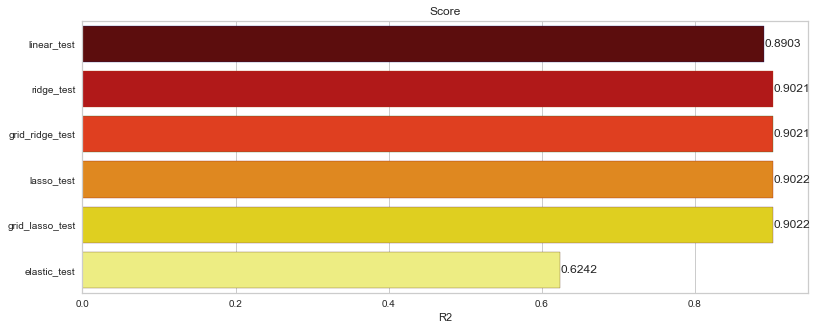

In [152]:
plt.subplots(figsize=(13,5))
ax=sns.barplot(x=df_finals['R2'], y=df_finals.index, palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks()
plt.title('Score')
for p in ax.patches:
        width = p.get_width()                        
        ax.text(width,                               
                p.get_y() + p.get_height() / 2,      
                '{:1.4f}'.format(width),             
                ha = 'left',                         
                va = 'center')


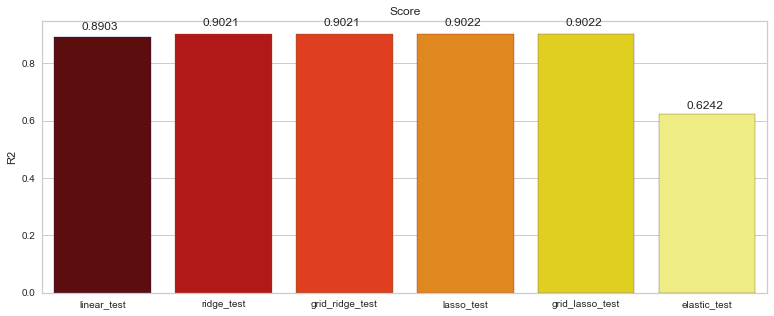

In [153]:
plt.subplots(figsize=(13,5))
ax=sns.barplot(y=df_finals['R2'], x=df_finals.index, palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks()
plt.title('Score')
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() +.23, p.get_height() * 1.03,
                '{:1.4f}'.format(height),
                )


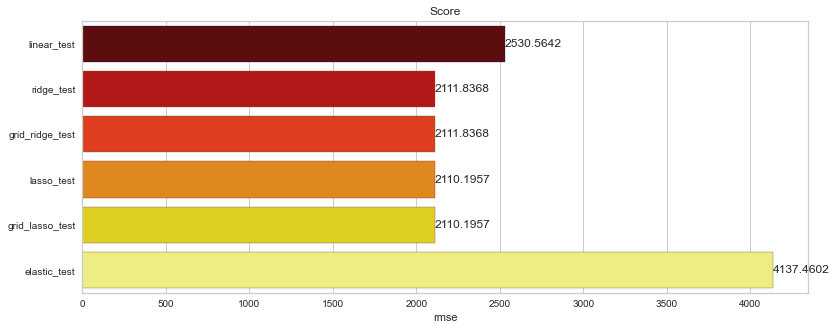

In [154]:
plt.subplots(figsize=(13,5))
ax=sns.barplot(x=df_finals['rmse'], y=df_finals.index, palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks()
plt.title('Score')
for p in ax.patches:
        width = p.get_width()                        
        ax.text(width,                               
                p.get_y() + p.get_height() / 2,      
                '{:1.4f}'.format(width),             
                ha = 'left',                         
                va = 'center')


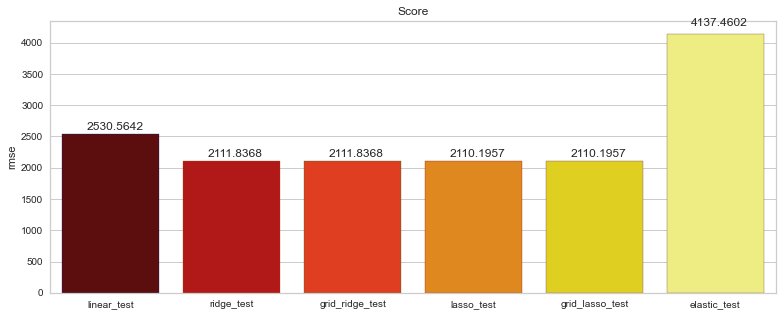

In [155]:
plt.subplots(figsize=(13,5))
ax=sns.barplot(y=df_finals['rmse'], x=df_finals.index, palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks()
plt.title('Score')
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + .2, p.get_height() * 1.03,
                '{:1.4f}'.format(height),
                )


### Finally


In [156]:
final_scaler = MinMaxScaler()
final_scaler.fit(X)


MinMaxScaler()

In [157]:
X_scaled = final_scaler.transform(X)

In [158]:
final_model = Lasso(alpha=1) #grid_lasso


In [159]:
final_model.fit(X_scaled, y)


Lasso(alpha=1)

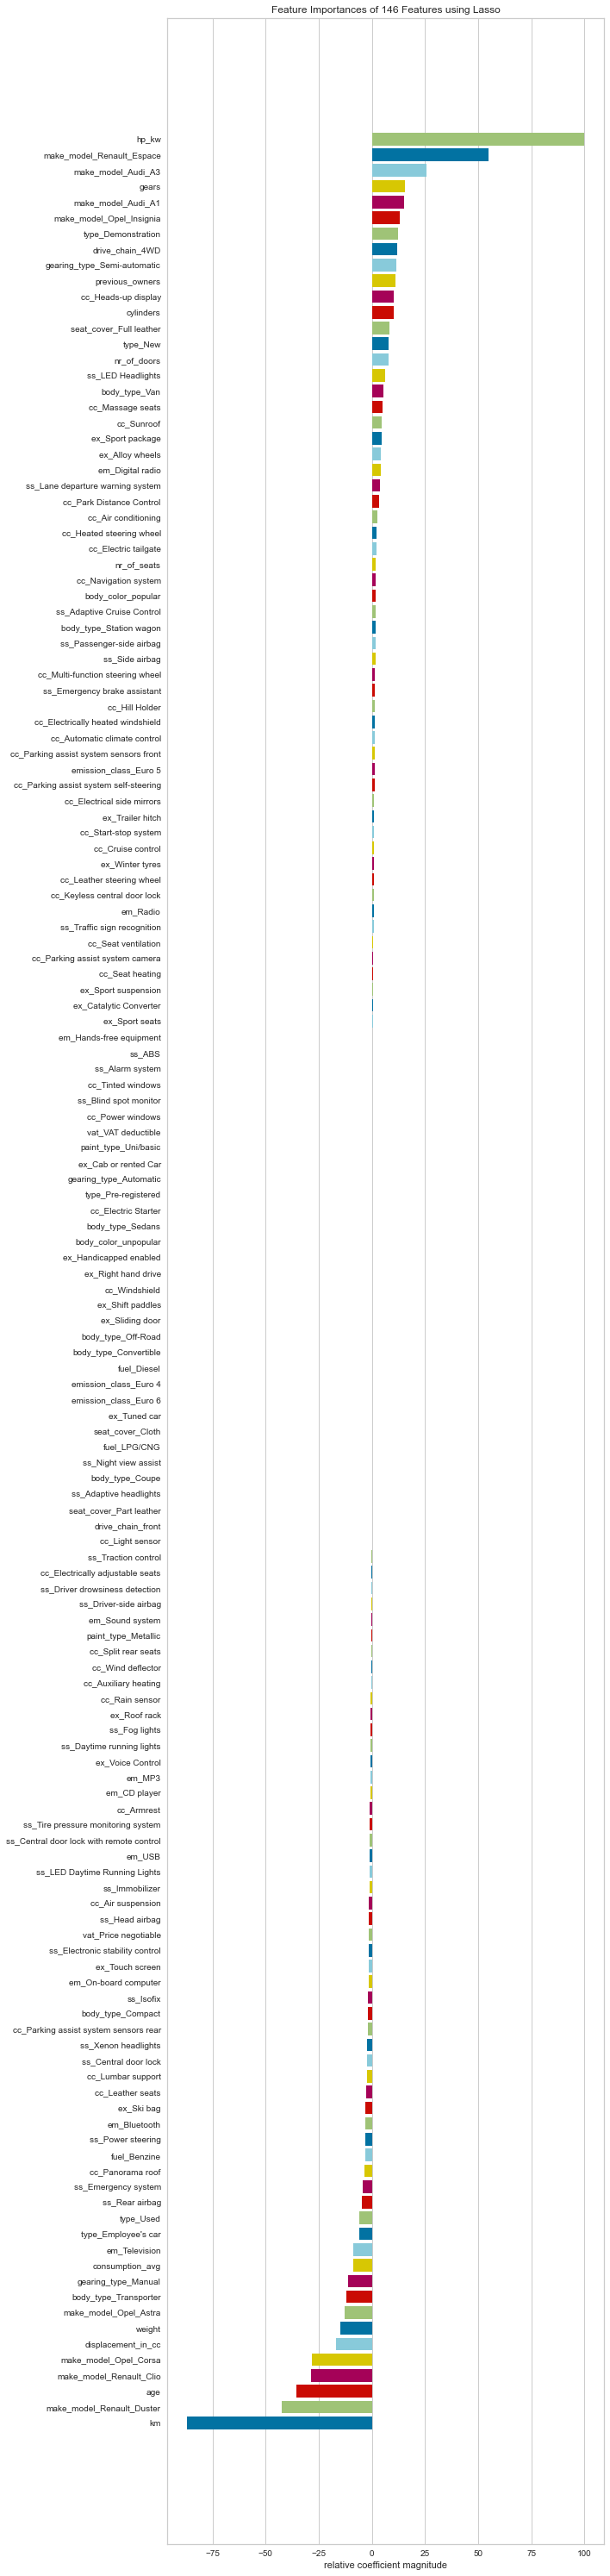

In [160]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

model = Lasso(alpha=1)

viz = FeatureImportances(model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show();


In [161]:
df_new = df3[["make_model", "hp_kw", "km","age", "price", "gearing_type"]]

In [162]:
df_new

make_model   hp_kw        km   age  price gearing_type
0             Audi_A1  66.000 56013.000 4.000  15770    Automatic
1             Audi_A1 141.000 80000.000 3.000  14500    Automatic
2             Audi_A1  85.000 83450.000 4.000  14640    Automatic
3             Audi_A1  66.000 73000.000 4.000  14500    Automatic
4             Audi_A1  66.000 16200.000 4.000  16790    Automatic
...               ...     ...       ...   ...    ...          ...
14408  Renault_Espace 147.000  1581.978 1.000  39950    Automatic
14409  Renault_Espace 165.000  9900.000 1.000  39885    Automatic
14410  Renault_Espace 146.000    15.000 1.000  39875    Automatic
14411  Renault_Espace 147.000    10.000 1.000  39700    Automatic
14412  Renault_Espace 165.000  1581.978 1.000  40999    Automatic

[14413 rows x 6 columns]

In [163]:
df_new.head()

make_model   hp_kw        km   age  price gearing_type
0    Audi_A1  66.000 56013.000 4.000  15770    Automatic
1    Audi_A1 141.000 80000.000 3.000  14500    Automatic
2    Audi_A1  85.000 83450.000 4.000  14640    Automatic
3    Audi_A1  66.000 73000.000 4.000  14500    Automatic
4    Audi_A1  66.000 16200.000 4.000  16790    Automatic

In [164]:
df_new = pd.get_dummies(df_new)
df_new

hp_kw        km   age  price  make_model_Audi_A1  make_model_Audi_A3  \
0      66.000 56013.000 4.000  15770                   1                   0   
1     141.000 80000.000 3.000  14500                   1                   0   
2      85.000 83450.000 4.000  14640                   1                   0   
3      66.000 73000.000 4.000  14500                   1                   0   
4      66.000 16200.000 4.000  16790                   1                   0   
...       ...       ...   ...    ...                 ...                 ...   
14408 147.000  1581.978 1.000  39950                   0                   0   
14409 165.000  9900.000 1.000  39885                   0                   0   
14410 146.000    15.000 1.000  39875                   0                   0   
14411 147.000    10.000 1.000  39700                   0                   0   
14412 165.000  1581.978 1.000  40999                   0                   0   

       make_model_Opel_Astra  make_model_Opel_Corsa  make_model_Opel_Insignia  \
0                          0                      0                         0   
1                          0                      0                         0   
2                          0                      0                         0   
3                          0                      0                         0   
4                          0                      0                         0   
...                      ...                    ...                       ...   
14408                      0                      0                         0   
14409                      0                      0                         0   
14410                      0                      0                         0   
14411                      0                      0                         0   
14412                      0                      0                         0   

       make_model_Renault_Clio  make_model_Renault_Duster  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   
...                        ...                        ...   
14408                        0                          0   
14409                        0                          0   
14410                        0                          0   
14411                        0                          0   
14412                        0                          0   

       make_model_Renault_Espace  gearing_type_Automatic  gearing_type_Manual  \
0                              0                       1                    0   
1                              0                       1                    0   
2                              0                       1                    0   
3                              0                       1                    0   
4                              0                       1                    0   
...                          ...                     ...                  ...   
14408                          1                       1                    0   
14409                          1                       1                    0   
14410                          1                       1                    0   
14411                          1                       1                    0   
14412                          1                       1                    0   

       gearing_type_Semi-automatic  
0                                0  
1                                0  
2                                0  
3                                0  
4                                0  
...                            ...  
14408                            0  
14409                            0  
14410                            0 

In [165]:
len(df_new)

14413

In [166]:
X = df_new.drop(columns = ["price"])
y= df_new.price

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [168]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [169]:
lasso_model = Lasso()
lasso_model.fit(X_train_scaled, y_train)
train_val_2(lasso_model, X_train_scaled, y_train, X_test_scaled, y_test)

train        test
R2         0.872       0.869
mae     1703.627    1708.351
mse  5883086.198 5948533.849
rmse    2425.507    2438.962

### Cross Validate

In [170]:
model = Lasso()
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [171]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                   0.871
test_neg_mean_absolute_error          -1705.859
test_neg_mean_squared_error        -5899299.173
test_neg_root_mean_squared_error      -2426.704
dtype: float64

### Grid Search

In [172]:
lasso_model = Lasso()

param_grid = {'alpha':alpha_space}

lasso_final_model = GridSearchCV(estimator=lasso_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [173]:
lasso_final_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])},
             scoring='neg_root_mean_squared_error')

In [174]:
lasso_final_model.best_params_

{'alpha': 0.08}

In [175]:
lasso_final_model.best_score_

-2426.5604263966115

In [176]:
train_val_2(lasso_final_model, X_train_scaled, y_train, X_test_scaled, y_test)

train        test
R2         0.872       0.869
mae     1704.988    1709.802
mse  5882331.287 5947152.387
rmse    2425.352    2438.678

In [177]:
2438/df_new.price.mean()

0.13819004706573165

In [178]:
y_pred = lasso_final_model.predict(X_test_scaled)
fm_R2 = r2_score(y_test, y_pred)
fm_mae = mean_absolute_error(y_test, y_pred)
fm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

## 7. Visually Compare Models Performance In a Graph

In [179]:
for i, j in enumerate(df_finals):
    print(i, j)

0 R2
1 mae
2 mse
3 rmse


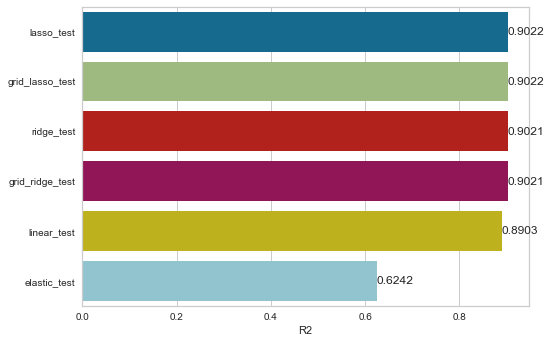

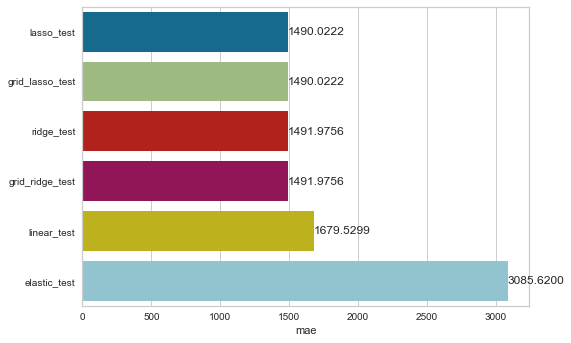

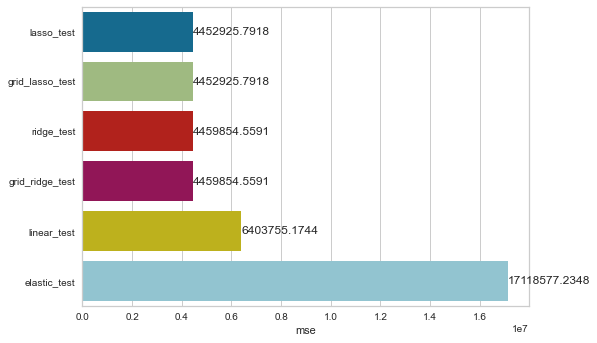

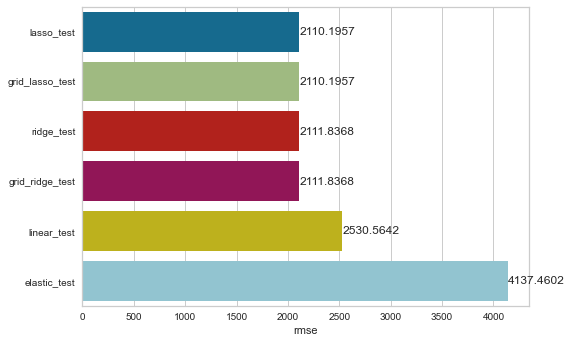

In [180]:
#metrics = scores.columns
for i, j in enumerate(df_finals):
    plt.figure(i)
    if j == "R2":
        ascending = False
    else:
        ascending = True
    compare = df_finals.sort_values(by=j, ascending=ascending)
    ax = sns.barplot(x = compare[j] , y= compare.index)
    ax.bar_label(ax.containers[0], fmt="%.4f");

In [181]:
!pip install matplotlib==3.5.1 --user

In [182]:
final_scaler = MinMaxScaler()
final_scaler.fit(X)
X_scaled = final_scaler.transform(X)

In [183]:
final_model = Lasso(alpha=1)

In [184]:
final_model.fit(X_scaled,y)

Lasso(alpha=1)

In [185]:
my_dict = {
    "hp_kw": 66,
    "age": 3,
    "km": 17000,
    "make_model": 'Audi_A3',
    "gearing_type": "Automatic"
}

In [186]:
my_dict = pd.DataFrame([my_dict])
my_dict

hp_kw  age     km make_model gearing_type
0     66    3  17000    Audi_A3    Automatic

In [187]:
my_dict = pd.get_dummies(my_dict)
my_dict

hp_kw  age     km  make_model_Audi_A3  gearing_type_Automatic
0     66    3  17000                   1                       1

In [188]:
X.head(1)

hp_kw        km   age  make_model_Audi_A1  make_model_Audi_A3  \
0 66.000 56013.000 4.000                   1                   0   

   make_model_Opel_Astra  make_model_Opel_Corsa  make_model_Opel_Insignia  \
0                      0                      0                         0   

   make_model_Renault_Clio  make_model_Renault_Duster  \
0                        0                          0   

   make_model_Renault_Espace  gearing_type_Automatic  gearing_type_Manual  \
0                          0                       1                    0   

   gearing_type_Semi-automatic  
0                            0

In [189]:
my_dict = my_dict.reindex(columns = X.columns, fill_value=0)
my_dict

hp_kw     km  age  make_model_Audi_A1  make_model_Audi_A3  \
0     66  17000    3                   0                   1   

   make_model_Opel_Astra  make_model_Opel_Corsa  make_model_Opel_Insignia  \
0                      0                      0                         0   

   make_model_Renault_Clio  make_model_Renault_Duster  \
0                        0                          0   

   make_model_Renault_Espace  gearing_type_Automatic  gearing_type_Manual  \
0                          0                       1                    0   

   gearing_type_Semi-automatic  
0                            0

In [190]:
my_dict = final_scaler.transform(my_dict)
my_dict

array([[0.13065327, 0.05362776, 0.66666667, 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ]])

In [191]:
final_model.predict(my_dict)

array([19324.74298466])

In [192]:
df.age.value_counts()

2.000    4365
1.000    4072
4.000    3403
3.000    2975
Name: age, dtype: int64

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___